# Real Estate Investment Prospects For Charlotte, North Carolina And Surrounding Areas: a Time Series
Project: Module 4 Final
<br>
Instructor: Yish Lim
<br>
Date: 02-2021

## Client Case:
A real estate investment and asset management firm specializing in Single-Family and Build-To-Rent residences is interested in gauging the potential opportunity for BTR assets in or on the outskirts of Charlotte, North Carolina. As of February 2021, Charlotte is one of the most sought out destinations for real estate in the United States. However, there is a significant shortage of supply for homes in Charlotte (and around the country). 

The client has requested an analysis and forecast with regard to the best zip code(s) to invest in, within (<b>or on the outskirts of) </b>Charlotte, North Carolina, with the interest in establishing a portfolio of 10-20 homes.

Although data related to potential rental income is vital to assessing the viability of this strategy, among other aspects, the Client is firstly interested in protecting initial investments by understanding the forecasts for invidiual zip codes over the next 5 years, as the Charlotte real estate market has been steadily rising and could be a bubble on the verge of bursting just as much as it could present a solid opportunity for investors.

In [1]:
import warnings
import itertools
import statsmodels.api as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
import seaborn as sns
import folium
sns.set()

In [2]:
#! pip install pgeocode
import pgeocode

In [4]:
# Importing the dataframe
df = pd.read_csv('zillow_data.csv')
df.head

<bound method NDFrame.head of        RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-0

In [6]:
len(df.CountyName.sort_values().unique())

1212

In [7]:
df.loc[df.CountyName == 'Cabarrus']

RegionID  RegionName            City State      Metro CountyName  \
111      69672       28027         Concord    NC  Charlotte   Cabarrus   
606      69670       28025         Concord    NC  Charlotte   Cabarrus   
3909     69702       28081      Kannapolis    NC  Charlotte   Cabarrus   
4372     69704       28083      Kannapolis    NC  Charlotte   Cabarrus   
6093     69696       28075      Harrisburg    NC  Charlotte   Cabarrus   
9277     69720       28107         Midland    NC  Charlotte   Cabarrus   
9791     69732       28124  Mount Pleasant    NC  Charlotte   Cabarrus   

      SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
111        112  126600.0  127300.0  127700.0  ...   204000   205600   207300   
606        607   96500.0   97200.0   97600.0  ...   156800   157500   158200   
3909      3910   61900.0   62300.0   62600.0  ...   117500   119600   121400   
4372      4373   62100.0   62500.0   62800.0  ...   111200   112400   113500   
6093      6094  165300.0  166000.0  166400.0  ...   262600   263200   264000   
9277      9278   95600.0   95500.0   95400.0  ...   183700   182400   181700   
9791      9792   71600.0   71700.0   71700.0  ...   142100   142000   141400   

      2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
111    209000   210400   212000   213700   215200   216700   218000  
606    159000   159900   160800   161800   162400   162900   163300  
3909   123200   124700   125600   125700   125800   126700   127500  
4372   115000   117000   118600   119500   119800   120100   120700  
6093   264600   265600   266800   268000   269100   269700   269700  
9277   182300   183500   184700   186700   188700   189900   190200  
9791   141100   140900   140900   141100   143300   147900   152300  

[7 rows x 272 columns]

In [8]:
nc_homes_meck = df.loc[df.CountyName == 'Mecklenburg']

In [9]:
nc_homes_meck

RegionID  RegionName          City State      Metro   CountyName  \
24       69816       28269     Charlotte    NC  Charlotte  Mecklenburg   
55       69823       28277     Charlotte    NC  Charlotte  Mecklenburg   
217      69699       28078  Huntersville    NC  Charlotte  Mecklenburg   
392      69779       28216     Charlotte    NC  Charlotte  Mecklenburg   
409      69768       28205     Charlotte    NC  Charlotte  Mecklenburg   
442      69778       28215     Charlotte    NC  Charlotte  Mecklenburg   
467      69773       28210     Charlotte    NC  Charlotte  Mecklenburg   
472      69789       28227     Mint Hill    NC  Charlotte  Mecklenburg   
918      69813       28262     Charlotte    NC  Charlotte  Mecklenburg   
1288     69788       28226     Charlotte    NC  Charlotte  Mecklenburg   
1352     69776       28213     Charlotte    NC  Charlotte  Mecklenburg   
1400     69718       28105      Matthews    NC  Charlotte  Mecklenburg   
1502     69775       28212     Charlotte    NC  Charlotte  Mecklenburg   
1814     69820       28273     Charlotte    NC  Charlotte  Mecklenburg   
1821     69771       28208     Charlotte    NC  Charlotte  Mecklenburg   
2067     69777       28214     Charlotte    NC  Charlotte  Mecklenburg   
2455     69673       28031     Cornelius    NC  Charlotte  Mecklenburg   
2635     69774       28211     Charlotte    NC  Charlotte  Mecklenburg   
2666     69817       28270     Charlotte    NC  Charlotte  Mecklenburg   
3506     69824       28278     Charlotte    NC  Charlotte  Mecklenburg   
3538     69772       28209     Charlotte    NC  Charlotte  Mecklenburg   
3791     69780       28217     Charlotte    NC  Charlotte  Mecklenburg   
4259     69766       28203     Charlotte    NC  Charlotte  Mecklenburg   
4871     69765       28202     Charlotte    NC  Charlotte  Mecklenburg   
5720     69678       28036      Davidson    NC  Charlotte  Mecklenburg   
7526     69740       28134     Pineville    NC  Charlotte  Mecklenburg   
7905     69767       28204     Charlotte    NC  Charlotte  Mecklenburg   
8528     69770       28207     Charlotte    NC  Charlotte  Mecklenburg   

      SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
24          25  126100.0  126600.0  127100.0  ...   184700   186600   188200   
55          56  183900.0  185100.0  186300.0  ...   348100   349500   350500   
217        218  166200.0  166800.0  167200.0  ...   284900   286500   287900   
392        393   96900.0   97100.0   97200.0  ...   144200   145500   146900   
409        410   73700.0   74200.0   74800.0  ...   222800   227100   231600   
442        443   99100.0   99800.0  100500.0  ...   151200   153400   155500   
467        468  135000.0  135200.0  135400.0  ...   345000   348400   351700   
472        473  101700.0  102100.0  102600.0  ...   172200   173900   175100   
918        919  125200.0  125700.0  126300.0  ...   175600   177600   180000   
1288      1289  167500.0  168300.0  169000.0  ...   364100   366700   369700   
1352      1353  108600.0  109000.0  109400.0  ...   156700   158300   159900   
1400      1401  137800.0  138600.0  139500.0  ...   245400   247400   248800   
1502      1503   88700.0   89100.0   89600.0  ...   149400   151100   152500   
1814      1815  115000.0  115300.0  115700.0  ...   185000   186800   188500   
1821      1822   59000.0   59300.0   59500.0  ...    92000    94500    96200   
2067      2068  101800.0  102300.0  102900.0  ...   150500   152000   153600   
2455      2456  172700.0  173700.0  174600.0  ...   298100   299800   301200   
2635      2636  179000.0  179600.0  180200.0  ...   456400   456400   457100   
2666      2667  185700.0  186300.0  186800.0  ...   358600   361000   363400   
3506      3507  158200.0  158600.0  158800.0  ...   252000   253200   254600   
3538      3539  122600.0  123200.0  123700.0  ...   391900   395100   397200   
3791      3792   71200.0   71700.0   72200.0  ...   111500   113900   116400   
4259      4260  162

In [10]:
# Filtering for the zip codes that correspond to city names that are not Charlotte but are in Mecklenburg County.
outskirts_ch = nc_homes_meck.loc[nc_homes_meck.City != 'Charlotte']

In [11]:
outskirts_ch

RegionID  RegionName          City State      Metro   CountyName  \
217      69699       28078  Huntersville    NC  Charlotte  Mecklenburg   
472      69789       28227     Mint Hill    NC  Charlotte  Mecklenburg   
1400     69718       28105      Matthews    NC  Charlotte  Mecklenburg   
2455     69673       28031     Cornelius    NC  Charlotte  Mecklenburg   
5720     69678       28036      Davidson    NC  Charlotte  Mecklenburg   
7526     69740       28134     Pineville    NC  Charlotte  Mecklenburg   

      SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
217        218  166200.0  166800.0  167200.0  ...   284900   286500   287900   
472        473  101700.0  102100.0  102600.0  ...   172200   173900   175100   
1400      1401  137800.0  138600.0  139500.0  ...   245400   247400   248800   
2455      2456  172700.0  173700.0  174600.0  ...   298100   299800   301200   
5720      5721  179200.0  180700.0  182000.0  ...   396300   395800   394400   
7526      7527  109600.0  109800.0  110000.0  ...   190300   192200   194200   

      2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
217    289400   291600   293800   295500   297000   299000   300500  
472    176600   178900   181300   183400   185800   189200   192100  
1400   249900   251500   253600   255700   258200   261200   263100  
2455   302600   305000   307600   309500   311000   312400   313400  
5720   392700   391400   390600   390700   393400   397900   400700  
7526   196100   198200   200500   202800   205100   207200   208700  

[6 rows x 272 columns]

In [12]:
outskirts_series = outskirts_ch.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis=1)

In [13]:
outskirts_series

RegionName   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
217        28078  166200.0  166800.0  167200.0  167700.0  168100.0  168500.0   
472        28227  101700.0  102100.0  102600.0  103000.0  103400.0  103800.0   
1400       28105  137800.0  138600.0  139500.0  140300.0  141100.0  141800.0   
2455       28031  172700.0  173700.0  174600.0  175300.0  175900.0  176500.0   
5720       28036  179200.0  180700.0  182000.0  183100.0  184000.0  184900.0   
7526       28134  109600.0  109800.0  110000.0  110200.0  110400.0  110600.0   

       1996-10   1996-11   1996-12  ...  2017-07  2017-08  2017-09  2017-10  \
217   168900.0  169500.0  170300.0  ...   284900   286500   287900   289400   
472   104200.0  104700.0  105200.0  ...   172200   173900   175100   176600   
1400  142600.0  143400.0  144200.0  ...   245400   247400   248800   249900   
2455  177000.0  177700.0  178500.0  ...   298100   299800   301200   302600   
5720  185700.0  186600.0  187900.0  ...   396300   395800   394400   392700   
7526  110800.0  111000.0  111300.0  ...   190300   192200   194200   196100   

      2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
217    291600   293800   295500   297000   299000   300500  
472    178900   181300   183400   185800   189200   192100  
1400   251500   253600   255700   258200   261200   263100  
2455   305000   307600   309500   311000   312400   313400  
5720   391400   390600   390700   393400   397900   400700  
7526   198200   200500   202800   205100   207200   208700  

[6 rows x 266 columns]

In [14]:
outskirts_regions = outskirts_series.RegionName

In [15]:
outskirts_years = outskirts_series.drop('RegionName', axis=1)

In [16]:
outskirts_regions

217     28078
472     28227
1400    28105
2455    28031
5720    28036
7526    28134
Name: RegionName, dtype: int64

In [17]:
zips = [i for i in outskirts_regions]

In [18]:
zips

[28078, 28227, 28105, 28031, 28036, 28134]

In [19]:
outskirts_years

1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10  \
217   166200.0  166800.0  167200.0  167700.0  168100.0  168500.0  168900.0   
472   101700.0  102100.0  102600.0  103000.0  103400.0  103800.0  104200.0   
1400  137800.0  138600.0  139500.0  140300.0  141100.0  141800.0  142600.0   
2455  172700.0  173700.0  174600.0  175300.0  175900.0  176500.0  177000.0   
5720  179200.0  180700.0  182000.0  183100.0  184000.0  184900.0  185700.0   
7526  109600.0  109800.0  110000.0  110200.0  110400.0  110600.0  110800.0   

       1996-11   1996-12   1997-01  ...  2017-07  2017-08  2017-09  2017-10  \
217   169500.0  170300.0  171300.0  ...   284900   286500   287900   289400   
472   104700.0  105200.0  105800.0  ...   172200   173900   175100   176600   
1400  143400.0  144200.0  145000.0  ...   245400   247400   248800   249900   
2455  177700.0  178500.0  179500.0  ...   298100   299800   301200   302600   
5720  186600.0  187900.0  189500.0  ...   396300   395800   394400   392700   
7526  111000.0  111300.0  111700.0  ...   190300   192200   194200   196100   

      2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
217    291600   293800   295500   297000   299000   300500  
472    178900   181300   183400   185800   189200   192100  
1400   251500   253600   255700   258200   261200   263100  
2455   305000   307600   309500   311000   312400   313400  
5720   391400   390600   390700   393400   397900   400700  
7526   198200   200500   202800   205100   207200   208700  

[6 rows x 265 columns]

In [20]:
# Transposing the series
outskirts_years = outskirts_years.transpose()

In [21]:
outskirts_years

217       472       1400      2455      5720      7526
1996-04  166200.0  101700.0  137800.0  172700.0  179200.0  109600.0
1996-05  166800.0  102100.0  138600.0  173700.0  180700.0  109800.0
1996-06  167200.0  102600.0  139500.0  174600.0  182000.0  110000.0
1996-07  167700.0  103000.0  140300.0  175300.0  183100.0  110200.0
1996-08  168100.0  103400.0  141100.0  175900.0  184000.0  110400.0
...           ...       ...       ...       ...       ...       ...
2017-12  293800.0  181300.0  253600.0  307600.0  390600.0  200500.0
2018-01  295500.0  183400.0  255700.0  309500.0  390700.0  202800.0
2018-02  297000.0  185800.0  258200.0  311000.0  393400.0  205100.0
2018-03  299000.0  189200.0  261200.0  312400.0  397900.0  207200.0
2018-04  300500.0  192100.0  263100.0  313400.0  400700.0  208700.0

[265 rows x 6 columns]

In [22]:
outskirts_years = outskirts_years.rename(columns={217: zips[0], 472: zips[1],
                                                  1400: zips[2], 2455: zips[3],
                                                 5720: zips[4], 7526: zips[5]})

In [23]:
outskirts_years

28078     28227     28105     28031     28036     28134
1996-04  166200.0  101700.0  137800.0  172700.0  179200.0  109600.0
1996-05  166800.0  102100.0  138600.0  173700.0  180700.0  109800.0
1996-06  167200.0  102600.0  139500.0  174600.0  182000.0  110000.0
1996-07  167700.0  103000.0  140300.0  175300.0  183100.0  110200.0
1996-08  168100.0  103400.0  141100.0  175900.0  184000.0  110400.0
...           ...       ...       ...       ...       ...       ...
2017-12  293800.0  181300.0  253600.0  307600.0  390600.0  200500.0
2018-01  295500.0  183400.0  255700.0  309500.0  390700.0  202800.0
2018-02  297000.0  185800.0  258200.0  311000.0  393400.0  205100.0
2018-03  299000.0  189200.0  261200.0  312400.0  397900.0  207200.0
2018-04  300500.0  192100.0  263100.0  313400.0  400700.0  208700.0

[265 rows x 6 columns]

In [24]:
ch_edge_series = outskirts_years

In [25]:
# Changing series index to datetime to make this more workable for my needs
ch_edge_series.index = pd.to_datetime(ch_edge_series.index)

In [26]:
ch_edge_series

28078     28227     28105     28031     28036     28134
1996-04-01  166200.0  101700.0  137800.0  172700.0  179200.0  109600.0
1996-05-01  166800.0  102100.0  138600.0  173700.0  180700.0  109800.0
1996-06-01  167200.0  102600.0  139500.0  174600.0  182000.0  110000.0
1996-07-01  167700.0  103000.0  140300.0  175300.0  183100.0  110200.0
1996-08-01  168100.0  103400.0  141100.0  175900.0  184000.0  110400.0
...              ...       ...       ...       ...       ...       ...
2017-12-01  293800.0  181300.0  253600.0  307600.0  390600.0  200500.0
2018-01-01  295500.0  183400.0  255700.0  309500.0  390700.0  202800.0
2018-02-01  297000.0  185800.0  258200.0  311000.0  393400.0  205100.0
2018-03-01  299000.0  189200.0  261200.0  312400.0  397900.0  207200.0
2018-04-01  300500.0  192100.0  263100.0  313400.0  400700.0  208700.0

[265 rows x 6 columns]

<AxesSubplot:>

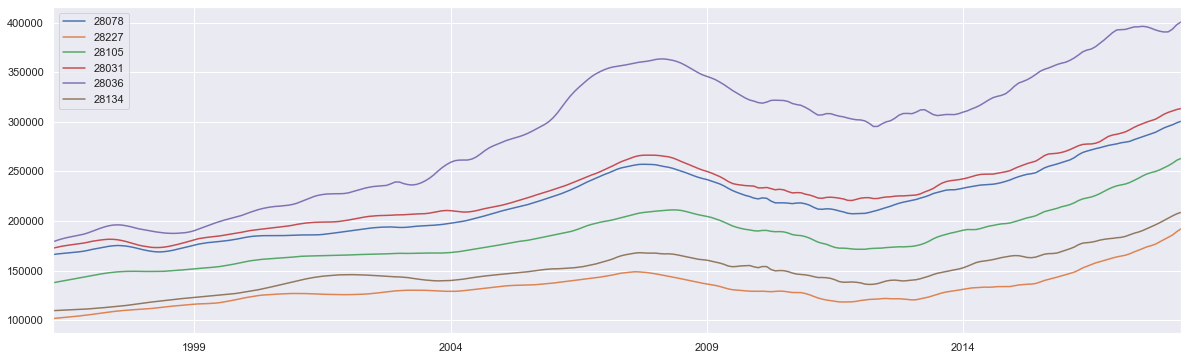

In [27]:
ch_edge_series.plot(figsize=(18,6), legend=True)

In [28]:
ch_edge_series.describe()

28078          28227          28105          28031  \
count     265.000000     265.000000     265.000000     265.000000   
mean   217885.283019  131804.905660  183282.641509  226931.698113   
std     33712.801757   16240.468489   26811.591522   34585.382583   
min    166200.000000  101700.000000  137800.000000  172700.000000   
25%    188000.000000  121700.000000  165200.000000  199200.000000   
50%    216500.000000  129300.000000  178000.000000  225000.000000   
75%    241800.000000  138000.000000  199600.000000  249700.000000   
max    300500.000000  192100.000000  263100.000000  313400.000000   

               28036          28134  
count     265.000000     265.000000  
mean   288527.924528  148240.000000  
std     65138.178111   20306.383904  
min    179200.000000  109600.000000  
25%    227500.000000  138600.000000  
50%    306300.000000  145800.000000  
75%    342500.000000  160900.000000  
max    400700.000000  208700.000000

In [29]:
# Checking to make sure there are no NaN's
ch_edge_series.isnull().sum()

28078    0
28227    0
28105    0
28031    0
28036    0
28134    0
dtype: int64

In [30]:
ch_edge_series_2006 = ch_edge_series['2006':]

In [31]:
ch_edge_series_2006

28078     28227     28105     28031     28036     28134
2006-01-01  224800.0  137400.0  185800.0  231600.0  304100.0  151800.0
2006-02-01  226200.0  138000.0  186600.0  233000.0  309000.0  151800.0
2006-03-01  227700.0  138500.0  187500.0  234400.0  314700.0  152000.0
2006-04-01  229400.0  139000.0  188400.0  235900.0  320500.0  152300.0
2006-05-01  231200.0  139600.0  189300.0  237600.0  325900.0  152600.0
...              ...       ...       ...       ...       ...       ...
2017-12-01  293800.0  181300.0  253600.0  307600.0  390600.0  200500.0
2018-01-01  295500.0  183400.0  255700.0  309500.0  390700.0  202800.0
2018-02-01  297000.0  185800.0  258200.0  311000.0  393400.0  205100.0
2018-03-01  299000.0  189200.0  261200.0  312400.0  397900.0  207200.0
2018-04-01  300500.0  192100.0  263100.0  313400.0  400700.0  208700.0

[148 rows x 6 columns]

<AxesSubplot:>

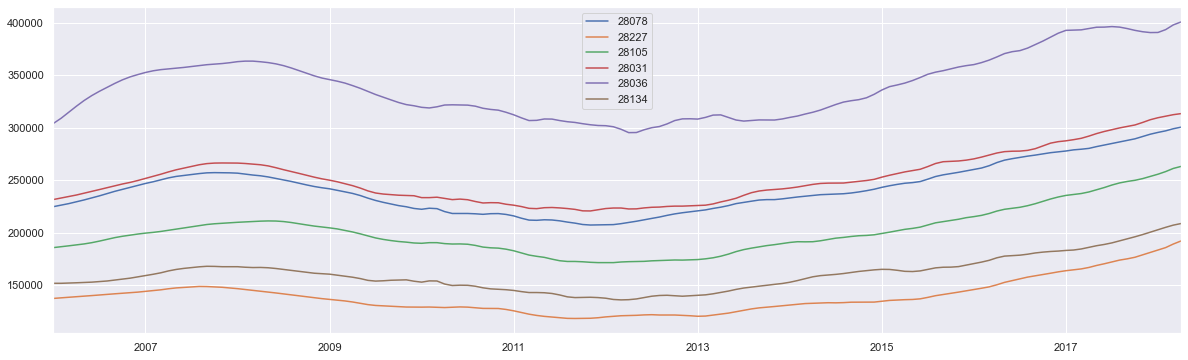

In [32]:
ch_edge_series_2006.plot(figsize=(18,6))

In [33]:
top20_meck = nc_homes_meck.loc[nc_homes_meck.SizeRank < 3508]

In [34]:
top20_meck

RegionID  RegionName          City State      Metro   CountyName  \
24       69816       28269     Charlotte    NC  Charlotte  Mecklenburg   
55       69823       28277     Charlotte    NC  Charlotte  Mecklenburg   
217      69699       28078  Huntersville    NC  Charlotte  Mecklenburg   
392      69779       28216     Charlotte    NC  Charlotte  Mecklenburg   
409      69768       28205     Charlotte    NC  Charlotte  Mecklenburg   
442      69778       28215     Charlotte    NC  Charlotte  Mecklenburg   
467      69773       28210     Charlotte    NC  Charlotte  Mecklenburg   
472      69789       28227     Mint Hill    NC  Charlotte  Mecklenburg   
918      69813       28262     Charlotte    NC  Charlotte  Mecklenburg   
1288     69788       28226     Charlotte    NC  Charlotte  Mecklenburg   
1352     69776       28213     Charlotte    NC  Charlotte  Mecklenburg   
1400     69718       28105      Matthews    NC  Charlotte  Mecklenburg   
1502     69775       28212     Charlotte    NC  Charlotte  Mecklenburg   
1814     69820       28273     Charlotte    NC  Charlotte  Mecklenburg   
1821     69771       28208     Charlotte    NC  Charlotte  Mecklenburg   
2067     69777       28214     Charlotte    NC  Charlotte  Mecklenburg   
2455     69673       28031     Cornelius    NC  Charlotte  Mecklenburg   
2635     69774       28211     Charlotte    NC  Charlotte  Mecklenburg   
2666     69817       28270     Charlotte    NC  Charlotte  Mecklenburg   
3506     69824       28278     Charlotte    NC  Charlotte  Mecklenburg   

      SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
24          25  126100.0  126600.0  127100.0  ...   184700   186600   188200   
55          56  183900.0  185100.0  186300.0  ...   348100   349500   350500   
217        218  166200.0  166800.0  167200.0  ...   284900   286500   287900   
392        393   96900.0   97100.0   97200.0  ...   144200   145500   146900   
409        410   73700.0   74200.0   74800.0  ...   222800   227100   231600   
442        443   99100.0   99800.0  100500.0  ...   151200   153400   155500   
467        468  135000.0  135200.0  135400.0  ...   345000   348400   351700   
472        473  101700.0  102100.0  102600.0  ...   172200   173900   175100   
918        919  125200.0  125700.0  126300.0  ...   175600   177600   180000   
1288      1289  167500.0  168300.0  169000.0  ...   364100   366700   369700   
1352      1353  108600.0  109000.0  109400.0  ...   156700   158300   159900   
1400      1401  137800.0  138600.0  139500.0  ...   245400   247400   248800   
1502      1503   88700.0   89100.0   89600.0  ...   149400   151100   152500   
1814      1815  115000.0  115300.0  115700.0  ...   185000   186800   188500   
1821      1822   59000.0   59300.0   59500.0  ...    92000    94500    96200   
2067      2068  101800.0  102300.0  102900.0  ...   150500   152000   153600   
2455      2456  172700.0  173700.0  174600.0  ...   298100   299800   301200   
2635      2636  179000.0  179600.0  180200.0  ...   456400   456400   457100   
2666      2667  185700.0  186300.0  186800.0  ...   358600   361000   363400   
3506      3507  158200.0  158600.0  158800.0  ...   252000   253200   254600   

      2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
24     189800   191700   193500   195100   196600   198500   199700  
55     352500   355400   357900   359900   361900   363800   364800  
217    289400   291600   293800   295500   297000   299000   300500  
392    148700   150600   152300   153700   155300   157400   159000  
409    236500   241800   247100   251500   256300   262000   265900  
442    157400   159600   162000   163800   165700   168100   169900  
467    353100   354600   356200   357400   359100   362200   363800  
472    176600   178900   181300   183400   185800   189200   192100  
918    182000   184000   185900   187200   188800   190900   192300  
1288   372700   375500   378700   382300   386800   390100   390800  


In [35]:
top20_meck['hROI'] = (top20_meck['2018-04']/top20_meck['1996-04'])-1

In [36]:
top20_meck.hROI.sort_values()

918     0.535942
24      0.583664
1352    0.604972
2067    0.631631
392     0.640867
3506    0.687105
442     0.714430
1814    0.730435
217     0.808063
2455    0.814708
472     0.888889
1502    0.898534
1400    0.909289
1821    0.922034
55      0.983687
2666    1.042003
1288    1.333134
467     1.694815
2635    1.733520
409     2.607870
Name: hROI, dtype: float64

In [37]:
top20_meck

RegionID  RegionName          City State      Metro   CountyName  \
24       69816       28269     Charlotte    NC  Charlotte  Mecklenburg   
55       69823       28277     Charlotte    NC  Charlotte  Mecklenburg   
217      69699       28078  Huntersville    NC  Charlotte  Mecklenburg   
392      69779       28216     Charlotte    NC  Charlotte  Mecklenburg   
409      69768       28205     Charlotte    NC  Charlotte  Mecklenburg   
442      69778       28215     Charlotte    NC  Charlotte  Mecklenburg   
467      69773       28210     Charlotte    NC  Charlotte  Mecklenburg   
472      69789       28227     Mint Hill    NC  Charlotte  Mecklenburg   
918      69813       28262     Charlotte    NC  Charlotte  Mecklenburg   
1288     69788       28226     Charlotte    NC  Charlotte  Mecklenburg   
1352     69776       28213     Charlotte    NC  Charlotte  Mecklenburg   
1400     69718       28105      Matthews    NC  Charlotte  Mecklenburg   
1502     69775       28212     Charlotte    NC  Charlotte  Mecklenburg   
1814     69820       28273     Charlotte    NC  Charlotte  Mecklenburg   
1821     69771       28208     Charlotte    NC  Charlotte  Mecklenburg   
2067     69777       28214     Charlotte    NC  Charlotte  Mecklenburg   
2455     69673       28031     Cornelius    NC  Charlotte  Mecklenburg   
2635     69774       28211     Charlotte    NC  Charlotte  Mecklenburg   
2666     69817       28270     Charlotte    NC  Charlotte  Mecklenburg   
3506     69824       28278     Charlotte    NC  Charlotte  Mecklenburg   

      SizeRank   1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  \
24          25  126100.0  126600.0  127100.0  ...   186600   188200   189800   
55          56  183900.0  185100.0  186300.0  ...   349500   350500   352500   
217        218  166200.0  166800.0  167200.0  ...   286500   287900   289400   
392        393   96900.0   97100.0   97200.0  ...   145500   146900   148700   
409        410   73700.0   74200.0   74800.0  ...   227100   231600   236500   
442        443   99100.0   99800.0  100500.0  ...   153400   155500   157400   
467        468  135000.0  135200.0  135400.0  ...   348400   351700   353100   
472        473  101700.0  102100.0  102600.0  ...   173900   175100   176600   
918        919  125200.0  125700.0  126300.0  ...   177600   180000   182000   
1288      1289  167500.0  168300.0  169000.0  ...   366700   369700   372700   
1352      1353  108600.0  109000.0  109400.0  ...   158300   159900   162000   
1400      1401  137800.0  138600.0  139500.0  ...   247400   248800   249900   
1502      1503   88700.0   89100.0   89600.0  ...   151100   152500   154400   
1814      1815  115000.0  115300.0  115700.0  ...   186800   188500   189900   
1821      1822   59000.0   59300.0   59500.0  ...    94500    96200    97500   
2067      2068  101800.0  102300.0  102900.0  ...   152000   153600   155200   
2455      2456  172700.0  173700.0  174600.0  ...   299800   301200   302600   
2635      2636  179000.0  179600.0  180200.0  ...   456400   457100   459200   
2666      2667  185700.0  186300.0  186800.0  ...   361000   363400   365400   
3506      3507  158200.0  158600.0  158800.0  ...   253200   254600   256100   

      2017-11  2017-12  2018-01  2018-02  2018-03  2018-04      hROI  
24     191700   193500   195100   196600   198500   199700  0.583664  
55     355400   357900   359900   361900   363800   364800  0.983687  
217    291600   293800   295500   297000   299000   300500  0.808063  
392    150600   152300   153700   155300   157400   159000  0.640867  
409    241800   247100   251500   256300   262000   265900  2.607870  
442    159600   162000   163800   165700   168100   169900  0.714430  
467    354600   356200   357400   359100   362200   363800  1.694815  
472    178900   181300   183400   185800   189200   192100  0.888889  
918    184000   185900   187200   188800   190900   192300  0.535942  
1288   375500   378700   382300   386800   390100   390800  

In [38]:
top20_meck2 = top20_meck.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis=1)

In [39]:
top20_meck2

RegionName   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09  \
24         28269  126100.0  126600.0  127100.0  127600.0  128000.0  128300.0   
55         28277  183900.0  185100.0  186300.0  187300.0  188300.0  189200.0   
217        28078  166200.0  166800.0  167200.0  167700.0  168100.0  168500.0   
392        28216   96900.0   97100.0   97200.0   97400.0   97600.0   97900.0   
409        28205   73700.0   74200.0   74800.0   75400.0   76000.0   76500.0   
442        28215   99100.0   99800.0  100500.0  101200.0  101900.0  102500.0   
467        28210  135000.0  135200.0  135400.0  135600.0  135700.0  135800.0   
472        28227  101700.0  102100.0  102600.0  103000.0  103400.0  103800.0   
918        28262  125200.0  125700.0  126300.0  126800.0  127300.0  127800.0   
1288       28226  167500.0  168300.0  169000.0  169700.0  170500.0  171100.0   
1352       28213  108600.0  109000.0  109400.0  109800.0  110200.0  110800.0   
1400       28105  137800.0  138600.0  139500.0  140300.0  141100.0  141800.0   
1502       28212   88700.0   89100.0   89600.0   90000.0   90300.0   90700.0   
1814       28273  115000.0  115300.0  115700.0  116000.0  116400.0  116700.0   
1821       28208   59000.0   59300.0   59500.0   59800.0   60000.0   60300.0   
2067       28214  101800.0  102300.0  102900.0  103400.0  103800.0  104100.0   
2455       28031  172700.0  173700.0  174600.0  175300.0  175900.0  176500.0   
2635       28211  179000.0  179600.0  180200.0  181000.0  181900.0  182700.0   
2666       28270  185700.0  186300.0  186800.0  187300.0  187600.0  187800.0   
3506       28278  158200.0  158600.0  158800.0  158900.0  158900.0  158800.0   

       1996-10   1996-11   1996-12  ...  2017-08  2017-09  2017-10  2017-11  \
24    128700.0  129000.0  129500.0  ...   186600   188200   189800   191700   
55    190100.0  191000.0  192000.0  ...   349500   350500   352500   355400   
217   168900.0  169500.0  170300.0  ...   286500   287900   289400   291600   
392    98300.0   98600.0   99100.0  ...   145500   146900   148700   150600   
409    77000.0   77500.0   78000.0  ...   227100   231600   236500   241800   
442   103100.0  103600.0  104100.0  ...   153400   155500   157400   159600   
467   136000.0  136400.0  137000.0  ...   348400   351700   353100   354600   
472   104200.0  104700.0  105200.0  ...   173900   175100   176600   178900   
918   128200.0  128500.0  128900.0  ...   177600   180000   182000   184000   
1288  171700.0  172300.0  172900.0  ...   366700   369700   372700   375500   
1352  111400.0  112000.0  112700.0  ...   158300   159900   162000   164300   
1400  142600.0  143400.0  144200.0  ...   247400   248800   249900   251500   
1502   91100.0   91400.0   91700.0  ...   151100   152500   154400   156500   
1814  117000.0  117400.0  117800.0  ...   186800   188500   189900   191600   
1821   60500.0   60700.0   60900.0  ...    94500    96200    97500    99800   
2067  104400.0  104600.0  104900.0  ...   152000   153600   155200   157300   
2455  177000.0  177700.0  178500.0  ...   299800   301200   302600   305000   
2635  183800.0  185000.0  186400.0  ...   456400   457100   459200   462500   
2666  188000.0  188200.0  188500.0  ...   361000   363400   365400   367600   
3506  158600.0  158500.0  158500.0  ...   253200   254600   256100   258100   

      2017-12  2018-01  2018-02  2018-03  2018-04      hROI  
24     193500   195100   196600   198500   199700  0.583664  
55     357900   359900   361900   363800   364800  0.983687  
217    293800   295500   297000   299000   300500  0.808063  
392    152300   153700   155300   157400   159000  0.640867  
409    247100   251500   256300   262000   265900  2.607870  
442    162000   163800   165700   168100   169900  0.714430  
467    356200   357400   359100   362200   363800  1.694815  
472    181300   183400   185800   189200   192100  0.888889  
918    185900   187200   188800   190900   192300  0.535942  
1288   378700   382300   386800   390100   39

Update:
--
It seems that I missed some important entries for neighboring Charlotte area, namely both Gaston county and Cabarrus county. Due to the needs of the analysis, I'll include them in the Series.

---

In [40]:
# Beginning from "scratch" with the original dataset
# df

In [41]:
dfnc = df.loc[df.State == 'NC']

In [42]:
# Pulling the three counties of focus from the dataset 
gas = dfnc.loc[dfnc.CountyName == 'Gaston']
meck = dfnc.loc[dfnc.CountyName == 'Mecklenburg']
cab = dfnc.loc[dfnc.CountyName == 'Cabarrus']

In [43]:
# Combining these three into one dataset
gas_meck_cab = pd.concat([gas,meck,cab], join='outer')
gas_meck_cab

RegionID  RegionName            City State      Metro   CountyName  \
1573      69688       28054        Gastonia    NC  Charlotte       Gaston   
2368      69686       28052        Gastonia    NC  Charlotte       Gaston   
2630      69690       28056        Gastonia    NC  Charlotte       Gaston   
4275      69661       28012         Belmont    NC  Charlotte       Gaston   
4805      69730       28120     Mount Holly    NC  Charlotte       Gaston   
5943      69676       28034          Dallas    NC  Charlotte       Gaston   
6843      69756       28164         Stanley    NC  Charlotte       Gaston   
7127      69662       28016   Bessemer City    NC  Charlotte       Gaston   
11312     69713       28098          Lowell    NC  Charlotte       Gaston   
11953     69674       28032       Cramerton    NC  Charlotte       Gaston   
24        69816       28269       Charlotte    NC  Charlotte  Mecklenburg   
55        69823       28277       Charlotte    NC  Charlotte  Mecklenburg   
217       69699       28078    Huntersville    NC  Charlotte  Mecklenburg   
392       69779       28216       Charlotte    NC  Charlotte  Mecklenburg   
409       69768       28205       Charlotte    NC  Charlotte  Mecklenburg   
442       69778       28215       Charlotte    NC  Charlotte  Mecklenburg   
467       69773       28210       Charlotte    NC  Charlotte  Mecklenburg   
472       69789       28227       Mint Hill    NC  Charlotte  Mecklenburg   
918       69813       28262       Charlotte    NC  Charlotte  Mecklenburg   
1288      69788       28226       Charlotte    NC  Charlotte  Mecklenburg   
1352      69776       28213       Charlotte    NC  Charlotte  Mecklenburg   
1400      69718       28105        Matthews    NC  Charlotte  Mecklenburg   
1502      69775       28212       Charlotte    NC  Charlotte  Mecklenburg   
1814      69820       28273       Charlotte    NC  Charlotte  Mecklenburg   
1821      69771       28208       Charlotte    NC  Charlotte  Mecklenburg   
2067      69777       28214       Charlotte    NC  Charlotte  Mecklenburg   
2455      69673       28031       Cornelius    NC  Charlotte  Mecklenburg   
2635      69774       28211       Charlotte    NC  Charlotte  Mecklenburg   
2666      69817       28270       Charlotte    NC  Charlotte  Mecklenburg   
3506      69824       28278       Charlotte    NC  Charlotte  Mecklenburg   
3538      69772       28209       Charlotte    NC  Charlotte  Mecklenburg   
3791      69780       28217       Charlotte    NC  Charlotte  Mecklenburg   
4259      69766       28203       Charlotte    NC  Charlotte  Mecklenburg   
4871      69765       28202       Charlotte    NC  Charlotte  Mecklenburg   
5720      69678       28036        Davidson    NC  Charlotte  Mecklenburg   
7526      69740       28134       Pineville    NC  Charlotte  Mecklenburg   
7905      69767       28204       Charlotte    NC  Charlotte  Mecklenburg   
8528      69770       28207       Charlotte    NC  Charlotte  Mecklenburg   
111       69672       28027         Concord    NC  Charlotte     Cabarrus   
606       69670       28025         Concord    NC  Charlotte     Cabarrus   
3909      69702       28081      Kannapolis    NC  Charlotte     Cabarrus   
4372      69704       28083      Kannapolis    NC  Charlotte     Cabarrus   
6093      69696       28075      Harrisburg    NC  Charlotte     Cabarrus   
9277      69720       28107         Midland    NC  Charlotte     Cabarrus   
9791      69732       28124  Mount Pleasant    NC  Charlotte     Cabarrus   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
1573       1574   70300.0   70600.0   71000.0  ...   129200   130500   132100   
2368       2369   48300.0   48700.0   49100.0  ...    78600    80000    81600   
2630       2631   84900.0   85200.0   85600.0  ...   166000   167000   168000   
4275       4276   82200.0   82600.0   83100.0  ...   174000   176300   178800   
4805       4806   83700.0   84000.0   84400.0  ...   161300

Calculating Historical ROI
--
Because there are 45 zip codes, and the goal is to focus on at maximum 10, I'll calculate the historical ROI for each zip code. This is one of the key metrics used to determine feasibility for real estate investment.

In [44]:
# Calculating Historical ROI
gas_meck_cab['hROI'] = (gas_meck_cab['2018-04']/gas_meck_cab['1996-04'])-1

In [45]:
# Checking on the top zip codes according to Historical ROI
gas_meck_cab.sort_values(by=['hROI'], ascending=False)

RegionID  RegionName            City State      Metro   CountyName  \
7905      69767       28204       Charlotte    NC  Charlotte  Mecklenburg   
4259      69766       28203       Charlotte    NC  Charlotte  Mecklenburg   
409       69768       28205       Charlotte    NC  Charlotte  Mecklenburg   
3538      69772       28209       Charlotte    NC  Charlotte  Mecklenburg   
4871      69765       28202       Charlotte    NC  Charlotte  Mecklenburg   
8528      69770       28207       Charlotte    NC  Charlotte  Mecklenburg   
2635      69774       28211       Charlotte    NC  Charlotte  Mecklenburg   
467       69773       28210       Charlotte    NC  Charlotte  Mecklenburg   
6843      69756       28164         Stanley    NC  Charlotte       Gaston   
1288      69788       28226       Charlotte    NC  Charlotte  Mecklenburg   
4275      69661       28012         Belmont    NC  Charlotte       Gaston   
5720      69678       28036        Davidson    NC  Charlotte  Mecklenburg   
11953     69674       28032       Cramerton    NC  Charlotte       Gaston   
9791      69732       28124  Mount Pleasant    NC  Charlotte     Cabarrus   
11312     69713       28098          Lowell    NC  Charlotte       Gaston   
4805      69730       28120     Mount Holly    NC  Charlotte       Gaston   
3909      69702       28081      Kannapolis    NC  Charlotte     Cabarrus   
2630      69690       28056        Gastonia    NC  Charlotte       Gaston   
2666      69817       28270       Charlotte    NC  Charlotte  Mecklenburg   
5943      69676       28034          Dallas    NC  Charlotte       Gaston   
1573      69688       28054        Gastonia    NC  Charlotte       Gaston   
9277      69720       28107         Midland    NC  Charlotte     Cabarrus   
55        69823       28277       Charlotte    NC  Charlotte  Mecklenburg   
4372      69704       28083      Kannapolis    NC  Charlotte     Cabarrus   
1821      69771       28208       Charlotte    NC  Charlotte  Mecklenburg   
1400      69718       28105        Matthews    NC  Charlotte  Mecklenburg   
7526      69740       28134       Pineville    NC  Charlotte  Mecklenburg   
1502      69775       28212       Charlotte    NC  Charlotte  Mecklenburg   
472       69789       28227       Mint Hill    NC  Charlotte  Mecklenburg   
7127      69662       28016   Bessemer City    NC  Charlotte       Gaston   
2455      69673       28031       Cornelius    NC  Charlotte  Mecklenburg   
217       69699       28078    Huntersville    NC  Charlotte  Mecklenburg   
3791      69780       28217       Charlotte    NC  Charlotte  Mecklenburg   
2368      69686       28052        Gastonia    NC  Charlotte       Gaston   
1814      69820       28273       Charlotte    NC  Charlotte  Mecklenburg   
111       69672       28027         Concord    NC  Charlotte     Cabarrus   
442       69778       28215       Charlotte    NC  Charlotte  Mecklenburg   
606       69670       28025         Concord    NC  Charlotte     Cabarrus   
3506      69824       28278       Charlotte    NC  Charlotte  Mecklenburg   
392       69779       28216       Charlotte    NC  Charlotte  Mecklenburg   
2067      69777       28214       Charlotte    NC  Charlotte  Mecklenburg   
6093      69696       28075      Harrisburg    NC  Charlotte     Cabarrus   
1352      69776       28213       Charlotte    NC  Charlotte  Mecklenburg   
24        69816       28269       Charlotte    NC  Charlotte  Mecklenburg   
918       69813       28262       Charlotte    NC  Charlotte  Mecklenburg   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  \
7905       7906  153100.0  153200.0  153400.0  ...   531300   536000   543000   
4259       4260  162500.0  162900.0  163300.0  ...   557700   564000   569800   
409         410   73700.0   74200.0   74800.0  ...   227100   231600   236500   
3538       3539  122600.0  123200.0  123700.0  ...   395100   397200   399000   
4871       4872  120600.0  121800.0  122900.0  ...   357000

In [46]:
# Creating a new DF for the zip codes which have an hROI above 1.00
top_21 = gas_meck_cab.loc[gas_meck_cab.hROI >= 1.00]

In [47]:
top_21

RegionID  RegionName            City State      Metro   CountyName  \
1573      69688       28054        Gastonia    NC  Charlotte       Gaston   
2630      69690       28056        Gastonia    NC  Charlotte       Gaston   
4275      69661       28012         Belmont    NC  Charlotte       Gaston   
4805      69730       28120     Mount Holly    NC  Charlotte       Gaston   
5943      69676       28034          Dallas    NC  Charlotte       Gaston   
6843      69756       28164         Stanley    NC  Charlotte       Gaston   
11312     69713       28098          Lowell    NC  Charlotte       Gaston   
11953     69674       28032       Cramerton    NC  Charlotte       Gaston   
409       69768       28205       Charlotte    NC  Charlotte  Mecklenburg   
467       69773       28210       Charlotte    NC  Charlotte  Mecklenburg   
1288      69788       28226       Charlotte    NC  Charlotte  Mecklenburg   
2635      69774       28211       Charlotte    NC  Charlotte  Mecklenburg   
2666      69817       28270       Charlotte    NC  Charlotte  Mecklenburg   
3538      69772       28209       Charlotte    NC  Charlotte  Mecklenburg   
4259      69766       28203       Charlotte    NC  Charlotte  Mecklenburg   
4871      69765       28202       Charlotte    NC  Charlotte  Mecklenburg   
5720      69678       28036        Davidson    NC  Charlotte  Mecklenburg   
7905      69767       28204       Charlotte    NC  Charlotte  Mecklenburg   
8528      69770       28207       Charlotte    NC  Charlotte  Mecklenburg   
3909      69702       28081      Kannapolis    NC  Charlotte     Cabarrus   
9791      69732       28124  Mount Pleasant    NC  Charlotte     Cabarrus   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-08  2017-09  2017-10  \
1573       1574   70300.0   70600.0   71000.0  ...   130500   132100   133100   
2630       2631   84900.0   85200.0   85600.0  ...   167000   168000   169000   
4275       4276   82200.0   82600.0   83100.0  ...   176300   178800   180500   
4805       4806   83700.0   84000.0   84400.0  ...   162600   164100   165700   
5943       5944   63300.0   63500.0   63700.0  ...   119400   120900   122400   
6843       6844   73700.0   73200.0   72700.0  ...   171700   173700   175700   
11312     11313   63500.0   63800.0   64100.0  ...   124500   126400   127900   
11953     11954   61200.0   61800.0   62400.0  ...   124000   125900   127200   
409         410   73700.0   74200.0   74800.0  ...   227100   231600   236500   
467         468  135000.0  135200.0  135400.0  ...   348400   351700   353100   
1288       1289  167500.0  168300.0  169000.0  ...   366700   369700   372700   
2635       2636  179000.0  179600.0  180200.0  ...   456400   457100   459200   
2666       2667  185700.0  186300.0  186800.0  ...   361000   363400   365400   
3538       3539  122600.0  123200.0  123700.0  ...   395100   397200   399000   
4259       4260  162500.0  162900.0  163300.0  ...   557700   564000   569800   
4871       4872  120600.0  121800.0  122900.0  ...   357000   359400   361800   
5720       5721  179200.0  180700.0  182000.0  ...   395800   394400   392700   
7905       7906  153100.0  153200.0  153400.0  ...   531300   536000   543000   
8528       8529  406100.0  408700.0  411200.0  ...  1177300  1186700  1195300   
3909       3910   61900.0   62300.0   62600.0  ...   119600   121400   123200   
9791       9792   71600.0   71700.0   71700.0  ...   142000   141400   141100   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04      hROI  
1573    133500   134400   135900   137600   139400   140900  1.004267  
2630    170100   171100   171900   172300   173400   174700  1.057715  
4275    180800   180500   180300   181400   184100   186600  1.270073  
4805    167000   168200   169000   170000   172100   174000  1.078853  
5943    123900   125100   126100   126900   127700   128400  1.028436  
6843    176800   177800   178300   178800   180900   183100  1.484396  
11312   128700   129400  

In [48]:
# Creating initial map needed to plot zip codes with highest Historical ROI
mapper = folium.Map(location=[35.227085, -80.843124], zoom_start=9)
mapper

In [49]:
top_21['RegionName'] = top_21['RegionName'].astype(str)

In [50]:
finder = pgeocode.Nominatim('us')

finder_results = finder.query_postal_code([i for i in top_21['RegionName']])
finder_results.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\latlongs.csv', index = False)

In [51]:
mapper.choropleth(geo_data="latlongs.geojson",
             data=top_21,
             columns=['RegionName', 'hROI'],
             key_on='feature.properties.postalCode',
             fill_color='BuGn', fill_opacity=0.7, line_opacity=0.2)

In [52]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(mapper)

In [53]:
mapper

In [54]:
top_21_hROI = top_21[['RegionName','hROI']]
top_21_hROI = top_21_hROI.sort_values(by=['hROI'], ascending=True)
top_21_hROI = top_21_hROI.rename(columns={'RegionName':'ZipCode'})
top_21_hROI

ZipCode      hROI
1573    28054  1.004267
5943    28034  1.028436
2666    28270  1.042003
2630    28056  1.057715
3909    28081  1.059774
4805    28120  1.078853
11312   28098  1.091339
9791    28124  1.127095
11953   28032  1.142157
5720    28036  1.236049
4275    28012  1.270073
1288    28226  1.333134
6843    28164  1.484396
467     28210  1.694815
2635    28211  1.733520
8528    28207  2.048510
4871    28202  2.084577
3538    28209  2.386623
409     28205  2.607870
4259    28203  2.766769
7905    28204  2.810581

Text(0.5, 1.0, 'Historical ROI For Top 20 Zip Codes Based On Home Price Mean (Charlotte, NC & Surrounding)')

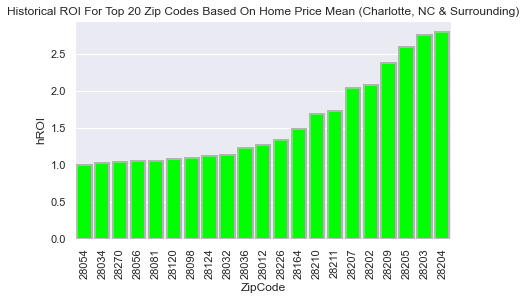

In [55]:
# Plotting the historical ROI of the top 21 zipcodes 
ax = sns.barplot(x="ZipCode", y="hROI", data=top_21_hROI,
                 linewidth=2.0, facecolor=(0, 1, 0, 1),
                 errcolor=".2", edgecolor=".7", dodge=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Historical ROI For Top 20 Zip Codes Based On Home Price Mean (Charlotte, NC & Surrounding)')

In [56]:
# Time to preprocess the dataframe into a workable series
top_21 = top_21.drop(['RegionID','City','State','Metro','CountyName','SizeRank','hROI'], axis=1)

In [57]:
top_21_zip_codes = top_21.RegionName

In [58]:
top_21_zip_codes_list = [i for i in top_21_zip_codes]

In [59]:
top_21 = top_21.drop('RegionName', axis=1)

In [60]:
top_21 = top_21.transpose()

In [61]:
top_21.columns

Int64Index([ 1573,  2630,  4275,  4805,  5943,  6843, 11312, 11953,   409,
              467,  1288,  2635,  2666,  3538,  4259,  4871,  5720,  7905,
             8528,  3909,  9791],
           dtype='int64')

In [62]:
len(top_21_zip_codes_list)

21

In [63]:
top_21 = top_21.rename(columns={1573: top_21_zip_codes_list[0], 2630: top_21_zip_codes_list[1], 4275: top_21_zip_codes_list[2], 4805: top_21_zip_codes_list[3],
                                5943: top_21_zip_codes_list[4], 6843: top_21_zip_codes_list[5], 11312: top_21_zip_codes_list[6], 11953: top_21_zip_codes_list[7], 409: top_21_zip_codes_list[8],
                               467: top_21_zip_codes_list[9], 1288: top_21_zip_codes_list[10], 2635: top_21_zip_codes_list[11], 2666: top_21_zip_codes_list[12], 3538: top_21_zip_codes_list[13],
                               4259: top_21_zip_codes_list[14], 4871: top_21_zip_codes_list[15], 5720: top_21_zip_codes_list[16], 7905: top_21_zip_codes_list[17], 8528: top_21_zip_codes_list[18],
                               3909: top_21_zip_codes_list[19], 9791: top_21_zip_codes_list[20]})

In [64]:
top_21

28054     28056     28012     28120     28034     28164     28098  \
1996-04   70300.0   84900.0   82200.0   83700.0   63300.0   73700.0   63500.0   
1996-05   70600.0   85200.0   82600.0   84000.0   63500.0   73200.0   63800.0   
1996-06   71000.0   85600.0   83100.0   84400.0   63700.0   72700.0   64100.0   
1996-07   71400.0   86000.0   83700.0   84900.0   63900.0   72400.0   64500.0   
1996-08   71800.0   86500.0   84200.0   85500.0   64200.0   72200.0   65000.0   
...           ...       ...       ...       ...       ...       ...       ...   
2017-12  134400.0  171100.0  180500.0  168200.0  125100.0  177800.0  129400.0   
2018-01  135900.0  171900.0  180300.0  169000.0  126100.0  178300.0  130200.0   
2018-02  137600.0  172300.0  181400.0  170000.0  126900.0  178800.0  131100.0   
2018-03  139400.0  173400.0  184100.0  172100.0  127700.0  180900.0  132200.0   
2018-04  140900.0  174700.0  186600.0  174000.0  128400.0  183100.0  132800.0   

            28032     28205     28210  ...     28211     28270     28209  \
1996-04   61200.0   73700.0  135000.0  ...  179000.0  185700.0  122600.0   
1996-05   61800.0   74200.0  135200.0  ...  179600.0  186300.0  123200.0   
1996-06   62400.0   74800.0  135400.0  ...  180200.0  186800.0  123700.0   
1996-07   63000.0   75400.0  135600.0  ...  181000.0  187300.0  124300.0   
1996-08   63600.0   76000.0  135700.0  ...  181900.0  187600.0  125000.0   
...           ...       ...       ...  ...       ...       ...       ...   
2017-12  127900.0  247100.0  356200.0  ...  466800.0  370000.0  404400.0   
2018-01  128000.0  251500.0  357400.0  ...  469900.0  372300.0  405600.0   
2018-02  128400.0  256300.0  359100.0  ...  474800.0  374800.0  407300.0   
2018-03  129700.0  262000.0  362200.0  ...  482600.0  377700.0  411600.0   
2018-04  131100.0  265900.0  363800.0  ...  489300.0  379200.0  415200.0   

            28203     28202     28036     28204      28207     28081     28124  
1996-04  162500.0  120600.0  179200.0  153100.0   406100.0   61900.0   71600.0  
1996-05  162900.0  121800.0  180700.0  153200.0   408700.0   62300.0   71700.0  
1996-06  163300.0  122900.0  182000.0  153400.0   411200.0   62600.0   71700.0  
1996-07  163700.0  124100.0  183100.0  153500.0   413700.0   62900.0   71600.0  
1996-08  164000.0  125100.0  184000.0  153700.0   415900.0   63100.0   71600.0  
...           ...       ...       ...       ...        ...       ...       ...  
2017-12  584300.0  364200.0  390600.0  560300.0  1216100.0  125600.0  140900.0  
2018-01  588900.0  366100.0  390700.0  570500.0  1225200.0  125700.0  141100.0  
2018-02  595500.0  368000.0  393400.0  576400.0  1230900.0  125800.0  143300.0  
2018-03  605400.0  370300.0  397900.0  580200.0  1235400.0  126700.0  147900.0  
2018-04  612100.0  372000.0  400700.0  583400.0  1238000.0  127500.0  152300.0  

[265 rows x 21 columns]

In [65]:
top_21_series = top_21

In [66]:
top_21_series.index = pd.to_datetime(top_21_series.index)

In [67]:
top_21_series

28054     28056     28012     28120     28034     28164  \
1996-04-01   70300.0   84900.0   82200.0   83700.0   63300.0   73700.0   
1996-05-01   70600.0   85200.0   82600.0   84000.0   63500.0   73200.0   
1996-06-01   71000.0   85600.0   83100.0   84400.0   63700.0   72700.0   
1996-07-01   71400.0   86000.0   83700.0   84900.0   63900.0   72400.0   
1996-08-01   71800.0   86500.0   84200.0   85500.0   64200.0   72200.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  134400.0  171100.0  180500.0  168200.0  125100.0  177800.0   
2018-01-01  135900.0  171900.0  180300.0  169000.0  126100.0  178300.0   
2018-02-01  137600.0  172300.0  181400.0  170000.0  126900.0  178800.0   
2018-03-01  139400.0  173400.0  184100.0  172100.0  127700.0  180900.0   
2018-04-01  140900.0  174700.0  186600.0  174000.0  128400.0  183100.0   

               28098     28032     28205     28210  ...     28211     28270  \
1996-04-01   63500.0   61200.0   73700.0  135000.0  ...  179000.0  185700.0   
1996-05-01   63800.0   61800.0   74200.0  135200.0  ...  179600.0  186300.0   
1996-06-01   64100.0   62400.0   74800.0  135400.0  ...  180200.0  186800.0   
1996-07-01   64500.0   63000.0   75400.0  135600.0  ...  181000.0  187300.0   
1996-08-01   65000.0   63600.0   76000.0  135700.0  ...  181900.0  187600.0   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-01  129400.0  127900.0  247100.0  356200.0  ...  466800.0  370000.0   
2018-01-01  130200.0  128000.0  251500.0  357400.0  ...  469900.0  372300.0   
2018-02-01  131100.0  128400.0  256300.0  359100.0  ...  474800.0  374800.0   
2018-03-01  132200.0  129700.0  262000.0  362200.0  ...  482600.0  377700.0   
2018-04-01  132800.0  131100.0  265900.0  363800.0  ...  489300.0  379200.0   

               28209     28203     28202     28036     28204      28207  \
1996-04-01  122600.0  162500.0  120600.0  179200.0  153100.0   406100.0   
1996-05-01  123200.0  162900.0  121800.0  180700.0  153200.0   408700.0   
1996-06-01  123700.0  163300.0  122900.0  182000.0  153400.0   411200.0   
1996-07-01  124300.0  163700.0  124100.0  183100.0  153500.0   413700.0   
1996-08-01  125000.0  164000.0  125100.0  184000.0  153700.0   415900.0   
...              ...       ...       ...       ...       ...        ...   
2017-12-01  404400.0  584300.0  364200.0  390600.0  560300.0  1216100.0   
2018-01-01  405600.0  588900.0  366100.0  390700.0  570500.0  1225200.0   
2018-02-01  407300.0  595500.0  368000.0  393400.0  576400.0  1230900.0   
2018-03-01  411600.0  605400.0  370300.0  397900.0  580200.0  1235400.0   
2018-04-01  415200.0  612100.0  372000.0  400700.0  583400.0  1238000.0   

               28081     28124  
1996-04-01   61900.0   71600.0  
1996-05-01   62300.0   71700.0  
1996-06-01   62600.0   71700.0  
1996-07-01   62900.0   71600.0  
1996-08-01   63100.0   71600.0  
...              ...       ...  
2017-12-01  125600.0  140900.0  
2018-01-01  125700.0  141100.0  
2018-02-01  125800.0  143300.0  
2018-03-01  126700.0  147900.0  
2018-04-01  127500.0  152300.0  

[265 rows x 21 columns]

Text(0.5, 1.0, 'Time Series Plot: Top 21 ZipCodes For Home Prices In Charlotte & Surrounding (1996-2018)')

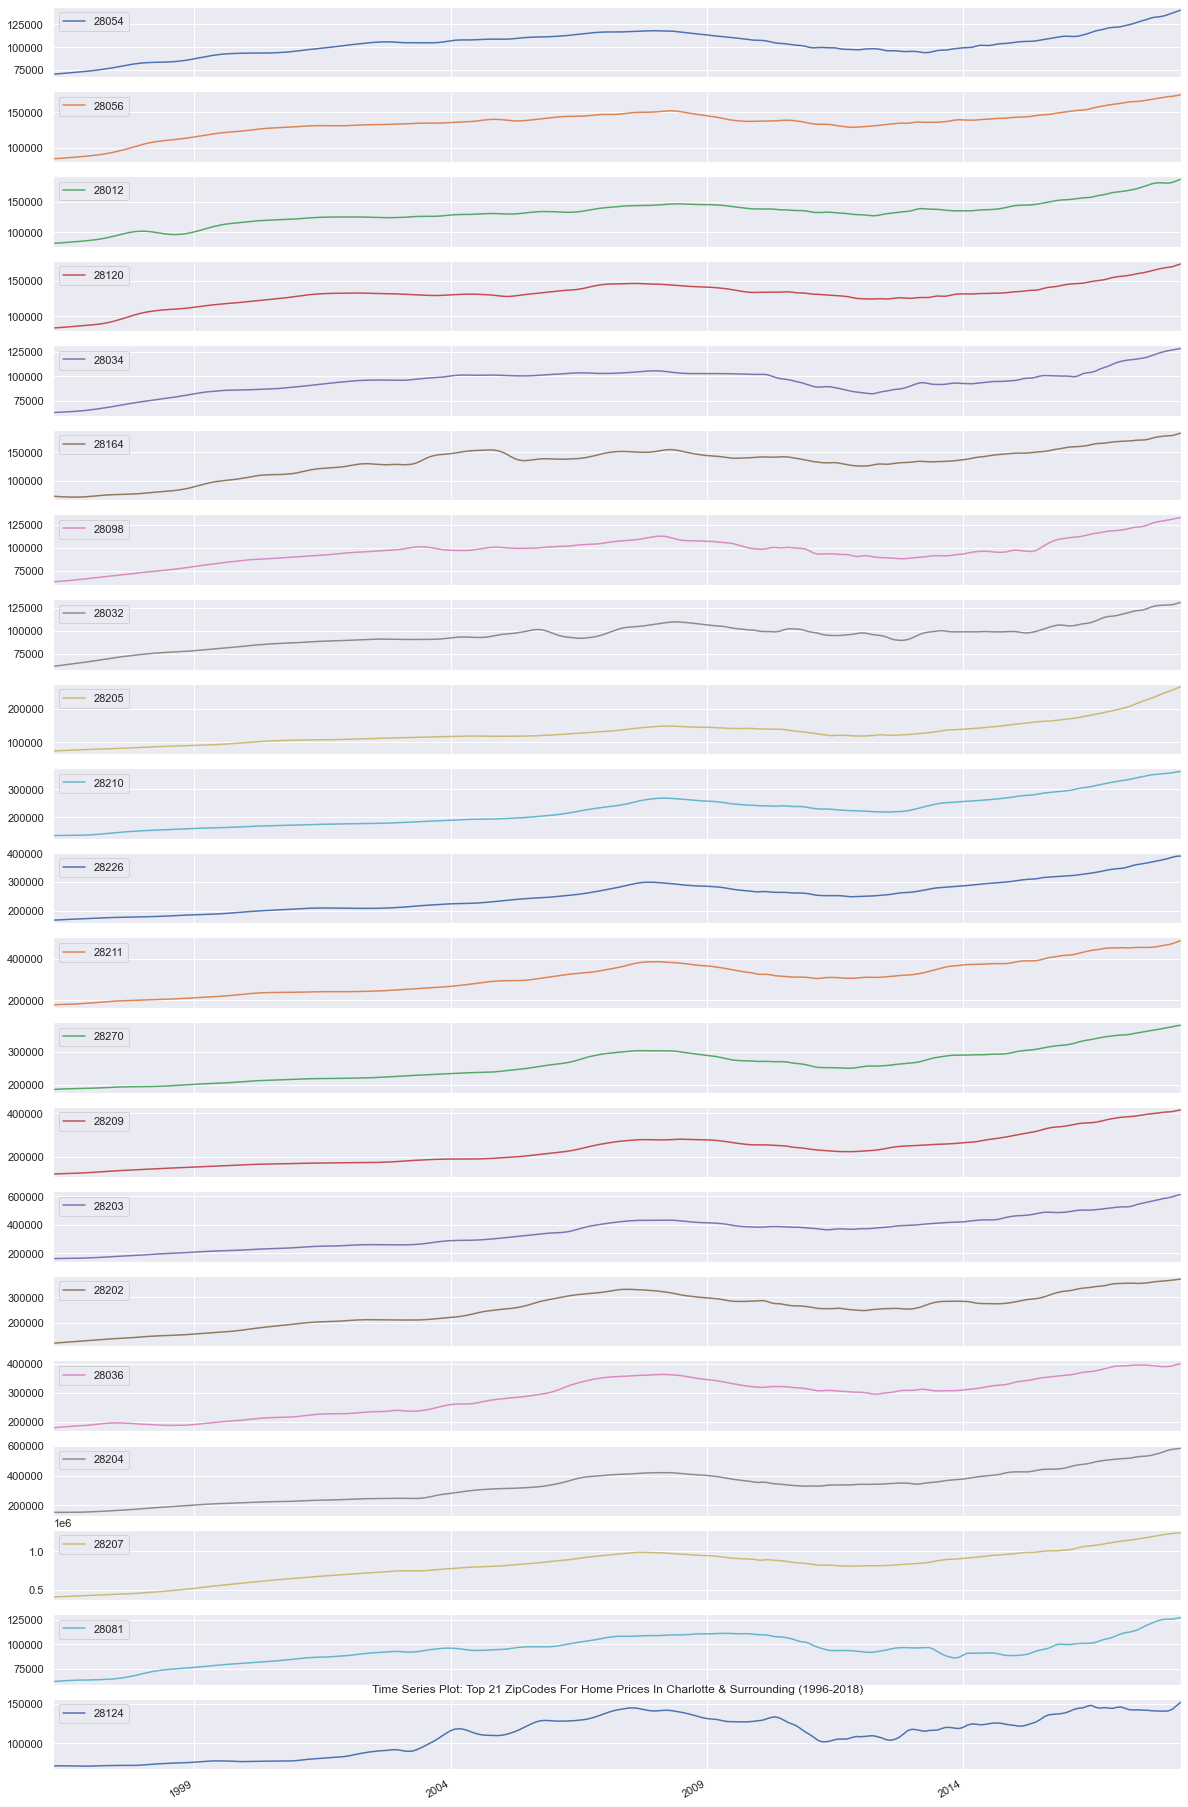

In [68]:
top_21_series.plot(figsize=(18,36), legend='best', subplots=True)
plt.title('Time Series Plot: Top 21 ZipCodes For Home Prices In Charlotte & Surrounding (1996-2018)')

Why I've Decided To Focus On Zip Code 28204:
--
Zip code 28204 is located in Charlotte, NC and has the highest historical ROI (hROI). I'll be focusing on this zip code for initial Time Series modeling.

Text(0.5, 1.0, 'Time Series Plot: Zip Code 28204')

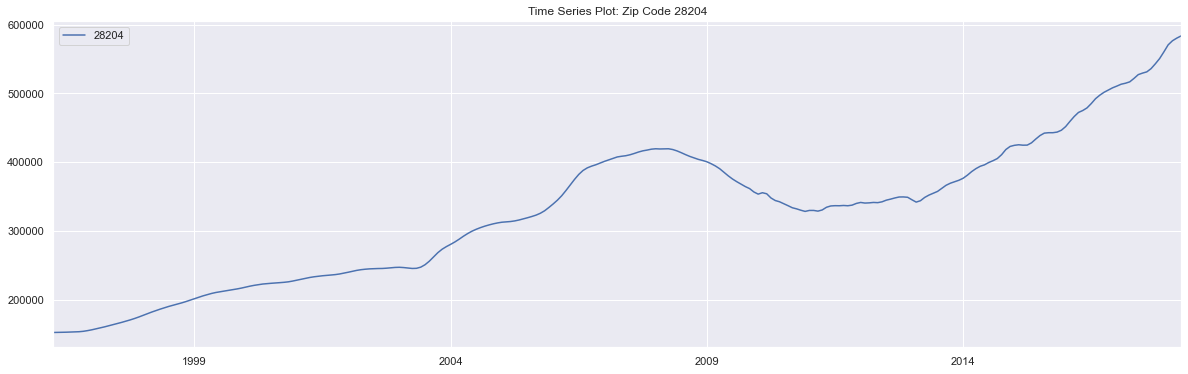

In [69]:
# Choosing to focus on zip code 28204
top_21_series['28204'].plot(figsize=(18,6), legend='best')
plt.title('Time Series Plot: Zip Code 28204')

In [70]:
top_zip_series = top_21_series['28204']

In [71]:
top_zip_series_yr = top_zip_series.groupby(pd.Grouper(freq='A'))

Text(0, 0.5, 'Home Prices (Mean)')

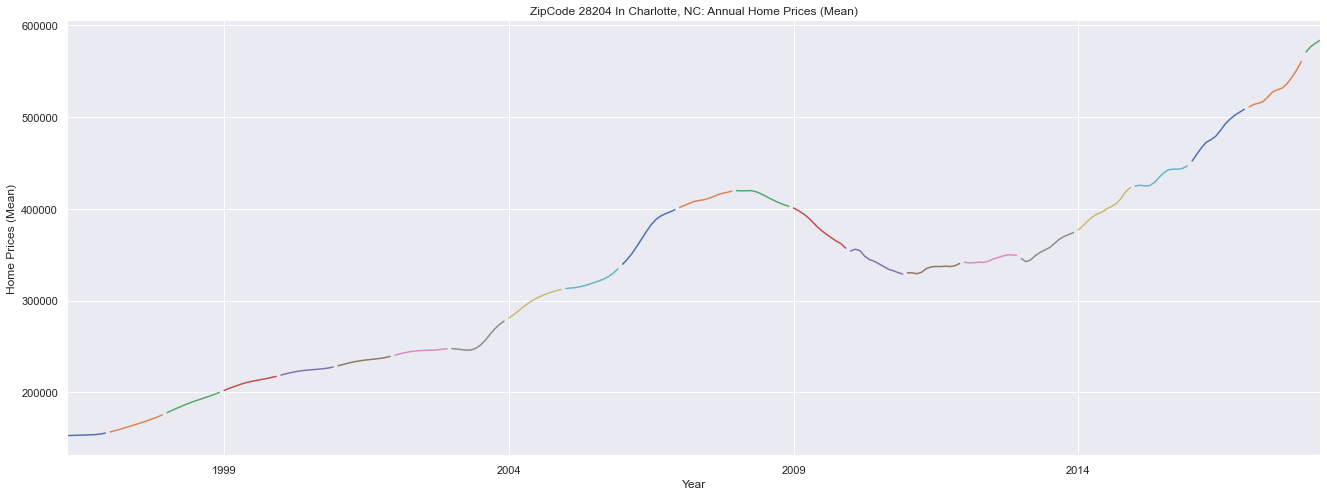

In [72]:
top_zip_series_yr.plot(figsize=(20,8), legend=False)
plt.title('ZipCode 28204 In Charlotte, NC: Annual Home Prices (Mean)')
plt.xlabel('Year')
plt.ylabel('Home Prices (Mean)')

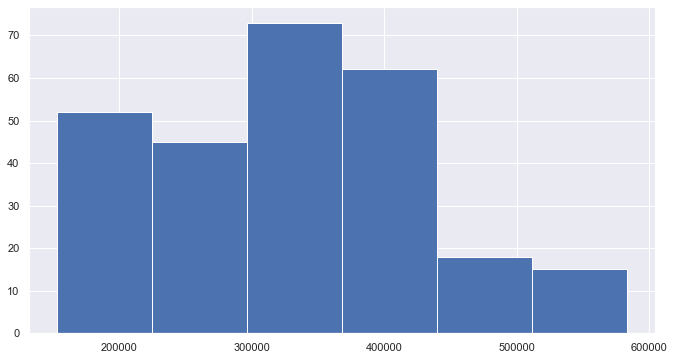

In [73]:
# Checking for the distribution of values as to whether it is Gaussian
top_zip_series.hist(figsize = (10,6), bins=6);

The Distribution Doesn't Appear To Be Gaussian
--
I've tried with 3,5,7,and 9 bins but still I'm not seeing a Gaussian (or normal) distribution. I'll check the density.

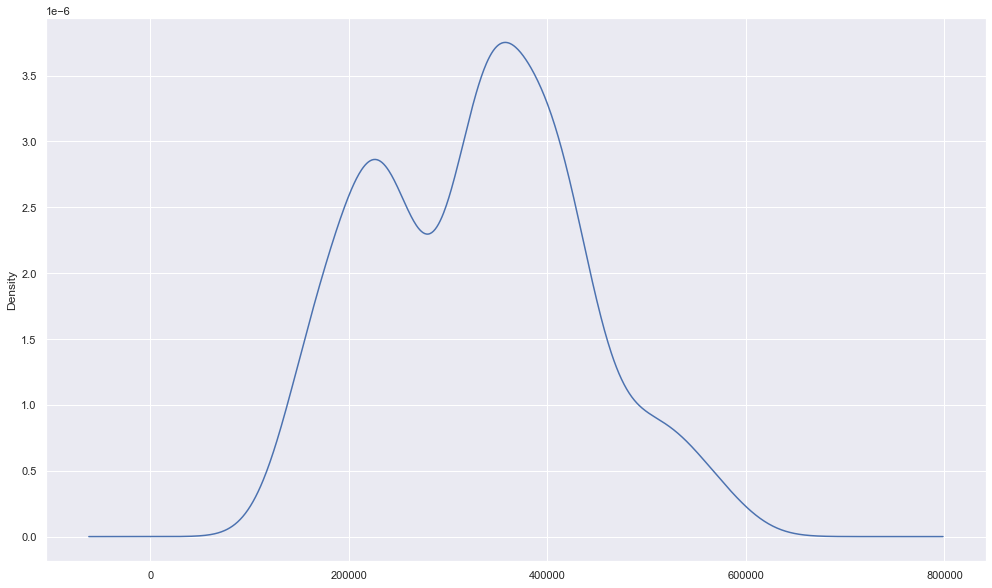

In [74]:
# Checking for normal distribution with a Kernal Density Estimation plot
top_zip_series.plot(kind='kde', figsize = (15,10));

Results: More Gaussian / Normal Distribution Is Revealed
--
It appears from the KDE plot that the distribution is indeed somewhat normal. However, let's check the mean of this distribution to get a sense for where the standard distribution ought to be. 

In [75]:
top_zip_series.describe()

count       265.000000
mean     328582.641509
std      104189.254160
min      153100.000000
25%      237100.000000
50%      337900.000000
75%      402700.000000
max      583400.000000
Name: 28204, dtype: float64

Somewhat of a Non-Normal Distribution???
--
I'll need to research this more to determine whether this is a normal-ish Gaussian distribution or whether it isn't sufficient to describe it as such. As of now, I'd say that it is indeed Gaussian but only somewhat. 

Nevertheless, I'll do a test to officially confirm whether this is Gaussian and there may be a need to reshape the distribution somehow, as it appears to either be a <b>linear</b> or <b>exponential</b> distribution, which would mean the distribution was non-stationary, and I'd have to employ methods to improve its stationarity.

I'll check for trends now.

In [76]:
# Checking the rolling mean and standard deviation
roll_mean = top_zip_series.rolling(window=10, center=False).mean()
roll_std = top_zip_series.rolling(window=10, center=False).std()

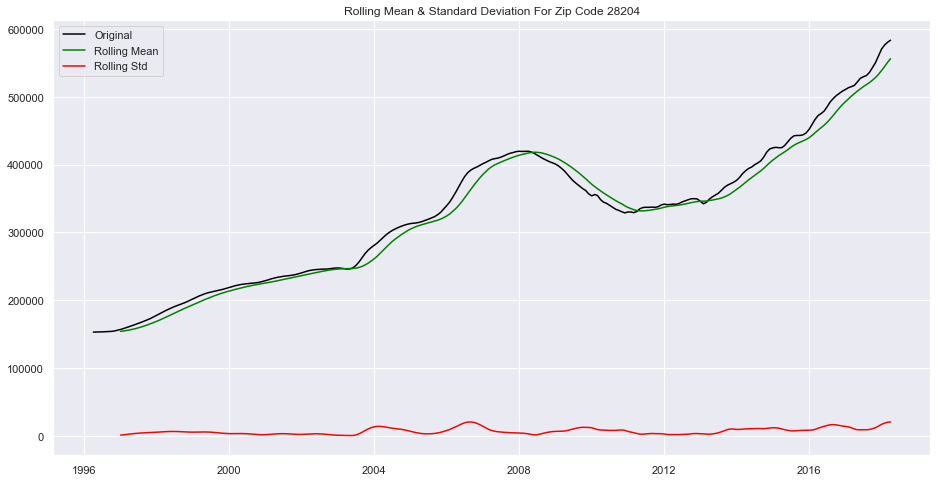

In [77]:
fig = plt.figure(figsize=(14,8))
plt.plot(top_zip_series, color='black', label='Original')
plt.plot(roll_mean, color='green', label='Rolling Mean')
plt.plot(roll_std, color='red', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation For Zip Code 28204')
plt.show(block=False)

Standard Deviation Is Constant While Mean Is Not
--
Based on the Rolling Mean & STD tests, I can confirm with significant confidence that this distribution is <b>not stationary.</b> I believe a Dickey-Fuller test will further prove that this distribution is not stationary.

In [78]:
# Dickey-Full test
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(top_zip_series)

df_results = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
    df_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -0.181252
p-value                          0.940720
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


Confirmation of Non-Stationary Series
--
The Dickey-Fuller test results show that this Series is non-stationary, with a p-value well above all of the Critical Values.

In [79]:
from numpy import log
from matplotlib import pyplot

In [80]:
# Performing a log-transform of the Series in order to check on distribution again
X = top_zip_series.values
X = log(X)

(array([20., 13., 24., 32.,  9., 41., 45., 52., 13., 16.]),
 array([11.93884658, 12.07262476, 12.20640293, 12.34018111, 12.47395928,
        12.60773746, 12.74151563, 12.87529381, 13.00907199, 13.14285016,
        13.27662834]),
 <BarContainer object of 10 artists>)

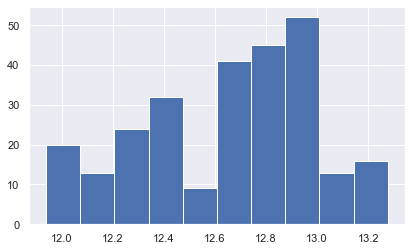

In [81]:
pyplot.hist(X)

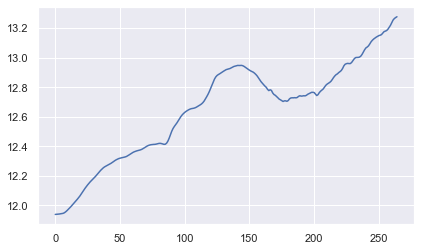

In [82]:
pyplot.plot(X)

In [83]:
df_test = adfuller(X)

df_results = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
    df_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -0.964899
p-value                          0.765850
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


Non-Staionarity Remains
--
After log-transforming the Series and running another DF test, the non-stationarity remains. I'll need to remove the trends from this Series. Between 100-175 there appears to be exponential growth, and then there is a return to the linearity.

But, I'd like to check on the square and cube roots first.

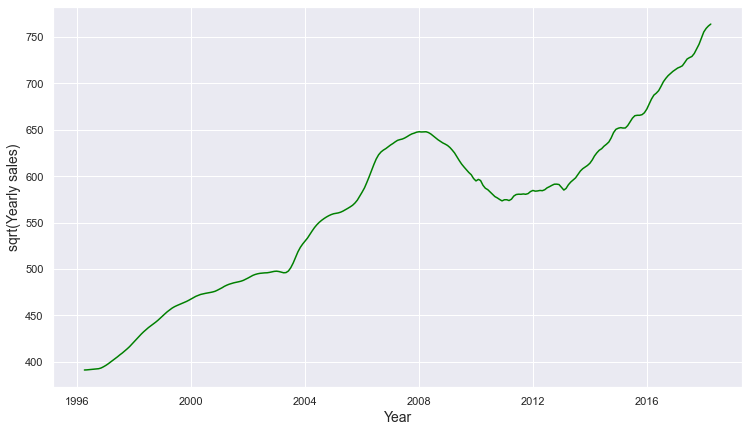

In [84]:
data = pd.Series(np.sqrt(top_zip_series), index=top_zip_series.index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='green')
plt.xlabel('Year', fontsize=14)
plt.ylabel('sqrt(Yearly sales)', fontsize=14)
plt.show()

The Impact of Pre & Post 2008: 
--
It's been clear but I'll address it here -- the market activity and home prices before and after 2008 represent an outlier in the Series. However, because the other zip codes will likely have been impacted by this period as well, I'll be keeping it as apart of the Series. However, now what I'll do is remove the trends as completely as possible.

Firstly, I'll try <b>differencing.</b>

In [85]:
# Taking a difference of 1 with the original Series (without the log-transformation)
top_zip_series_diff = top_zip_series.diff(periods=1)
top_zip_series_diff.head(10)

1996-04-01       NaN
1996-05-01     100.0
1996-06-01     200.0
1996-07-01     100.0
1996-08-01     200.0
1996-09-01     200.0
1996-10-01     300.0
1996-11-01     600.0
1996-12-01    1000.0
1997-01-01    1200.0
Name: 28204, dtype: float64

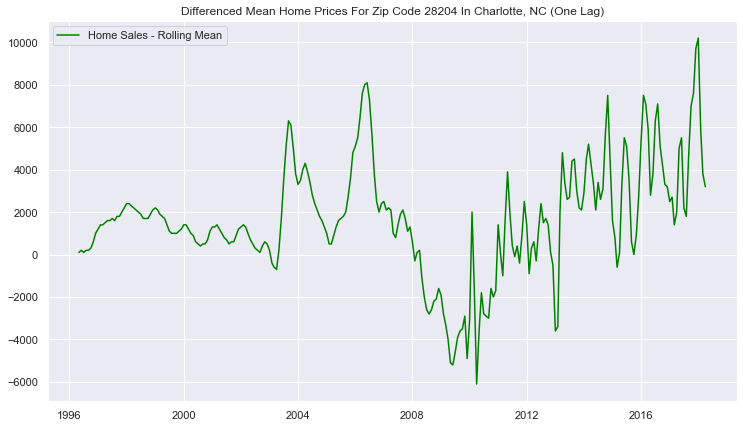

In [86]:
fig = plt.figure(figsize=(11,7))
plt.plot(top_zip_series_diff, color='green',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Mean Home Prices For Zip Code 28204 In Charlotte, NC (One Lag)')
plt.show(block=False)

In [87]:
# Dickey - Full
df_test_1diff = adfuller(top_zip_series_diff[1:])

df_results_1diff = pd.Series(df_test_1diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test_1diff[4].items():
    df_results_1diff['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results_1diff)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -2.074186
p-value                          0.255020
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [88]:
# Adjusting the lags to 6
top_zip_series_diff_6 = top_zip_series.diff(periods=6)
top_zip_series_diff_6.head(10)

1996-04-01       NaN
1996-05-01       NaN
1996-06-01       NaN
1996-07-01       NaN
1996-08-01       NaN
1996-09-01       NaN
1996-10-01    1100.0
1996-11-01    1600.0
1996-12-01    2400.0
1997-01-01    3500.0
Name: 28204, dtype: float64

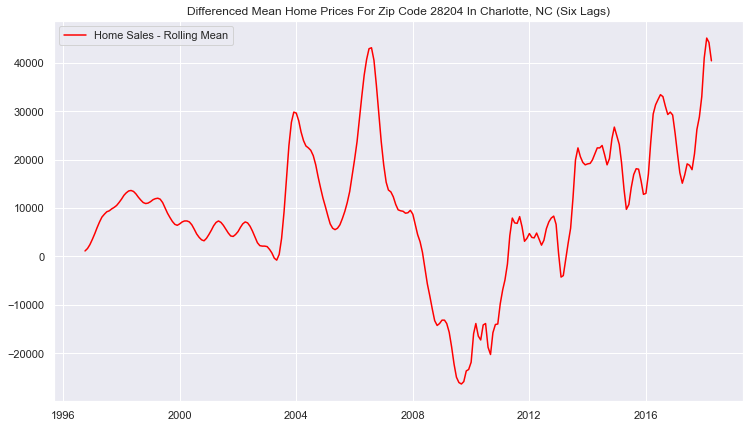

In [89]:
fig = plt.figure(figsize=(11,7))
plt.plot(top_zip_series_diff_6, color='red',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Mean Home Prices For Zip Code 28204 In Charlotte, NC (Six Lags)')
plt.show(block=False)

In [90]:
# Dickey - Full
df_test_6diff = adfuller(top_zip_series_diff_6[6:])

df_results_6diff = pd.Series(df_test_6diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test_6diff[4].items():
    df_results_6diff['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results_6diff)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -1.481912
p-value                          0.542439
#Lags Used                      16.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [91]:
top_zip_series_diff_18 = top_zip_series.diff(periods=18)
top_zip_series_diff_18.tail(10)

2017-07-01    77600.0
2017-08-01    71900.0
2017-09-01    69500.0
2017-10-01    70600.0
2017-11-01    75400.0
2017-12-01    81300.0
2018-01-01    85200.0
2018-02-01    84000.0
2018-03-01    82700.0
2018-04-01    81700.0
Name: 28204, dtype: float64

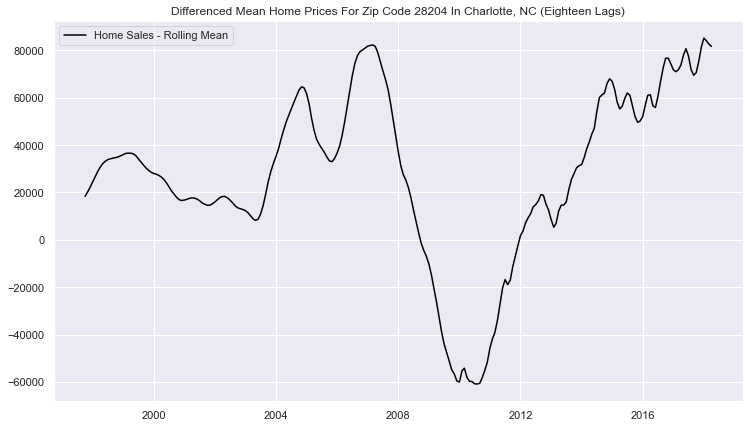

In [92]:
fig = plt.figure(figsize=(11,7))
plt.plot(top_zip_series_diff_18, color='black',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Mean Home Prices For Zip Code 28204 In Charlotte, NC (Eighteen Lags)')
plt.show(block=False)

In [93]:
# Dickey - Full
df_test_18diff = adfuller(top_zip_series_diff_18[18:])

df_results_18diff = pd.Series(df_test_18diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test_18diff[4].items():
    df_results_18diff['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(df_results_18diff)

Results of Dickey-Fuller test: 

-----------
Test Statistic                  -1.246284
p-value                          0.653375
#Lags Used                      16.000000
Number of Observations Used    230.000000
Critical Value (1%)             -3.459106
Critical Value (5%)             -2.874190
Critical Value (10%)            -2.573512
dtype: float64


Differencing Still Doesn't Remove Trends
--
Even with using eighteen lags, the Series remains impacted by fluctuating covariance, heteroscedasticity as well as the mean. It appears that Differencing doesn't help to achieve stationairty. I'll do a Seasonal Decompose now to complete as full as possible of a removal of trends & seasonality.

But first, I'd like to make it easier to check for Stationarity in the event I need to.

In [94]:
# Creating a function for checking stationarity

def stationarity_checker(ts):
    
    from statsmodels.tsa.stattools import adfuller
    
    # For Rolling Statistics -- as needed
    roll_mean = ts.rolling(window=12, center=False).mean()
    roll_std = ts.rolling(window=12, center=False).std()
    
    # Dickey Full
    df_test = adfuller(ts) 
    
    # Rolling statistics -- plotting:
    fig = plt.figure(figsize=(12,6))
    original = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='green', label='Rolling Mean')
    std = plt.plot(roll_std, color='red', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey Full
    print('Results of Dickey-Fuller Test: \n')
    print('---------------------------------')

    df_results = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '# of Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_results['The Critical Value (%s)'%key] = value
        
    print(df_results)
    print('---------------------------------')
    
    # Plot Time Series
    ts.plot(figsize=(10,4), color='purple');
    plt.title('Initial Plot of Time Series In Question')
    
    return None

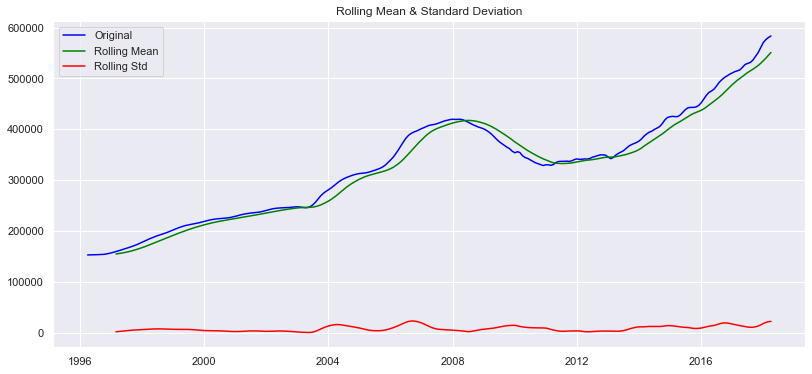

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -0.181252
p-value                          0.940720
# of Lags Used                  16.000000
Number of Observations Used    248.000000
The Critical Value (1%)         -3.456996
The Critical Value (5%)         -2.873266
The Critical Value (10%)        -2.573019
dtype: float64
---------------------------------


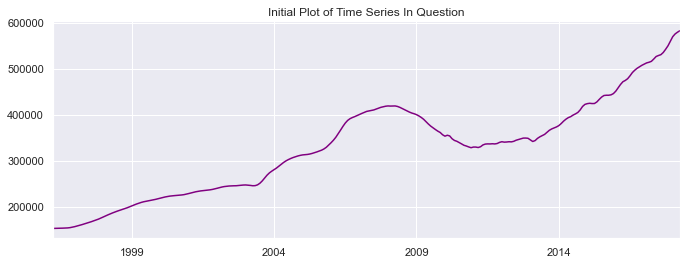

In [95]:
stationarity_checker(top_zip_series)

Performing Seasonal Decompose: Additive
--
Based on the way the Time Series looks from the visual test (and statistical tests) I'll perform a Seasonal Decompose using the Additive model, as the Series appears to show Additive seasonality more than Multiplicative seasonality.

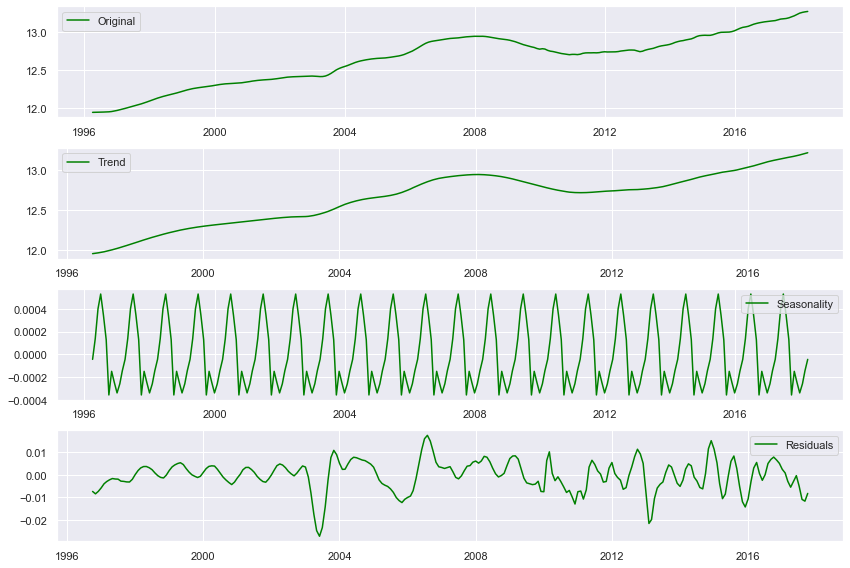

In [96]:
# Performing Seasonl Decompose analysis on Time Series

from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(np.log(top_zip_series))

# Actualize trend, seasonality, and residuals variables
trend = decom.trend
seasonal = decom.seasonal
residual = decom.resid

# Plotting the statistical results
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(top_zip_series), label='Original', color='green')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='green')
plt.legend(loc='best')
plt.tight_layout()

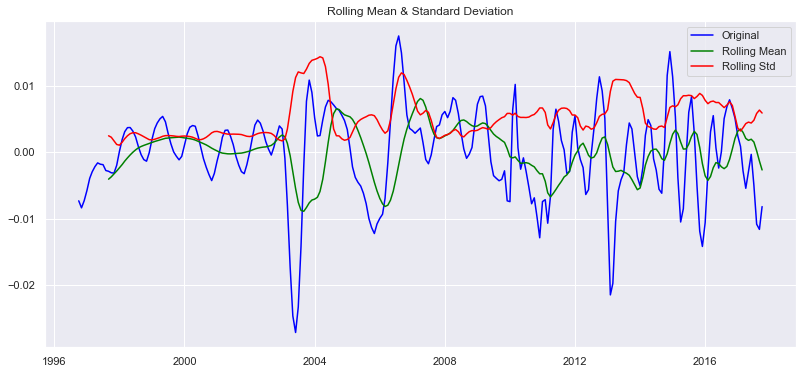

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -4.921790
p-value                          0.000032
# of Lags Used                  13.000000
Number of Observations Used    239.000000
The Critical Value (1%)         -3.458011
The Critical Value (5%)         -2.873710
The Critical Value (10%)        -2.573256
dtype: float64
---------------------------------


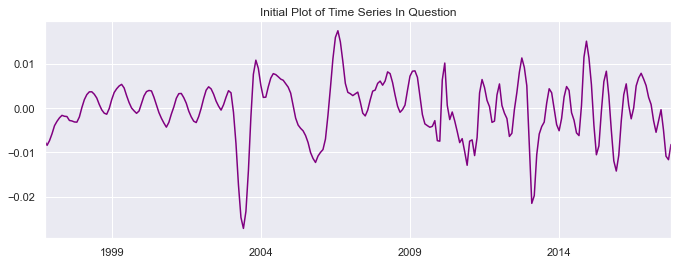

In [97]:
# Checking for stationarity -- with Residuals of the Time Series
series_resid = residual
series_resid.dropna(inplace=True)

stationarity_checker(series_resid)

How Predictable Is The Series: Using Autocorrelation To Check
--
Now, I'll check on the Autocorrelation of the Series.

In [98]:
# Implementing the Time Series Autocorrelation

top_zip_autocorr = series_resid.shift(periods=1)
top_zip_autocorr.head()

1996-10-01         NaN
1996-11-01   -0.007327
1996-12-01   -0.008384
1997-01-01   -0.007316
1997-02-01   -0.005774
Name: resid, dtype: float64

          resid     resid
resid  1.000000  0.852371
resid  0.852371  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


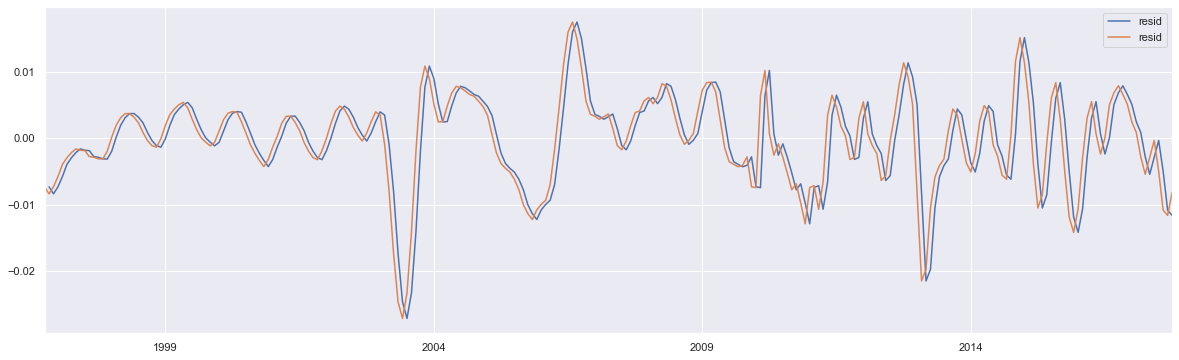

In [99]:
# Plotting 1-lag Autocorrelation

lag_one = pd.concat([top_zip_autocorr, series_resid], axis=1)

print(lag_one.corr());
print(lag_one.plot(figsize=(18,6)))

In [100]:
# Creating function to check Autocorrelation at n-lags

def acorr(series,number_of_lags):
    
    shifter = series.shift(periods=number_of_lags)
    orig_with_lags = pd.concat([shifter,series], axis=1)
    print(orig_with_lags.corr());
    print(orig_with_lags.plot(figsize=(18,6)))

          resid     resid
resid  1.000000  0.530396
resid  0.530396  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


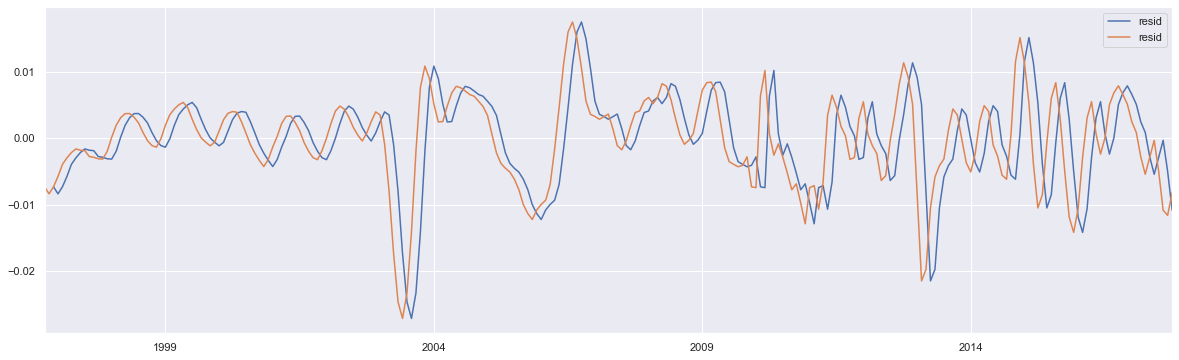

In [101]:
acorr(series_resid,2)

          resid     resid
resid  1.000000  0.213133
resid  0.213133  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


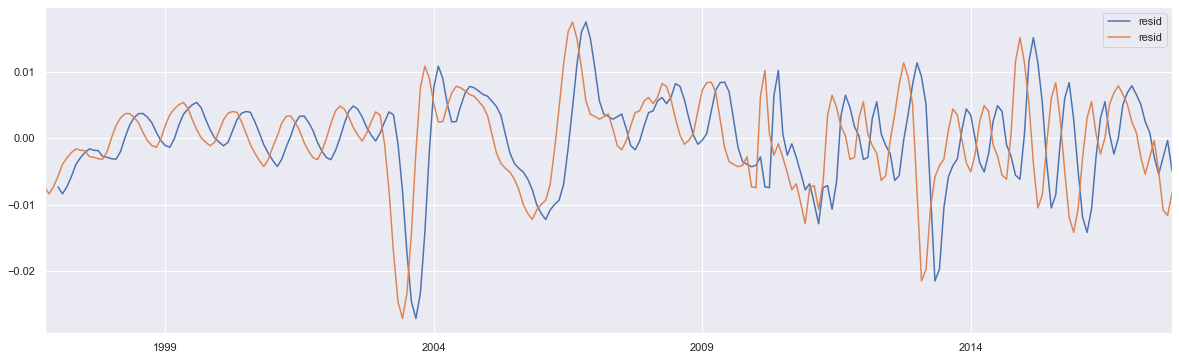

In [102]:
acorr(series_resid,3)

          resid     resid
resid  1.000000 -0.016357
resid -0.016357  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


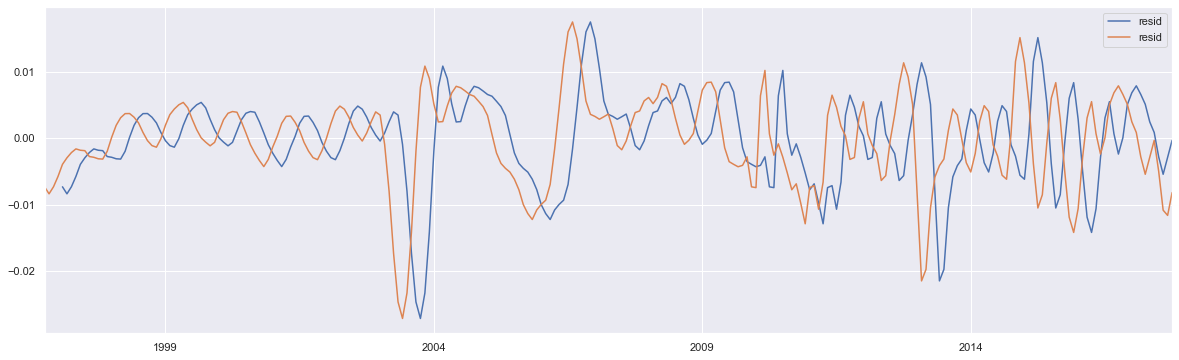

In [103]:
acorr(series_resid,4)

Series Residual Autocorrelation Results:
--
It appears that there is significance around 3 or 4 shifts

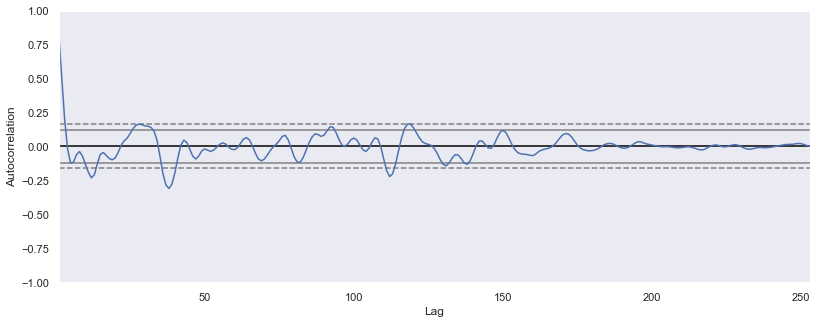

In [104]:
# Employing the Auto-Correlation function
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(series_resid);

Now For PACF
--
I'll plot a PACF (Partial Auto-Correlation Function) to further investigate.

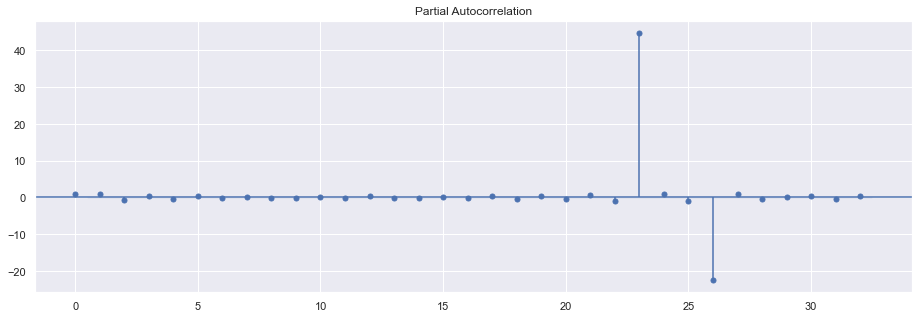

In [105]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(series_resid, lags=32);

PACF Analysis for Residuals:
--
A lag of 23 is best to start with for terms related to PACF, according to these results.

Terms For Seasonal portion of Series:
--

Now, I'll check on which terms may be idea to start with for Seasonality

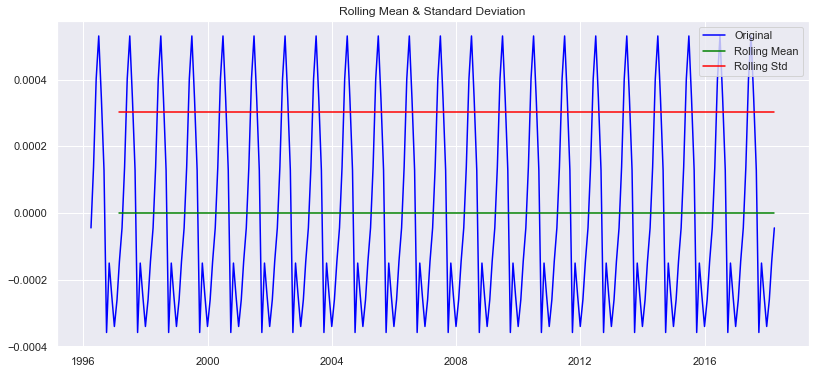

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                -8.933587e+13
p-value                        0.000000e+00
# of Lags Used                 1.200000e+01
Number of Observations Used    2.520000e+02
The Critical Value (1%)       -3.456569e+00
The Critical Value (5%)       -2.873079e+00
The Critical Value (10%)      -2.572919e+00
dtype: float64
---------------------------------


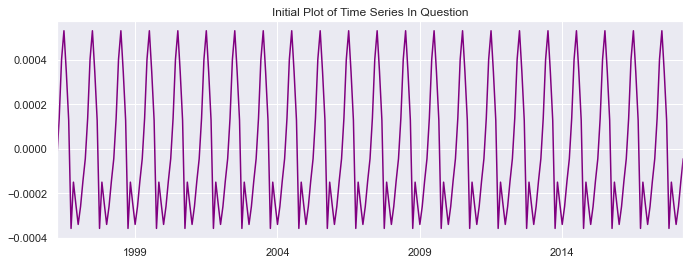

In [106]:
# Checking for stationarity -- with Residuals of the Time Series
series_season = seasonal
series_season.dropna(inplace=True)

stationarity_checker(series_season)

In [107]:
# Implementing the Time Series Autocorrelation

top_zip_autocorr = series_season.shift(periods=1)
top_zip_autocorr.head()

1996-04-01         NaN
1996-05-01   -0.000044
1996-06-01    0.000138
1996-07-01    0.000402
1996-08-01    0.000531
Name: seasonal, dtype: float64

          seasonal  seasonal
seasonal  1.000000  0.739763
seasonal  0.739763  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


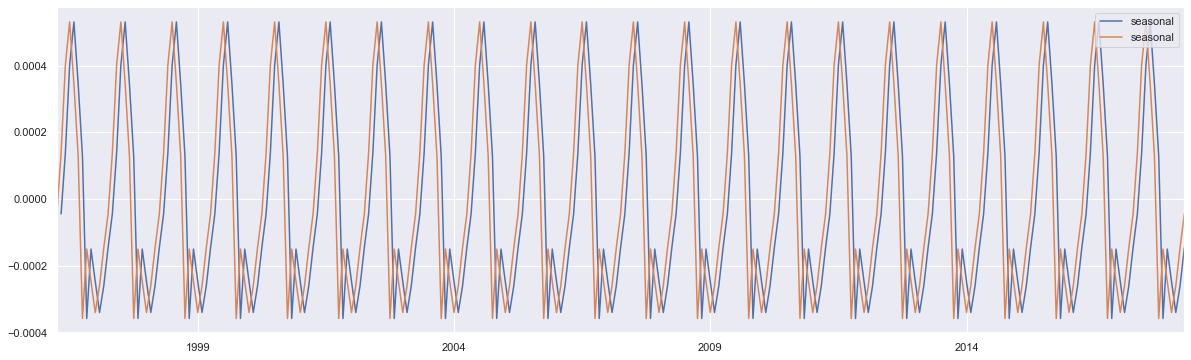

In [108]:
# Checking A-corr for 1 lag for seasonal component of the Series
acorr(series_season,1)

          seasonal  seasonal
seasonal  1.000000  0.359677
seasonal  0.359677  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


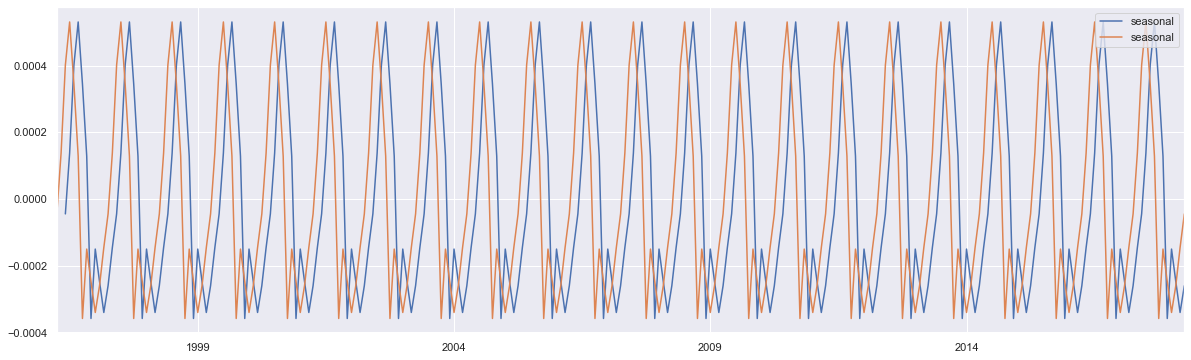

In [109]:
acorr(series_season,2)

          seasonal  seasonal
seasonal   1.00000  -0.07542
seasonal  -0.07542   1.00000
AxesSubplot(0.08,0.125;0.87x0.755)


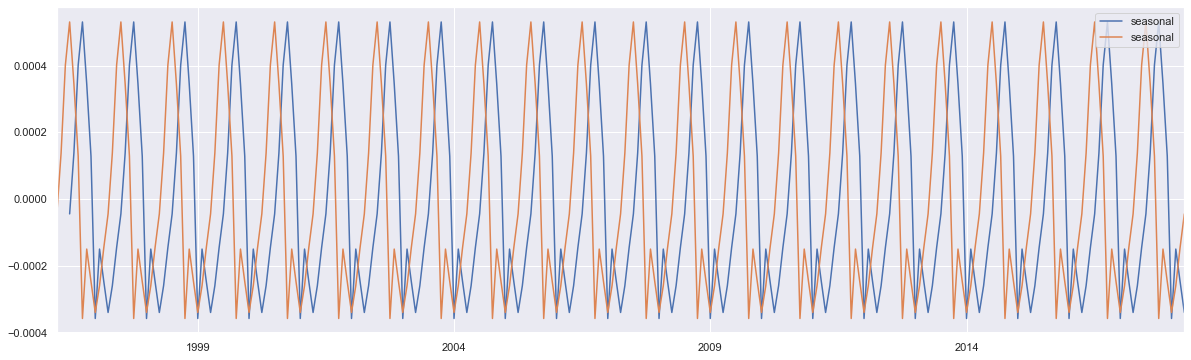

In [110]:
acorr(series_season,3)

Auto-Correlation Shifts of Significance
--
It appears that it may be best to start with 2 or 3 shifts for the terms.

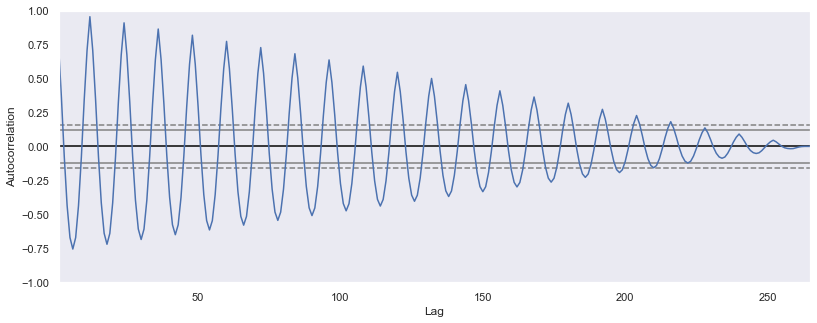

In [111]:
# Employing the Auto-Correlation function on the Seasonal portion of the Series
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(series_season);

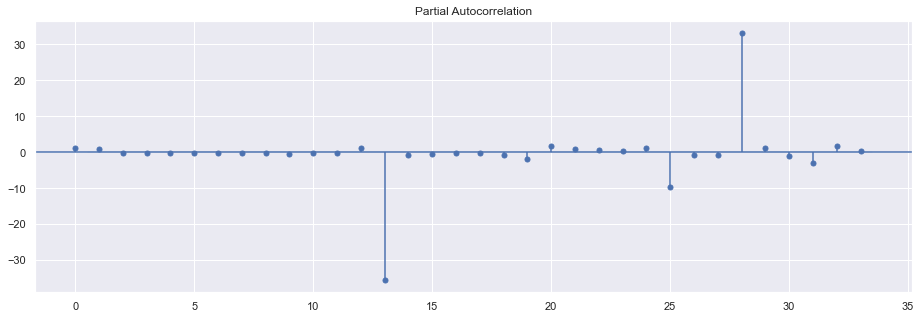

In [112]:
# Running PACF to investigate further 

rcParams['figure.figsize'] = 14, 5

plot_pacf(series_season, lags=33);

How Is 2008's Great Recession Impacting The Series?
--
After doing analysis on this zip code (28204), what I'd like to do is remove all data prior to 2010, and start from there. 

I'd like to ascertain how the 8-year Series looks, without the "Great Recession" affect.

In [113]:
# Taking the Series from start month of 01-2010
series_2010 = top_21_series['2010':]

In [114]:
series_2010

28054     28056     28012     28120     28034     28164  \
2010-01-01  107500.0  137500.0  138200.0  133900.0  102000.0  141400.0   
2010-02-01  107400.0  137600.0  138100.0  134000.0  102100.0  141800.0   
2010-03-01  106800.0  137600.0  138200.0  133900.0  101800.0  141600.0   
2010-04-01  105800.0  137800.0  138200.0  134100.0  100600.0  141300.0   
2010-05-01  104700.0  138000.0  137600.0  134100.0   99000.0  141400.0   
...              ...       ...       ...       ...       ...       ...   
2017-12-01  134400.0  171100.0  180500.0  168200.0  125100.0  177800.0   
2018-01-01  135900.0  171900.0  180300.0  169000.0  126100.0  178300.0   
2018-02-01  137600.0  172300.0  181400.0  170000.0  126900.0  178800.0   
2018-03-01  139400.0  173400.0  184100.0  172100.0  127700.0  180900.0   
2018-04-01  140900.0  174700.0  186600.0  174000.0  128400.0  183100.0   

               28098     28032     28205     28210  ...     28211     28270  \
2010-01-01   98800.0   99800.0  139700.0  241700.0  ...  326600.0  269800.0   
2010-02-01   98600.0   99200.0  139600.0  241100.0  ...  325900.0  270000.0   
2010-03-01   99200.0   99100.0  139800.0  240900.0  ...  326500.0  270300.0   
2010-04-01  100400.0   99100.0  139400.0  240400.0  ...  323800.0  269700.0   
2010-05-01  100700.0   98700.0  138700.0  239700.0  ...  319500.0  269100.0   
...              ...       ...       ...       ...  ...       ...       ...   
2017-12-01  129400.0  127900.0  247100.0  356200.0  ...  466800.0  370000.0   
2018-01-01  130200.0  128000.0  251500.0  357400.0  ...  469900.0  372300.0   
2018-02-01  131100.0  128400.0  256300.0  359100.0  ...  474800.0  374800.0   
2018-03-01  132200.0  129700.0  262000.0  362200.0  ...  482600.0  377700.0   
2018-04-01  132800.0  131100.0  265900.0  363800.0  ...  489300.0  379200.0   

               28209     28203     28202     28036     28204      28207  \
2010-01-01  255400.0  382500.0  286700.0  319400.0  353900.0   884700.0   
2010-02-01  255500.0  383100.0  287700.0  318800.0  355900.0   884400.0   
2010-03-01  255300.0  385300.0  284700.0  319900.0  354400.0   889300.0   
2010-04-01  254400.0  387100.0  279100.0  321600.0  348300.0   887300.0   
2010-05-01  253100.0  387100.0  275700.0  321800.0  344600.0   880700.0   
...              ...       ...       ...       ...       ...        ...   
2017-12-01  404400.0  584300.0  364200.0  390600.0  560300.0  1216100.0   
2018-01-01  405600.0  588900.0  366100.0  390700.0  570500.0  1225200.0   
2018-02-01  407300.0  595500.0  368000.0  393400.0  576400.0  1230900.0   
2018-03-01  411600.0  605400.0  370300.0  397900.0  580200.0  1235400.0   
2018-04-01  415200.0  612100.0  372000.0  400700.0  583400.0  1238000.0   

               28081     28124  
2010-01-01  109900.0  128700.0  
2010-02-01  109800.0  129400.0  
2010-03-01  109600.0  131100.0  
2010-04-01  108700.0  132800.0  
2010-05-01  107800.0  133600.0  
...              ...       ...  
2017-12-01  125600.0  140900.0  
2018-01-01  125700.0  141100.0  
2018-02-01  125800.0  143300.0  
2018-03-01  126700.0  147900.0  
2018-04-01  127500.0  152300.0  

[100 rows x 21 columns]

Text(0.5, 1.0, 'Time Series Plot: Zip Code 28204 (2010-2018)')

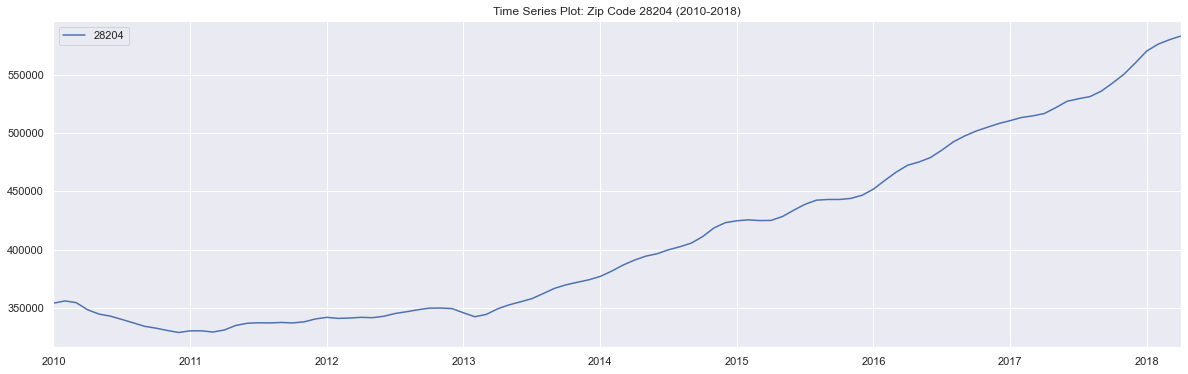

In [115]:
series_2010['28204'].plot(figsize=(18,6), legend='best')
plt.title('Time Series Plot: Zip Code 28204 (2010-2018)')

In [116]:
series_28204_2010 = series_2010['28204']

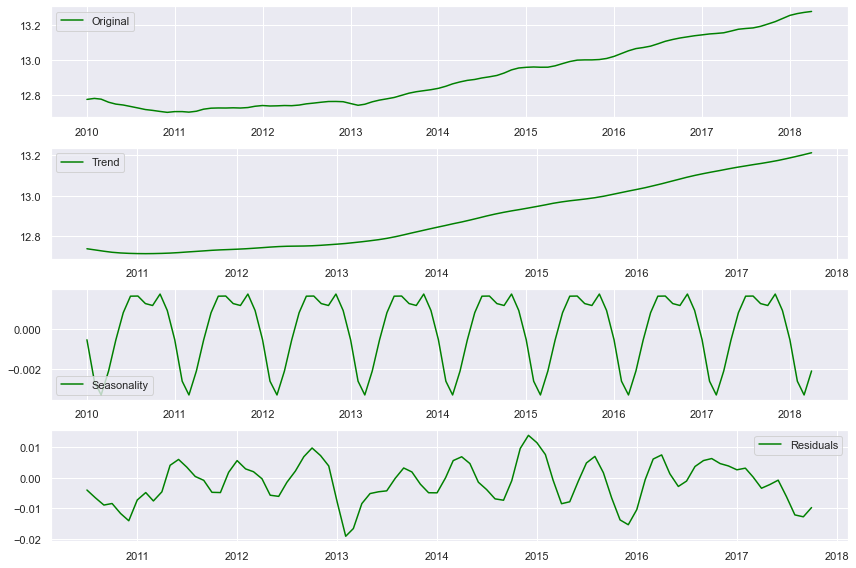

In [117]:
decom_2 = seasonal_decompose(np.log(series_28204_2010), model='additive')

# Actualize trend, seasonality, and residuals variables
trend2 = decom_2.trend
seasonal2 = decom_2.seasonal
residual2 = decom_2.resid

# Plotting the statistical results
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(series_28204_2010), label='Original', color='green')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend', color='green')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals', color='green')
plt.legend(loc='best')
plt.tight_layout()

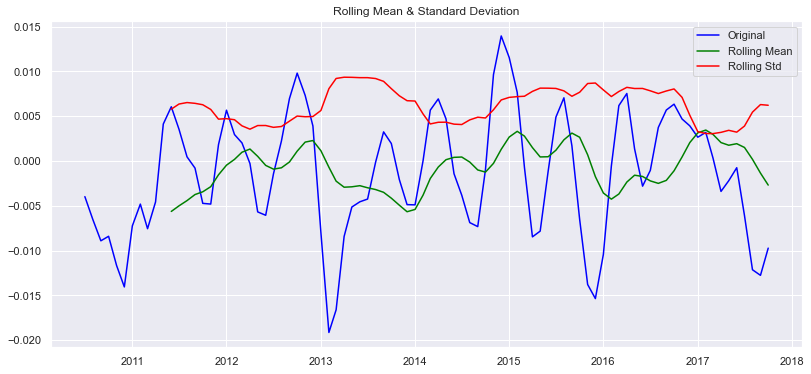

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                 -3.701796
p-value                         0.004088
# of Lags Used                 10.000000
Number of Observations Used    77.000000
The Critical Value (1%)        -3.518281
The Critical Value (5%)        -2.899878
The Critical Value (10%)       -2.587223
dtype: float64
---------------------------------


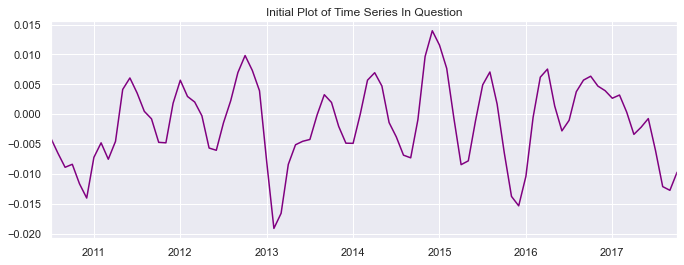

In [118]:
series_resid_2010 = residual2
series_resid_2010.dropna(inplace=True)

stationarity_checker(series_resid_2010)

In [128]:
# Checking for stationarity with 1 difference (since the seasonal decompose shows pretty stable rolling mean and std)
series_28204_2010_diff = series_28204_2010.diff(periods=1)
series_28204_2010.head(10)

2010-01-01    353900.0
2010-02-01    355900.0
2010-03-01    354400.0
2010-04-01    348300.0
2010-05-01    344600.0
2010-06-01    342800.0
2010-07-01    340000.0
2010-08-01    337100.0
2010-09-01    334100.0
2010-10-01    332500.0
Name: 28204, dtype: float64

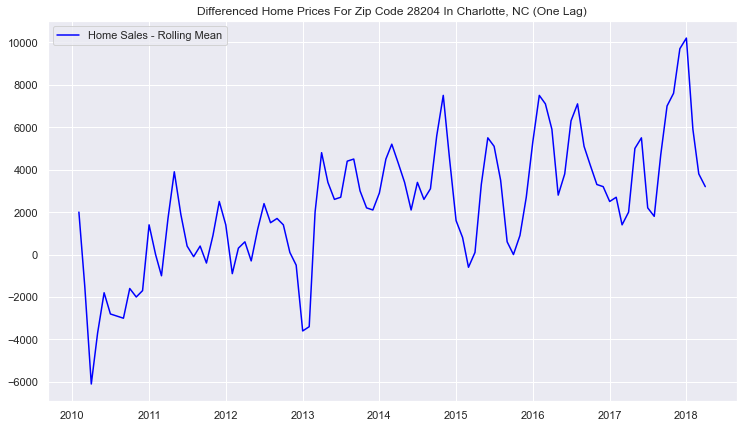

In [129]:
# Plotting the differenced series to check for Stationarity
fig = plt.figure(figsize=(11,7))
plt.plot(series_28204_2010_diff, color='blue',label='Home Sales - Rolling Mean')
plt.legend(loc='best')
plt.title('Differenced Home Prices For Zip Code 28204 In Charlotte, NC (One Lag)')
plt.show(block=False)

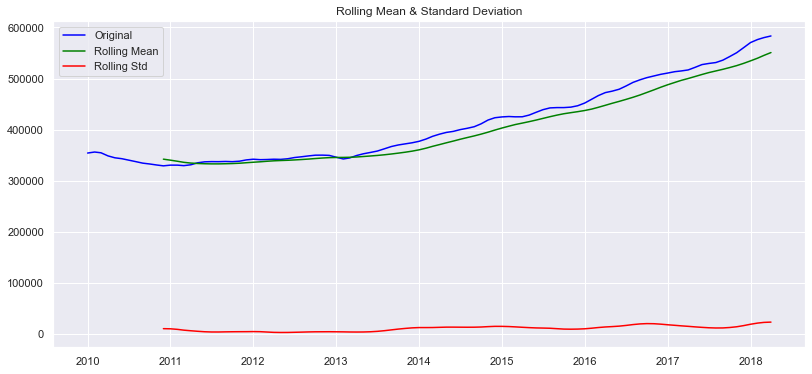

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  2.605580
p-value                         0.999076
# of Lags Used                 11.000000
Number of Observations Used    88.000000
The Critical Value (1%)        -3.506944
The Critical Value (5%)        -2.894990
The Critical Value (10%)       -2.584615
dtype: float64
---------------------------------


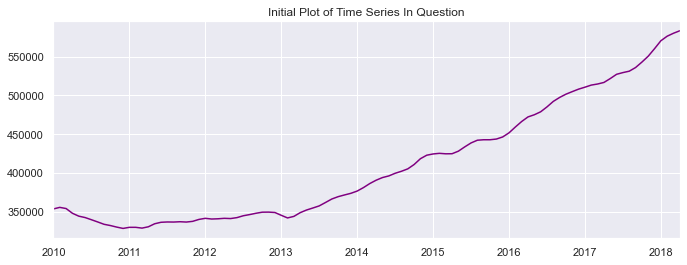

In [131]:
stationarity_checker(series_28204_2010)

          resid     resid
resid  1.000000  0.528295
resid  0.528295  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


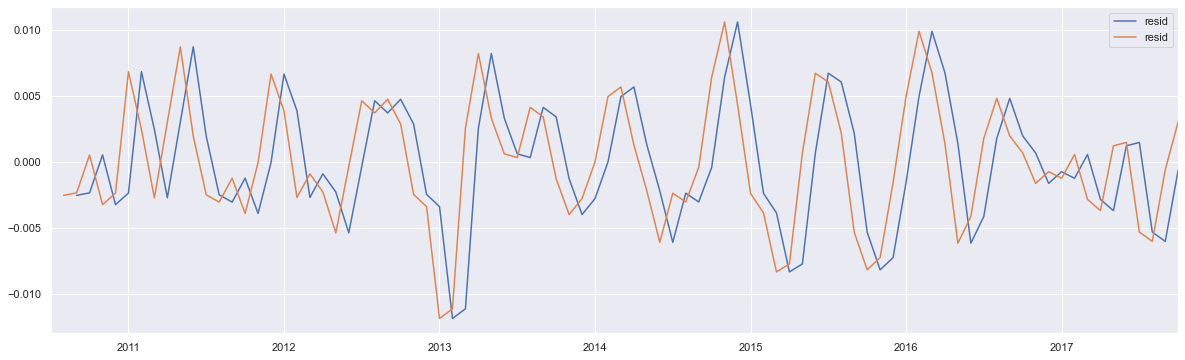

In [121]:
acorr(series_28204_2010_diff,1)

          resid     resid
resid  1.000000 -0.171187
resid -0.171187  1.000000
AxesSubplot(0.08,0.125;0.87x0.755)


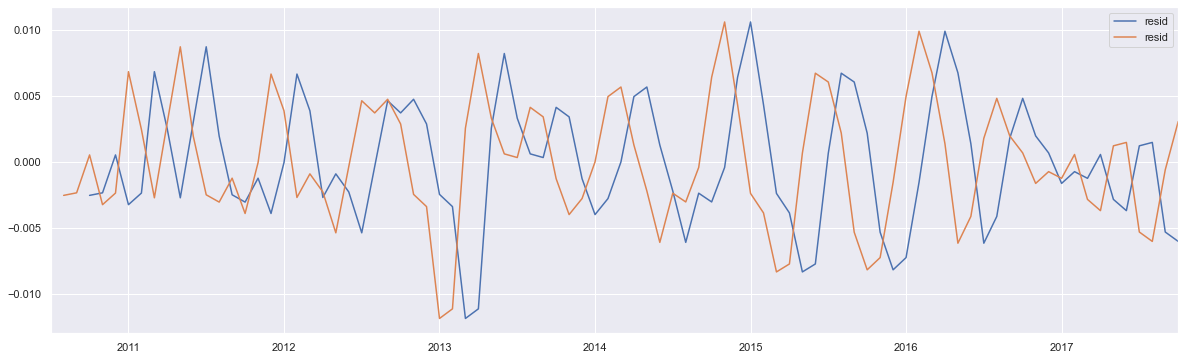

In [122]:
acorr(series_28204_2010_diff,2)

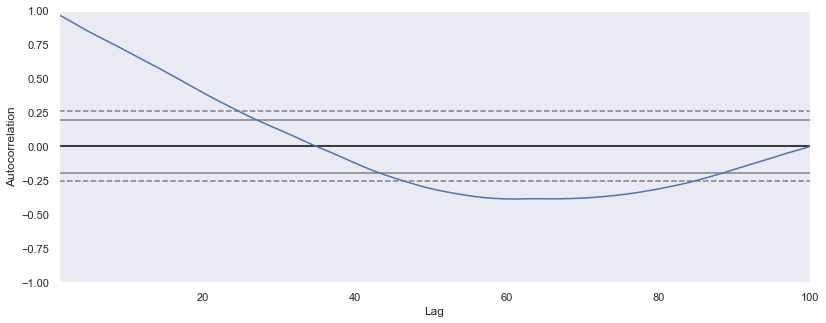

In [123]:
# Employing the Auto-Correlation function on the Seasonal portion of the Series
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(series_28204_2010);

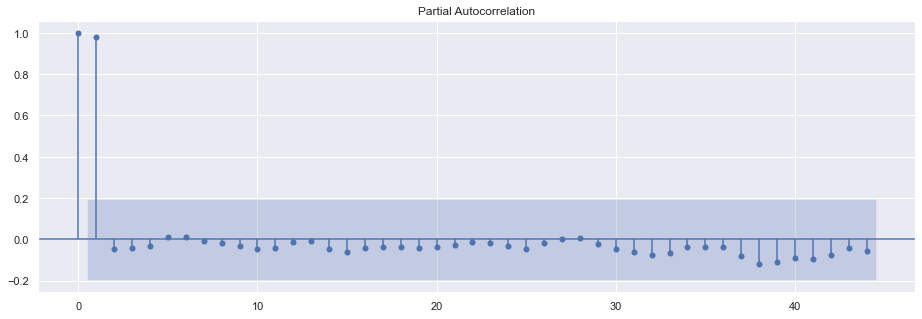

In [132]:
# Partial autocorrelation
rcParams['figure.figsize'] = 14, 5

plot_pacf(series_28204_2010, lags=44);

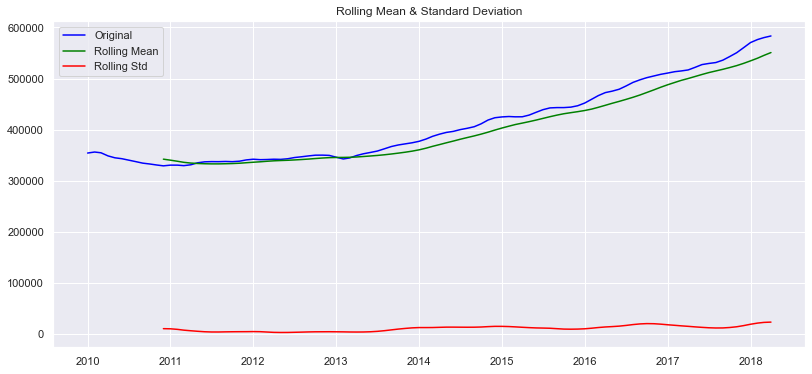

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  2.605580
p-value                         0.999076
# of Lags Used                 11.000000
Number of Observations Used    88.000000
The Critical Value (1%)        -3.506944
The Critical Value (5%)        -2.894990
The Critical Value (10%)       -2.584615
dtype: float64
---------------------------------


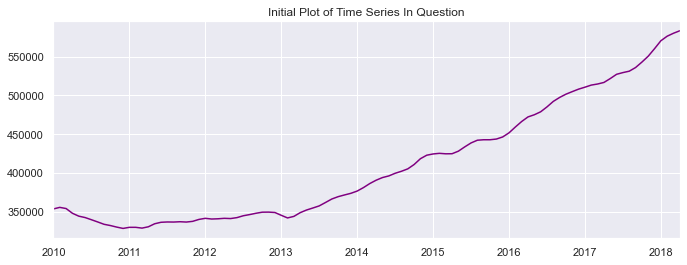

In [133]:
stationarity_checker(series_28204_2010)

In [134]:
# Taking one difference on the Series 
series_28204_2010_1diff = series_28204_2010.diff(periods=1)
series_28204_2010_1diff.head(10)

2010-01-01       NaN
2010-02-01    2000.0
2010-03-01   -1500.0
2010-04-01   -6100.0
2010-05-01   -3700.0
2010-06-01   -1800.0
2010-07-01   -2800.0
2010-08-01   -2900.0
2010-09-01   -3000.0
2010-10-01   -1600.0
Name: 28204, dtype: float64

In [135]:
# Dickey - Full
series_28204_2010_1diff_df_test = adfuller(series_28204_2010_1diff[1:])

series_28204_2010_1diff_df_results = pd.Series(series_28204_2010_1diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_1diff_df_test[4].items():
    series_28204_2010_1diff_df_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_1diff_df_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.917586
p-value                         0.323834
#Lags Used                     12.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


In [136]:
# Taking one difference on the Series 
series_28204_2010_3diff = series_28204_2010.diff(periods=3)
series_28204_2010_3diff.head(10)

2010-01-01        NaN
2010-02-01        NaN
2010-03-01        NaN
2010-04-01    -5600.0
2010-05-01   -11300.0
2010-06-01   -11600.0
2010-07-01    -8300.0
2010-08-01    -7500.0
2010-09-01    -8700.0
2010-10-01    -7500.0
Name: 28204, dtype: float64

In [137]:
# Dickey - Full
series_28204_2010_3diff_df_test = adfuller(series_28204_2010_3diff[3:])

series_28204_2010_3diff_results = pd.Series(series_28204_2010_3diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_3diff_df_test[4].items():
    series_28204_2010_3diff_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_3diff_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.474440
p-value                         0.546116
#Lags Used                     11.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [138]:
# Taking one difference on the Series - 5
series_28204_2010_5diff = series_28204_2010.diff(periods=5)
series_28204_2010_5diff.head(10)

2010-01-01        NaN
2010-02-01        NaN
2010-03-01        NaN
2010-04-01        NaN
2010-05-01        NaN
2010-06-01   -11100.0
2010-07-01   -15900.0
2010-08-01   -17300.0
2010-09-01   -14200.0
2010-10-01   -12100.0
Name: 28204, dtype: float64

In [139]:
# Dickey - Full
series_28204_2010_5diff_df_test = adfuller(series_28204_2010_5diff[5:])

series_28204_2010_5diff_results = pd.Series(series_28204_2010_5diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_5diff_df_test[4].items():
    series_28204_2010_5diff_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_5diff_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.741271
p-value                         0.409983
#Lags Used                      9.000000
Number of Observations Used    85.000000
Critical Value (1%)            -3.509736
Critical Value (5%)            -2.896195
Critical Value (10%)           -2.585258
dtype: float64


In [140]:
# Taking one difference on the Series - 10
series_28204_2010_10diff = series_28204_2010.diff(periods=10)
series_28204_2010_10diff.head(10)

2010-01-01   NaN
2010-02-01   NaN
2010-03-01   NaN
2010-04-01   NaN
2010-05-01   NaN
2010-06-01   NaN
2010-07-01   NaN
2010-08-01   NaN
2010-09-01   NaN
2010-10-01   NaN
Name: 28204, dtype: float64

In [141]:
# Dickey - Full
series_28204_2010_10diff_df_test = adfuller(series_28204_2010_10diff[10:])

series_28204_2010_10diff_results = pd.Series(series_28204_2010_10diff_df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in series_28204_2010_10diff_df_test[4].items():
    series_28204_2010_10diff_results['Critical Value (%s)'%key] = value
    
print ('Results of Dickey-Fuller test: \n')
print ('-----------')
print(series_28204_2010_10diff_results)

Results of Dickey-Fuller test: 

-----------
Test Statistic                 -1.378092
p-value                         0.592733
#Lags Used                     12.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


In [142]:
series_topzip_log = np.log(series_28204_2010)

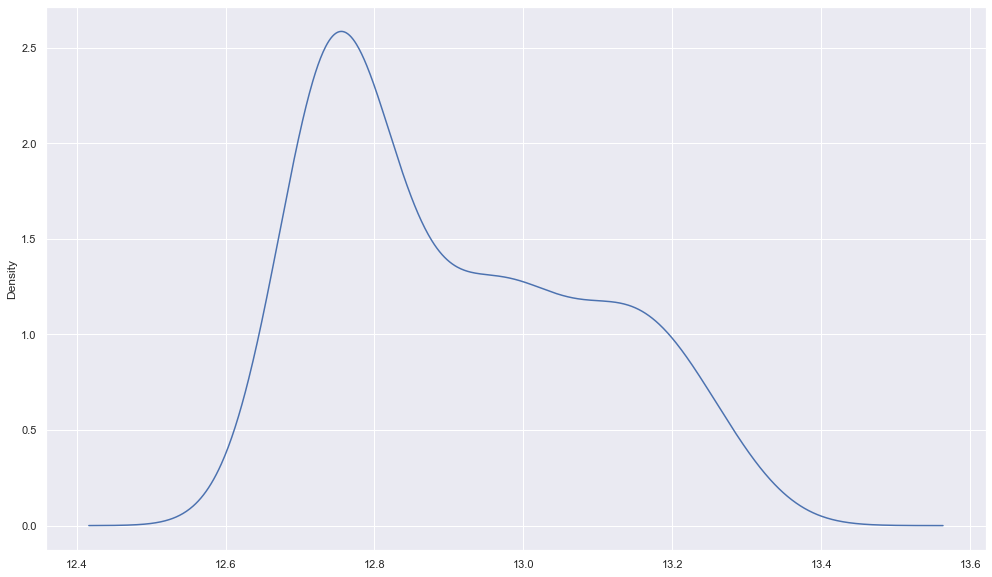

In [143]:
series_topzip_log.plot(kind='kde', figsize = (15,10));

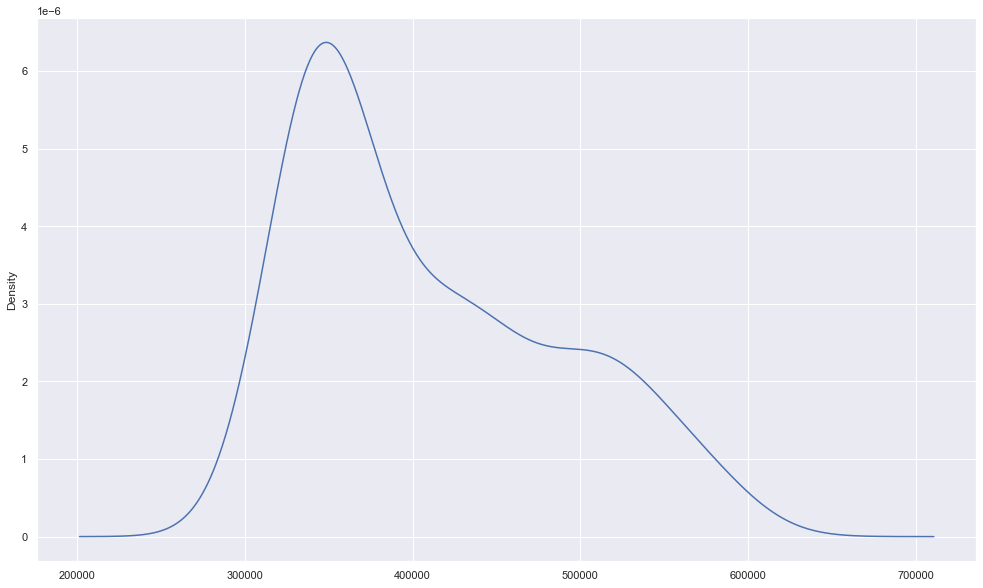

In [144]:
series_28204_2010.plot(kind='kde', figsize = (15,10));

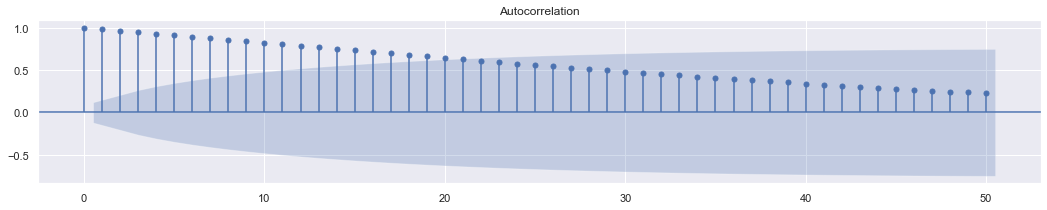

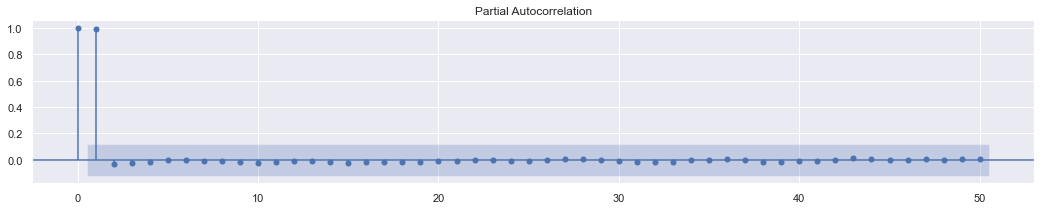

In [145]:
# Plotting ACF + PACF 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(top_zip_series, ax=ax, lags=50);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(top_zip_series, ax=ax, lags=50);

Exporting Files In Case They're Needed
--
Exporting these files just in case I need them.

In [136]:
series_28204_2010.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\series_28204_2010.csv', index = False)

In [137]:
top_zip_series.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\top_zip_series.csv', index = False)

In [138]:
top_21_series.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\top_21_series.csv', index = False)

In [139]:
series_2010.to_csv(r'C:\Users\samsung\data-science-journey\Course Materials\bddl\time_series_home_prices\series_2010.csv', index = False)

---

Modeling: SARIMAX
--
With train-test splits for the shorter Series

In [146]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [147]:
# Now running the shorter time series (including from 2010-2018) with test set (2018) removed
series1 = series_28204_2010['2010-04-01':'2017-03-01']
series1

2010-04-01    348300.0
2010-05-01    344600.0
2010-06-01    342800.0
2010-07-01    340000.0
2010-08-01    337100.0
                ...   
2016-11-01    505000.0
2016-12-01    508200.0
2017-01-01    510700.0
2017-02-01    513400.0
2017-03-01    514800.0
Name: 28204, Length: 84, dtype: float64

In [149]:
aic_scores = []
ns_terms = []
s_terms = []


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            aic_scores.append(results.aic)
            ns_terms.append(param)
            s_terms.append(param_seasonal)
        
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2376.976733356033
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1999.5827215184515
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1682.9497775389932
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1410.2558831587971
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1612.9210650383397
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1570.665805353733
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1350.9878691342528
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1327.9593880247876
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2292.0362812539756
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1947.1301754420585
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1691.3298746820115
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2154.9328461758237
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1995.0013983651916
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2066.9948435097886
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1383.7345391190624
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1362.2114323583764
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1564.268540148824
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1335.150315477

In [150]:
aic_index = aic_scores.index(min(aic_scores))
min(aic_scores)

1032.002850705875

In [151]:
ns_terms[aic_index]

(1, 1, 1)

In [152]:
s_terms[aic_index]

(0, 1, 1, 12)

In [153]:
mod = sm.tsa.statespace.SARIMAX(series1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6146      0.135      4.548      0.000       0.350       0.880
ma.L1          0.6345      0.134      4.720      0.000       0.371       0.898
ma.S.L12      -0.0273      0.042     -0.647      0.517      -0.110       0.055
sigma2      4.111e+06   1.18e+06      3.470      0.001    1.79e+06    6.43e+06


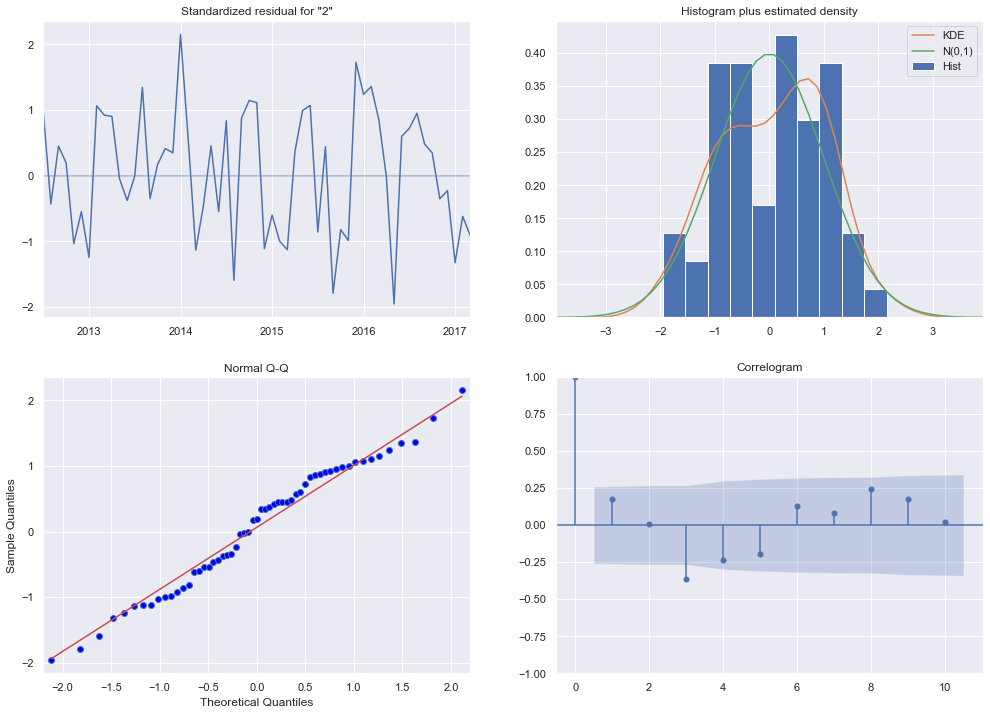

In [154]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Series 1996-2018
--

In [155]:
# Now running the full time series (including from 1996-2018)
series2 = top_zip_series
series2

1996-04-01    153100.0
1996-05-01    153200.0
1996-06-01    153400.0
1996-07-01    153500.0
1996-08-01    153700.0
                ...   
2017-12-01    560300.0
2018-01-01    570500.0
2018-02-01    576400.0
2018-03-01    580200.0
2018-04-01    583400.0
Name: 28204, Length: 265, dtype: float64

In [156]:
aic_scores_mod2_list = []
params2_list = []
seas_params2_list = []

for param2 in pdq:
    for param_seasonal2 in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(series2,
                                            order=param2,
                                            seasonal_order=param_seasonal2,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results2 = mod2.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param2, param_seasonal2, results2.aic))
            aic_scores_mod2_list.append(results2.aic)
            params2_list.append(param2)
            seas_params2_list.append(param_seasonal2)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7484.146673636384
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6991.1848581238355
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5942.374139480978
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5669.016677775853
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5861.684910508812
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5807.2950076185925
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5508.766073310061
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7208.984469011708
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7265.320752515131
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7258.551100172991
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5951.808786245938
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8026.060306957823
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7387.587944340341
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6873.399271025764
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5475.894889922207
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7270.781199736346
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4980.086862365197
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4728.678410516746
ARIMA(0,

In [157]:
mod2 = sm.tsa.statespace.SARIMAX(series2,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod2.fit()

print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6708      0.058     11.658      0.000       0.558       0.784
ma.L1          0.6382      0.044     14.465      0.000       0.552       0.725
ma.S.L12      -0.2370      0.036     -6.640      0.000      -0.307      -0.167
sigma2      2.379e+06   2.56e+05      9.297      0.000    1.88e+06    2.88e+06


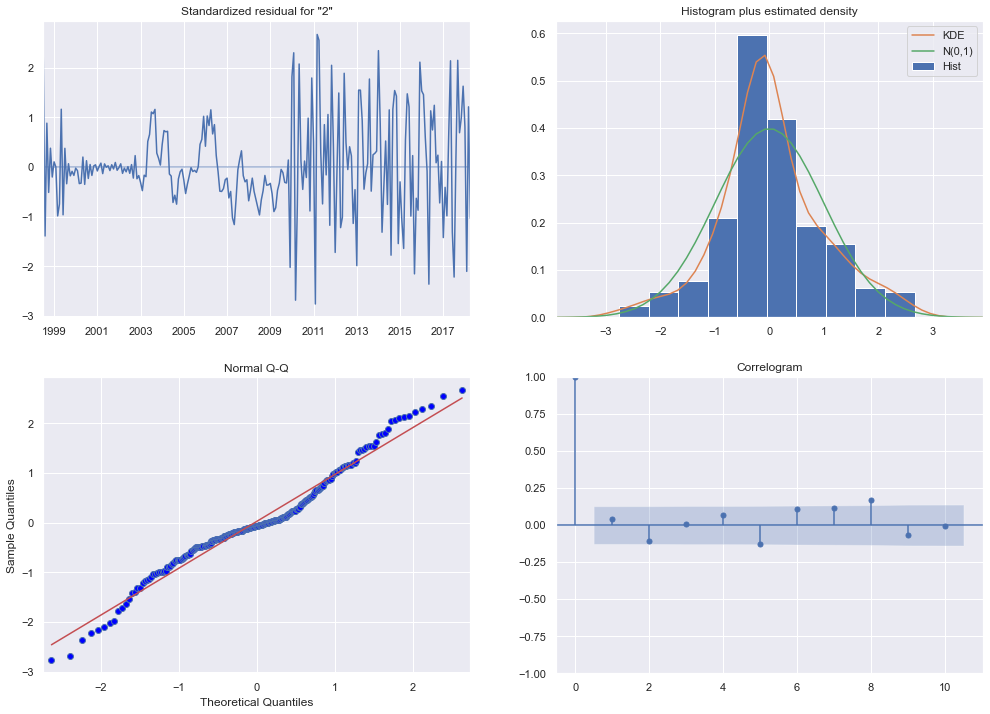

In [158]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

ARIMA: A Better Fit For 2010-2018 Series Data
--

The lowest AIC score for 2010-2018 Series Data is ~1032 while the lowest AIC score for the complete Series is ~4151, showing us that the 2010-2018 Series can be handled better with ARIMA than that of the complete Series data.

However, what is also interested is that both Series's best AIC scores corresponded with the same Terms.

---

Comparing The AIC Scores From Full Series Zip Codes With Their 2010-2018 Counterparts As A Basis For Making Some Decisions
--
Now, what I'd like to do is compare other zip codes in the same way I just did above. 

This will also help me to understand which zip code to proceed further with (whichever one has the lowest AIC) in order to do initial train-test split for prediction and forecasting.

But as well, I'd like to investigate whether the shortened Series consistently has a lower AIC score, and I'd also like to know if the ARIMA terms are the same for both Series as they are for the first zip code I've evaluated (28204).

If this ends up being the case, then I would see this as a solid basis for focusing on a particular zip code according to its AIC score for the shortened Series, instead of being based on Historical ROI.

In [159]:
#Creating function for comparing full-length and shortened Series

def comparing_series(series1,series2):
    
    aic_scores = []
    ns_terms = []
    s_terms = []
    
    #for series1
    for param in pdq:
        
        winning_aic_index = None
        winning_ns_terms = None
        winning_s_terms = None
        
        for param_seasonal in seasonal_pdq:
            try:
                mod_1a = sm.tsa.statespace.SARIMAX(series1,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod_1a.fit()
                aic_scores.append(results.aic)
                ns_terms.append(param)
                s_terms.append(param_seasonal)
                
                winning_aic_index = aic_scores.index(min(aic_scores))
                winning_ns_terms = ns_terms[winning_aic_index]
                winning_s_terms = s_terms[winning_aic_index]
                

                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            
            except:
                continue
    
    
    
    for i in winning_ns_terms:
        for j in winning_s_terms:
            mod_1b = sm.tsa.statespace.SARIMAX(series1,
                                order=(winning_ns_terms[0], winning_ns_terms[1], winning_ns_terms[2]),
                                seasonal_order=(winning_s_terms[0], winning_s_terms[1], winning_s_terms[2], winning_s_terms[3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

            results_1b = mod_1b.fit()
            
    
    # Separating line between the two Series -- above Series is for 2010-2018; below Series is for 1996-2018
    
    
    # For series2    
    aic_scores2 = []
    ns_terms2 = []
    s_terms2 = []
    
    #for series1
    for param2 in pdq:
        
        winning_aic_index2 = None
        winning_ns_terms2 = None
        winning_s_terms2 = None
        
        for param_seasonal2 in seasonal_pdq:
            try:
                mod_2a = sm.tsa.statespace.SARIMAX(series2,
                                                order=param2,
                                                seasonal_order=param_seasonal2,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results2 = mod_2a.fit()
                aic_scores2.append(results2.aic)
                ns_terms2.append(param2)
                s_terms2.append(param_seasonal2)
                
                winning_aic_index2 = aic_scores2.index(min(aic_scores2))
                winning_ns_terms2 = ns_terms2[winning_aic_index2]
                winning_s_terms2 = s_terms2[winning_aic_index2]
                

                #print('ARIMA{}x{}12 - AIC:{}'.format(param2, param_seasonal2, results2.aic))
            
            
            except:
                continue
    
    
    
    for i in winning_ns_terms2:
        for j in winning_s_terms2:
            mod_2b = sm.tsa.statespace.SARIMAX(series2,
                                order=(winning_ns_terms2[0], winning_ns_terms2[1], winning_ns_terms2[2]),
                                seasonal_order=(winning_s_terms2[0], winning_s_terms2[1], winning_s_terms2[2], winning_s_terms2[3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

            results_2b = mod_2b.fit()
            
            
            
            

    print('FOR SERIES -- 2010- (end)2017')        
    print('**********')
    print(f'The winner is: an AIC of {min(aic_scores)} with {winning_ns_terms} for order terms and {winning_s_terms} for seasonal parameters')
    print('----------')
    print(results_1b.summary())
    print(results_1b.plot_diagnostics(figsize=(15, 12)))
    plt.show()
    print('                                   ')
    print('                                   ')
    print('                                   ')
    print('FOR SERIES -- 1996-2018')        
    print('**********')
    print(f'The winner is: an AIC of {min(aic_scores2)} with {winning_ns_terms2} for order terms and {winning_s_terms2} for seasonal parameters')
    print('----------')
    print(results_2b.summary())
    print(results_2b.plot_diagnostics(figsize=(15, 12)))
    plt.show()
    print('                                   ')
    print('                                   ')
    print('                                   ')
    print(f'The AIC score for the full Series is {min(aic_scores2)} and the score is {min(aic_scores)} for the 2010-2018 Series')

FOR SERIES -- 2010- (end)2017
**********
The winner is: an AIC of 1032.002850705875 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28204   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -512.001
Date:                            Sat, 06 Mar 2021   AIC                           1032.003
Time:                                    11:15:14   BIC                           1040.175
Sample:                                04-01-2010   HQIC                          1035.179
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

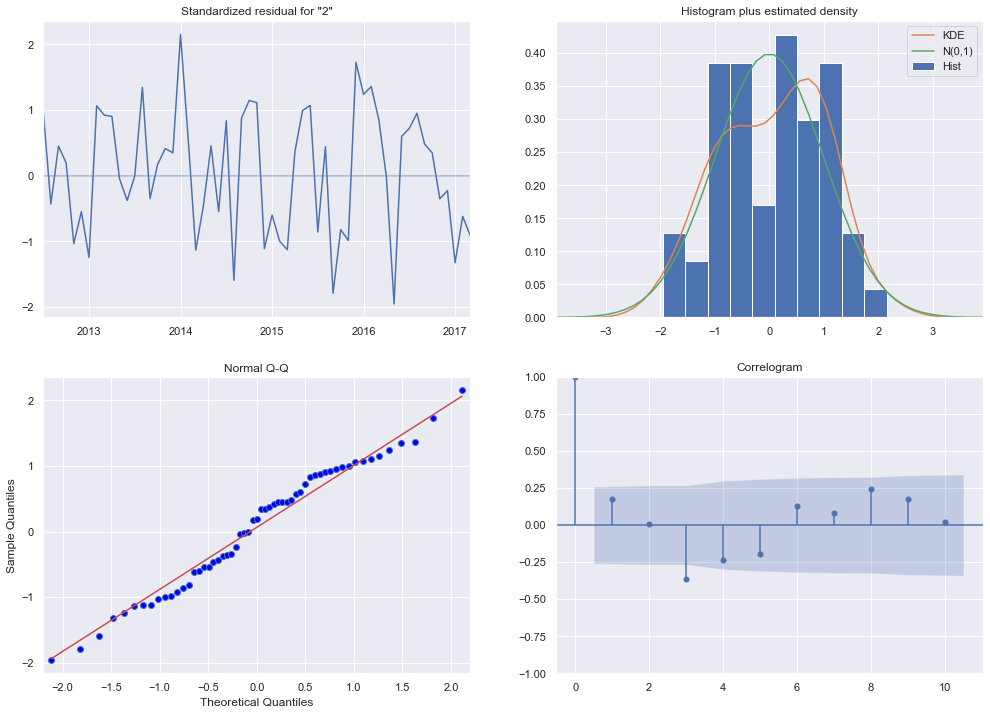

                                   
                                   
                                   
FOR SERIES -- 1996-2018
**********
The winner is: an AIC of 4151.097075953034 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28204   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2071.549
Date:                            Sat, 06 Mar 2021   AIC                           4151.097
Time:                                    11:15:16   BIC                           4164.986
Sample:                                04-01-1996   HQIC                          4156.695
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
  

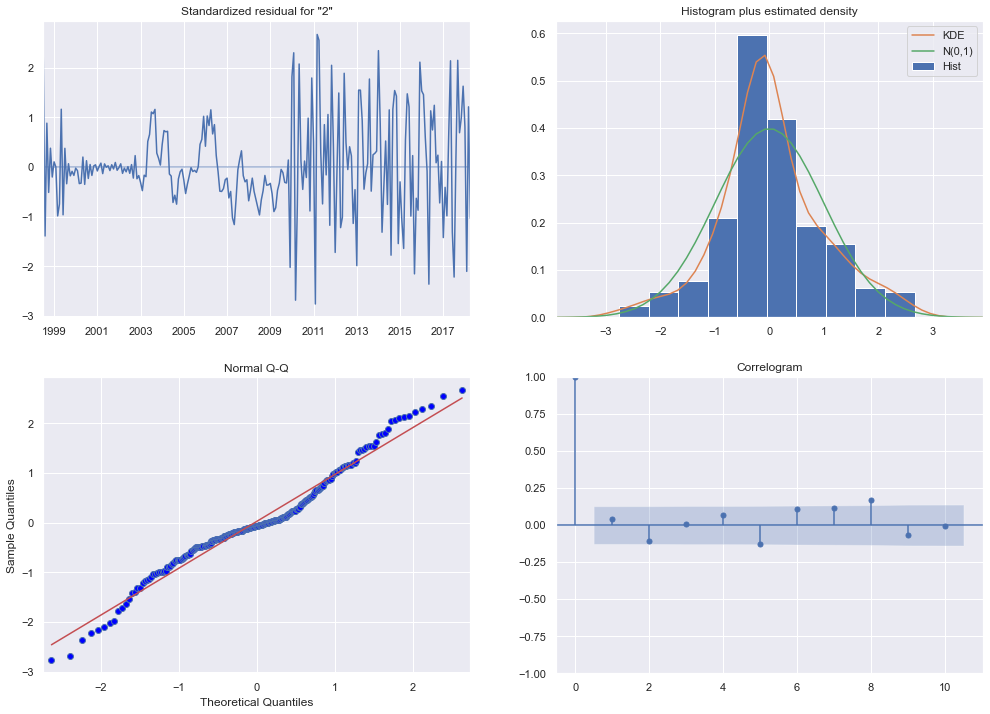

                                   
                                   
                                   
The AIC score for the full Series is 4151.097075953034 and the score is 1032.002850705875 for the 2010-2018 Series


In [153]:
comparing_series(series1,series2)

Preparing To Evaluate Other Zip Codes In The Top 20
--
Now, I'm ready to evaluate a few other zip codes. I'll investigate the AIC scores for the following zip codes:

- Zip with the second-highest HROI
- Zip with the third-highest HROI
- Zip with the median HROI
- Zip with the lowest HROI

I'll compare each of these zip codes' full Series lowest AIC with its 2010-2018 lowest AIC. Each zip code will need to pass the <b>stationarity_checker</b> test. If it doesn't, I'll do a <b>seasonal_decompose</b> to check for similarity with the initial zip code (28204). Seasonality must be clearly present to justify using SARIMAX.

Here, I'll also separate the shorter Series into a <b>train-test split.</b>

In [161]:
# Getting the three Series needed in the same place -- full, train & test

# Series from 1996-208 (top 21 zips) -- is for 22 years 
full_s = top_21_series[:'2018-03-01']

# Series from 2010-2018 (top 21 zips - train Series) -- is for 7 years
shorter_s = series_2010['2010-04-01':'2017-03-01']

# Series from 2017-2018 (top 21 zips - test Series) -- dropping last month so this variable is for one year
test_s = series_2010['2017-04-01':'2018-03-01']

In [162]:
full_s

28054     28056     28012     28120     28034     28164  \
1996-04-01   70300.0   84900.0   82200.0   83700.0   63300.0   73700.0   
1996-05-01   70600.0   85200.0   82600.0   84000.0   63500.0   73200.0   
1996-06-01   71000.0   85600.0   83100.0   84400.0   63700.0   72700.0   
1996-07-01   71400.0   86000.0   83700.0   84900.0   63900.0   72400.0   
1996-08-01   71800.0   86500.0   84200.0   85500.0   64200.0   72200.0   
...              ...       ...       ...       ...       ...       ...   
2017-11-01  133500.0  170100.0  180800.0  167000.0  123900.0  176800.0   
2017-12-01  134400.0  171100.0  180500.0  168200.0  125100.0  177800.0   
2018-01-01  135900.0  171900.0  180300.0  169000.0  126100.0  178300.0   
2018-02-01  137600.0  172300.0  181400.0  170000.0  126900.0  178800.0   
2018-03-01  139400.0  173400.0  184100.0  172100.0  127700.0  180900.0   

               28098     28032     28205     28210  ...     28211     28270  \
1996-04-01   63500.0   61200.0   73700.0  135000.0  ...  179000.0  185700.0   
1996-05-01   63800.0   61800.0   74200.0  135200.0  ...  179600.0  186300.0   
1996-06-01   64100.0   62400.0   74800.0  135400.0  ...  180200.0  186800.0   
1996-07-01   64500.0   63000.0   75400.0  135600.0  ...  181000.0  187300.0   
1996-08-01   65000.0   63600.0   76000.0  135700.0  ...  181900.0  187600.0   
...              ...       ...       ...       ...  ...       ...       ...   
2017-11-01  128700.0  127700.0  241800.0  354600.0  ...  462500.0  367600.0   
2017-12-01  129400.0  127900.0  247100.0  356200.0  ...  466800.0  370000.0   
2018-01-01  130200.0  128000.0  251500.0  357400.0  ...  469900.0  372300.0   
2018-02-01  131100.0  128400.0  256300.0  359100.0  ...  474800.0  374800.0   
2018-03-01  132200.0  129700.0  262000.0  362200.0  ...  482600.0  377700.0   

               28209     28203     28202     28036     28204      28207  \
1996-04-01  122600.0  162500.0  120600.0  179200.0  153100.0   406100.0   
1996-05-01  123200.0  162900.0  121800.0  180700.0  153200.0   408700.0   
1996-06-01  123700.0  163300.0  122900.0  182000.0  153400.0   411200.0   
1996-07-01  124300.0  163700.0  124100.0  183100.0  153500.0   413700.0   
1996-08-01  125000.0  164000.0  125100.0  184000.0  153700.0   415900.0   
...              ...       ...       ...       ...       ...        ...   
2017-11-01  401800.0  577200.0  363100.0  391400.0  550600.0  1205900.0   
2017-12-01  404400.0  584300.0  364200.0  390600.0  560300.0  1216100.0   
2018-01-01  405600.0  588900.0  366100.0  390700.0  570500.0  1225200.0   
2018-02-01  407300.0  595500.0  368000.0  393400.0  576400.0  1230900.0   
2018-03-01  411600.0  605400.0  370300.0  397900.0  580200.0  1235400.0   

               28081     28124  
1996-04-01   61900.0   71600.0  
1996-05-01   62300.0   71700.0  
1996-06-01   62600.0   71700.0  
1996-07-01   62900.0   71600.0  
1996-08-01   63100.0   71600.0  
...              ...       ...  
2017-11-01  124700.0  140900.0  
2017-12-01  125600.0  140900.0  
2018-01-01  125700.0  141100.0  
2018-02-01  125800.0  143300.0  
2018-03-01  126700.0  147900.0  

[264 rows x 21 columns]

In [163]:
shorter_s

28054     28056     28012     28120     28034     28164  \
2010-04-01  105800.0  137800.0  138200.0  134100.0  100600.0  141300.0   
2010-05-01  104700.0  138000.0  137600.0  134100.0   99000.0  141400.0   
2010-06-01  104200.0  138400.0  136900.0  134100.0   97900.0  141800.0   
2010-07-01  103900.0  138800.0  136700.0  134400.0   97300.0  142000.0   
2010-08-01  103300.0  138800.0  136500.0  134600.0   96700.0  141600.0   
...              ...       ...       ...       ...       ...       ...   
2016-11-01  121200.0  160100.0  163200.0  153100.0  110400.0  166600.0   
2016-12-01  121800.0  161100.0  164900.0  154700.0  112400.0  167600.0   
2017-01-01  122000.0  161800.0  165800.0  155800.0  114100.0  168200.0   
2017-02-01  122700.0  162600.0  166600.0  156400.0  115300.0  168800.0   
2017-03-01  123800.0  163600.0  167500.0  157100.0  116200.0  169200.0   

               28098     28032     28205     28210  ...     28211     28270  \
2010-04-01  100400.0   99100.0  139400.0  240400.0  ...  323800.0  269700.0   
2010-05-01  100700.0   98700.0  138700.0  239700.0  ...  319500.0  269100.0   
2010-06-01  100100.0   99500.0  138800.0  240800.0  ...  318100.0  269500.0   
2010-07-01  100300.0  101000.0  138100.0  241200.0  ...  316300.0  269200.0   
2010-08-01  100700.0  102200.0  136200.0  240200.0  ...  314900.0  267800.0   
...              ...       ...       ...       ...  ...       ...       ...   
2016-11-01  118200.0  115600.0  191800.0  322900.0  ...  453700.0  345600.0   
2016-12-01  118600.0  115900.0  194500.0  325400.0  ...  453900.0  347200.0   
2017-01-01  118800.0  116700.0  197600.0  328100.0  ...  454500.0  348700.0   
2017-02-01  119400.0  117800.0  200700.0  330900.0  ...  455400.0  349700.0   
2017-03-01  120100.0  118800.0  203600.0  333000.0  ...  454400.0  350100.0   

               28209     28203     28202     28036     28204      28207  \
2010-04-01  254400.0  387100.0  279100.0  321600.0  348300.0   887300.0   
2010-05-01  253100.0  387100.0  275700.0  321800.0  344600.0   880700.0   
2010-06-01  251900.0  386700.0  275200.0  321700.0  342800.0   878300.0   
2010-07-01  251000.0  385700.0  272600.0  321500.0  340000.0   873100.0   
2010-08-01  248800.0  384300.0  269400.0  320500.0  337100.0   864300.0   
...              ...       ...       ...       ...       ...        ...   
2016-11-01  371700.0  515500.0  349200.0  386300.0  505000.0  1105300.0   
2016-12-01  375400.0  519000.0  353000.0  390000.0  508200.0  1113600.0   
2017-01-01  378700.0  522500.0  354500.0  392700.0  510700.0  1121700.0   
2017-02-01  381500.0  525100.0  355100.0  392900.0  513400.0  1130400.0   
2017-03-01  382800.0  525100.0  355500.0  393200.0  514800.0  1136600.0   

               28081     28124  
2010-04-01  108700.0  132800.0  
2010-05-01  107800.0  133600.0  
2010-06-01  107700.0  132200.0  
2010-07-01  107300.0  129500.0  
2010-08-01  106500.0  126500.0  
...              ...       ...  
2016-11-01  106000.0  144800.0  
2016-12-01  107200.0  144300.0  
2017-01-01  109100.0  145700.0  
2017-02-01  110800.0  146100.0  
2017-03-01  111900.0  144300.0  

[84 rows x 21 columns]

In [164]:
test_s

28054     28056     28012     28120     28034     28164  \
2017-04-01  124900.0  164600.0  168700.0  158000.0  116800.0  169500.0   
2017-05-01  126200.0  164900.0  170000.0  159200.0  117200.0  170200.0   
2017-06-01  127700.0  165200.0  171800.0  160400.0  117800.0  170900.0   
2017-07-01  129200.0  166000.0  174000.0  161300.0  118500.0  171000.0   
2017-08-01  130500.0  167000.0  176300.0  162600.0  119400.0  171700.0   
2017-09-01  132100.0  168000.0  178800.0  164100.0  120900.0  173700.0   
2017-10-01  133100.0  169000.0  180500.0  165700.0  122400.0  175700.0   
2017-11-01  133500.0  170100.0  180800.0  167000.0  123900.0  176800.0   
2017-12-01  134400.0  171100.0  180500.0  168200.0  125100.0  177800.0   
2018-01-01  135900.0  171900.0  180300.0  169000.0  126100.0  178300.0   
2018-02-01  137600.0  172300.0  181400.0  170000.0  126900.0  178800.0   
2018-03-01  139400.0  173400.0  184100.0  172100.0  127700.0  180900.0   

               28098     28032     28205     28210  ...     28211     28270  \
2017-04-01  121200.0  120100.0  207500.0  335600.0  ...  454200.0  351600.0   
2017-05-01  122300.0  121400.0  212700.0  339100.0  ...  455900.0  354400.0   
2017-06-01  122700.0  122100.0  217900.0  342100.0  ...  456700.0  356500.0   
2017-07-01  123200.0  122600.0  222800.0  345000.0  ...  456400.0  358600.0   
2017-08-01  124500.0  124000.0  227100.0  348400.0  ...  456400.0  361000.0   
2017-09-01  126400.0  125900.0  231600.0  351700.0  ...  457100.0  363400.0   
2017-10-01  127900.0  127200.0  236500.0  353100.0  ...  459200.0  365400.0   
2017-11-01  128700.0  127700.0  241800.0  354600.0  ...  462500.0  367600.0   
2017-12-01  129400.0  127900.0  247100.0  356200.0  ...  466800.0  370000.0   
2018-01-01  130200.0  128000.0  251500.0  357400.0  ...  469900.0  372300.0   
2018-02-01  131100.0  128400.0  256300.0  359100.0  ...  474800.0  374800.0   
2018-03-01  132200.0  129700.0  262000.0  362200.0  ...  482600.0  377700.0   

               28209     28203     28202     28036     28204      28207  \
2017-04-01  383600.0  526900.0  355800.0  394500.0  516800.0  1142900.0   
2017-05-01  385800.0  534700.0  355600.0  395700.0  521800.0  1151300.0   
2017-06-01  388700.0  544300.0  354900.0  395800.0  527300.0  1159000.0   
2017-07-01  391900.0  551400.0  355500.0  396300.0  529500.0  1167700.0   
2017-08-01  395100.0  557700.0  357000.0  395800.0  531300.0  1177300.0   
2017-09-01  397200.0  564000.0  359400.0  394400.0  536000.0  1186700.0   
2017-10-01  399000.0  569800.0  361800.0  392700.0  543000.0  1195300.0   
2017-11-01  401800.0  577200.0  363100.0  391400.0  550600.0  1205900.0   
2017-12-01  404400.0  584300.0  364200.0  390600.0  560300.0  1216100.0   
2018-01-01  405600.0  588900.0  366100.0  390700.0  570500.0  1225200.0   
2018-02-01  407300.0  595500.0  368000.0  393400.0  576400.0  1230900.0   
2018-03-01  411600.0  605400.0  370300.0  397900.0  580200.0  1235400.0   

               28081     28124  
2017-04-01  112600.0  142500.0  
2017-05-01  113600.0  142300.0  
2017-06-01  115200.0  142500.0  
2017-07-01  117500.0  142100.0  
2017-08-01  119600.0  142000.0  
2017-09-01  121400.0  141400.0  
2017-10-01  123200.0  141100.0  
2017-11-01  124700.0  140900.0  
2017-12-01  125600.0  140900.0  
2018-01-01  125700.0  141100.0  
2018-02-01  125800.0  143300.0  
2018-03-01  126700.0  147900.0  

[12 rows x 21 columns]

The Zip Codes To Analyze:
--
These are the following zip codes I'll be checking:

- 28203 (#2 HROI)
- 28205 (#3 HROI)
- 28012 (median HROI)
- 28054 (lowest HROI from the top 21 list)

In [165]:
# Preparing the individual Series - full
series_28203_full = full_s['28203']
series_28205_full = full_s['28205']
series_28012_full = full_s['28012']
series_28054_full = full_s['28054']

In [166]:
# Preparing the individual Series - short
series_28203_shorter = shorter_s['28203']
series_28205_shorter = shorter_s['28205']
series_28012_shorter = shorter_s['28012']
series_28054_shorter = shorter_s['28054']

Check For Similarity To Zip Code 28204
--
I'll do a short eye test here to verify that the other four zip code Series have Seasonality as well as Linearity.

AxesSubplot(0.08,0.125;0.87x0.755)
AxesSubplot(0.08,0.125;0.87x0.755)
AxesSubplot(0.08,0.125;0.87x0.755)
AxesSubplot(0.08,0.125;0.87x0.755)


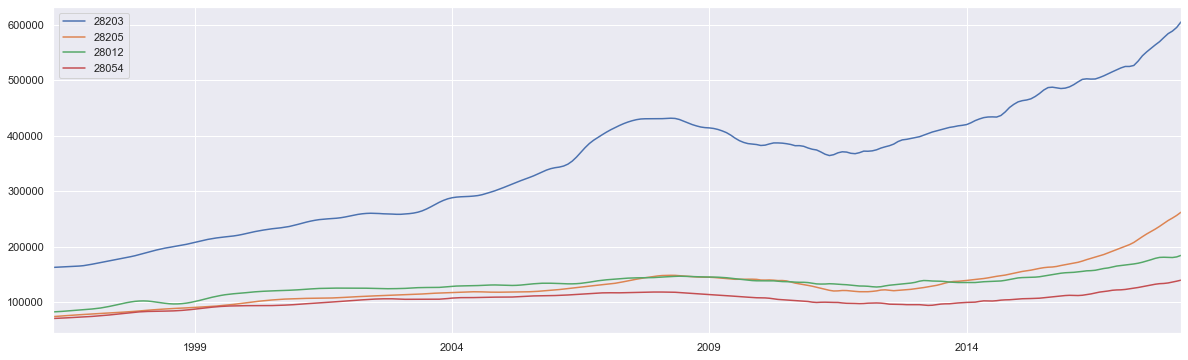

In [167]:
other_four_full = [series_28203_full, series_28205_full, series_28012_full, series_28054_full]
plots = [print(i.plot(figsize=(18,6), legend='best', subplots=False)) for i in other_four_full]

Slight To Significant Linearity Present
--
The plot above shows the other four zip codes have a similar linearity to 28204. Now, let's see if they have Seasonality in the way that 28204 does.

In [168]:
# Creating a function for Seasonal Decompose + Stationarity Check on the Residuals
# Just realizing here I did a seasonal decom using Log-transformed data which made my original Sea Com a multiplicative 
# model, and the Series doesn't require that type of decomposition. So, to correct this, I'll use this Sea Com function
# to first evaluate zip code 28204
# The good thing here is that my modeling was not done on the log-transformed data.
# However, it could be that I was unable to find a satisfactory # of lags to use while differencing because I was
# evaluating the residuals of the decomposed log-transformed Series.


def sd_sc(series):

    decom123 = seasonal_decompose(series, model='additive')

    # Actualize trend, seasonality, and residuals variables
    trend123 = decom123.trend
    seasonal123 = decom123.seasonal
    residual123 = decom123.resid

    # Plotting the statistical results
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(series, label='Original', color='green')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend123, label='Trend', color='black')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal123, label='Seasonality', color='red')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual123, label='Residuals', color='brown')
    plt.legend(loc='best')
    plt.tight_layout()


    series_residuals = residual123
    series_residuals.dropna(inplace=True)

    stationarity_checker(series_residuals)

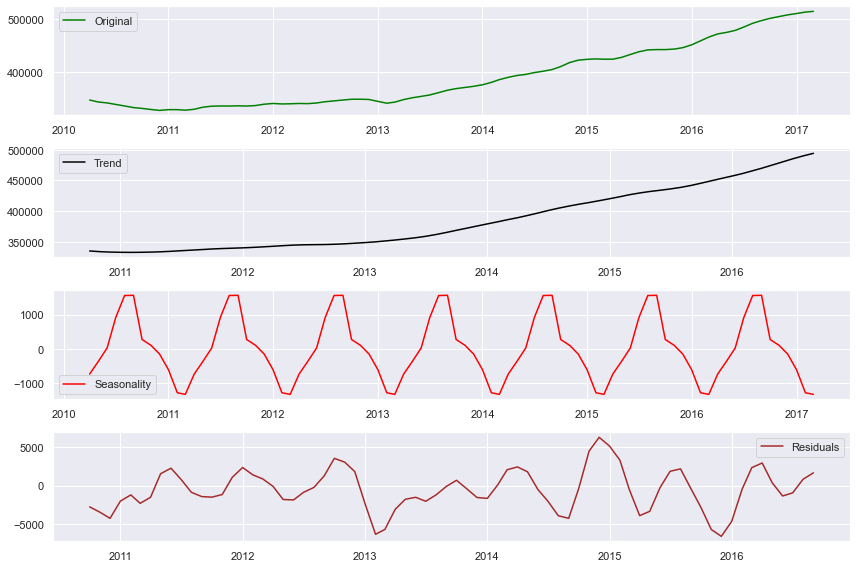

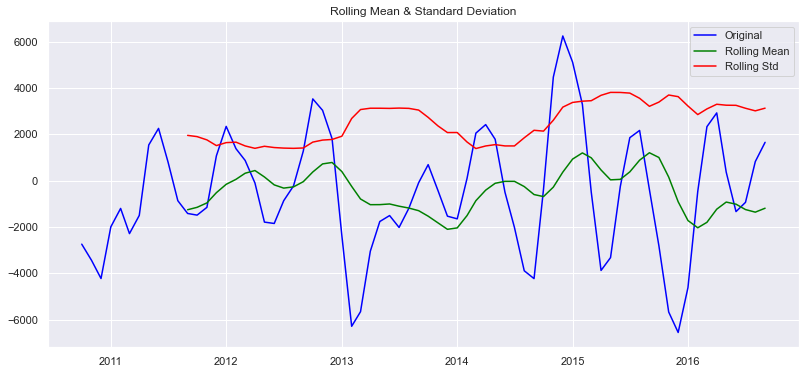

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                 -4.807612
p-value                         0.000053
# of Lags Used                  2.000000
Number of Observations Used    69.000000
The Critical Value (1%)        -3.528890
The Critical Value (5%)        -2.904440
The Critical Value (10%)       -2.589656
dtype: float64
---------------------------------


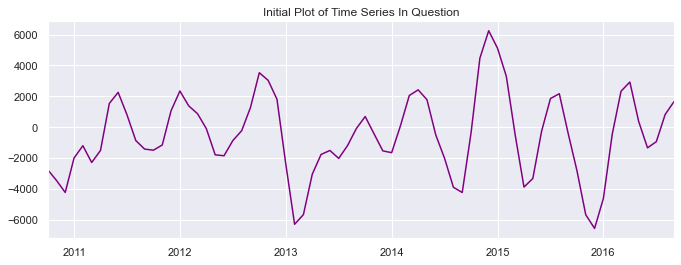

In [169]:
sd_sc(series1)

Residuals For (Non-Log-Transformed) Series Passes DF Test
--
Now, I'll run the other zip codes through seasonal decompose and stationarity checker.

### Full Series Evaluations:

#### 28203 - FULL

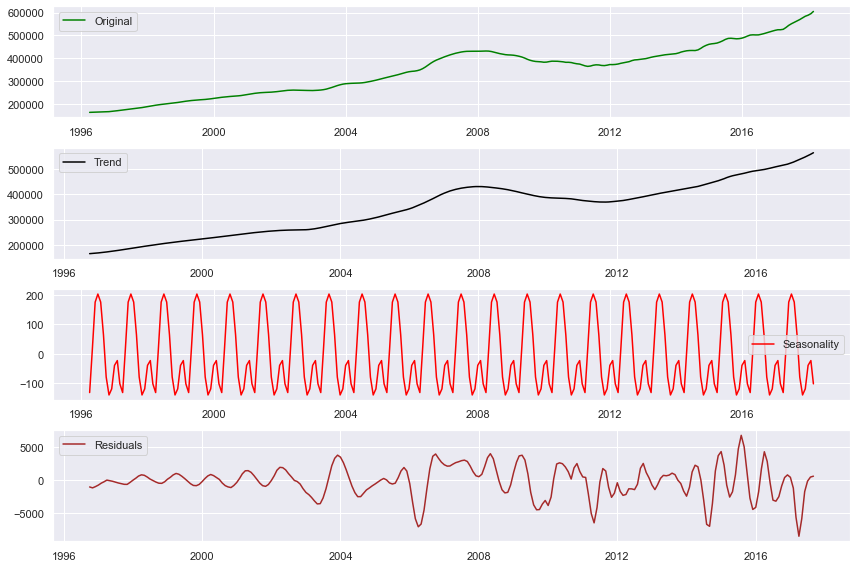

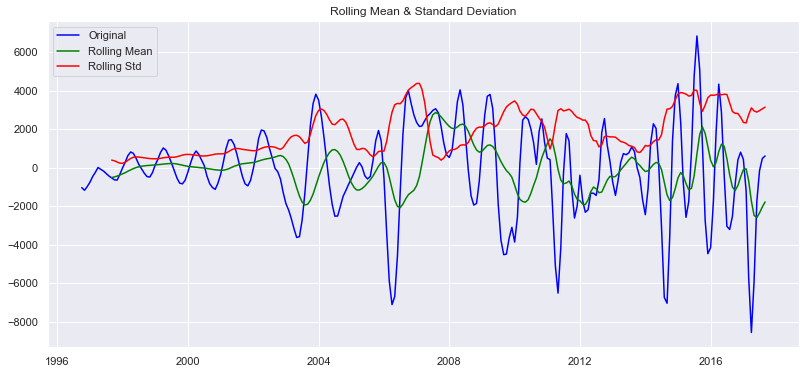

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -3.403307
p-value                          0.010847
# of Lags Used                  14.000000
Number of Observations Used    237.000000
The Critical Value (1%)         -3.458247
The Critical Value (5%)         -2.873814
The Critical Value (10%)        -2.573311
dtype: float64
---------------------------------


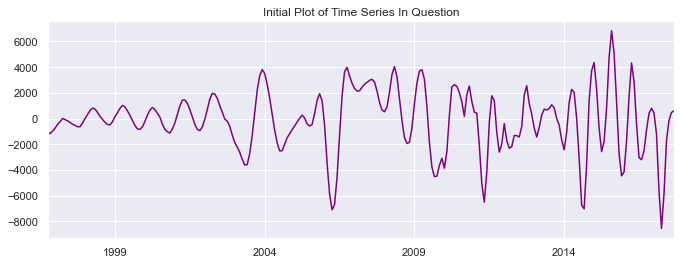

In [163]:
sd_sc(series_28203_full)

#### 28205 - FULL

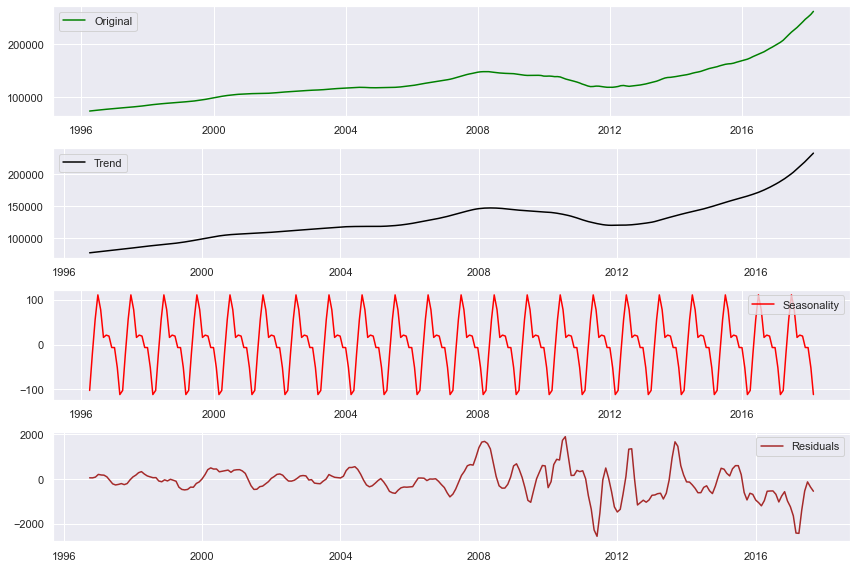

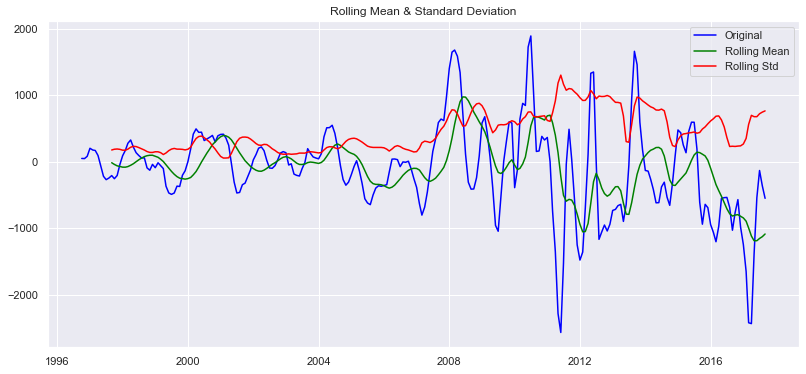

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -2.771925
p-value                          0.062397
# of Lags Used                  12.000000
Number of Observations Used    239.000000
The Critical Value (1%)         -3.458011
The Critical Value (5%)         -2.873710
The Critical Value (10%)        -2.573256
dtype: float64
---------------------------------


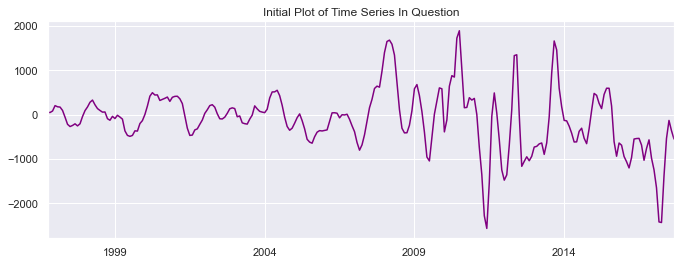

In [164]:
sd_sc(series_28205_full)

#### 28012 - FULL

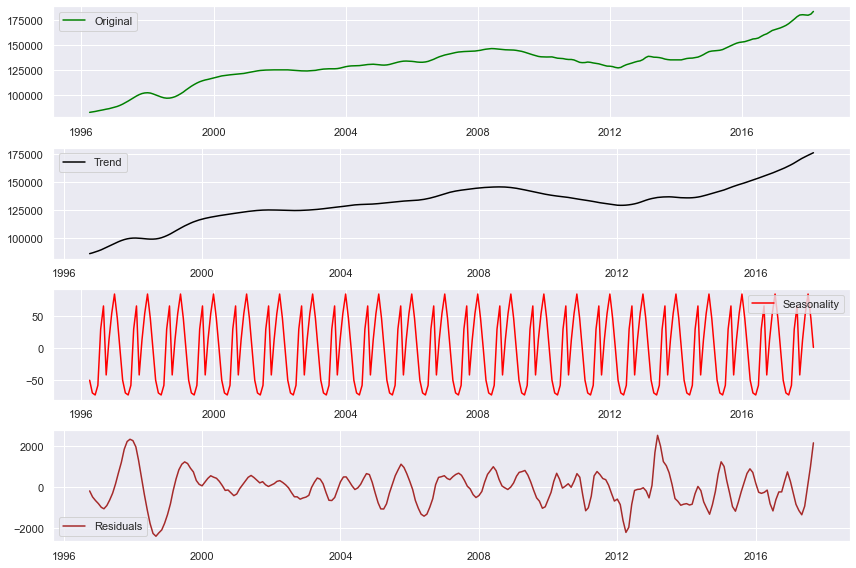

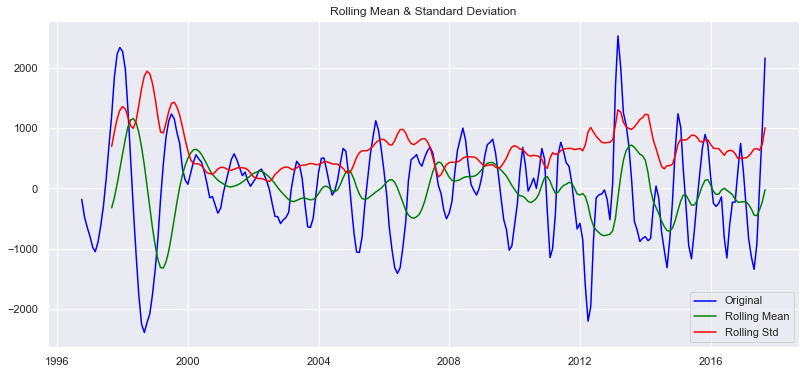

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                -6.570656e+00
p-value                        7.951688e-09
# of Lags Used                 1.300000e+01
Number of Observations Used    2.380000e+02
The Critical Value (1%)       -3.458128e+00
The Critical Value (5%)       -2.873762e+00
The Critical Value (10%)      -2.573283e+00
dtype: float64
---------------------------------


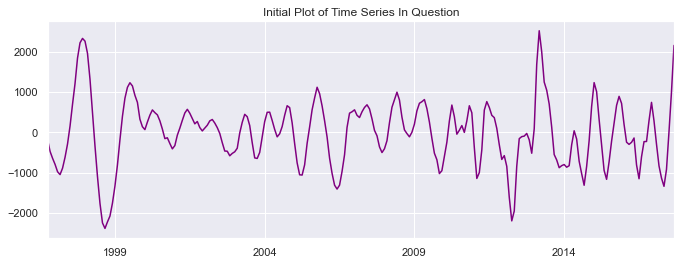

In [165]:
sd_sc(series_28012_full)

#### 28054 - FULL

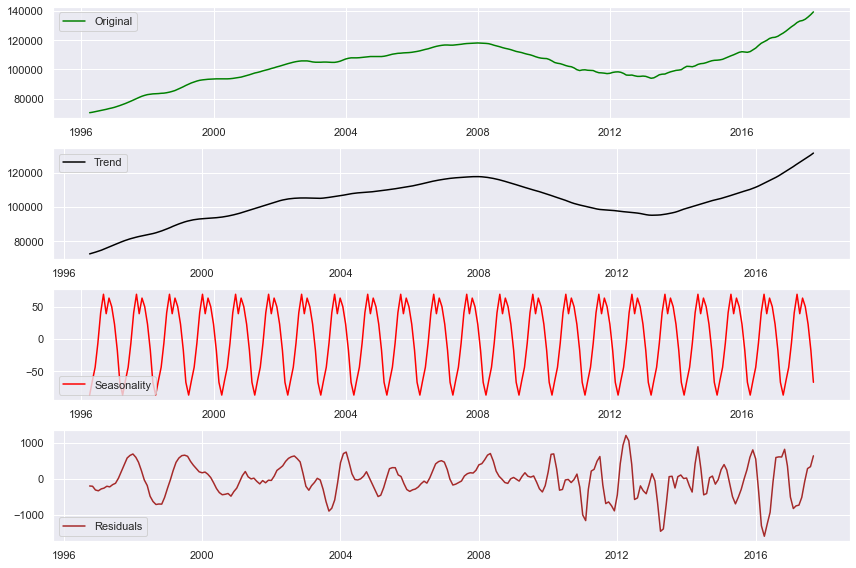

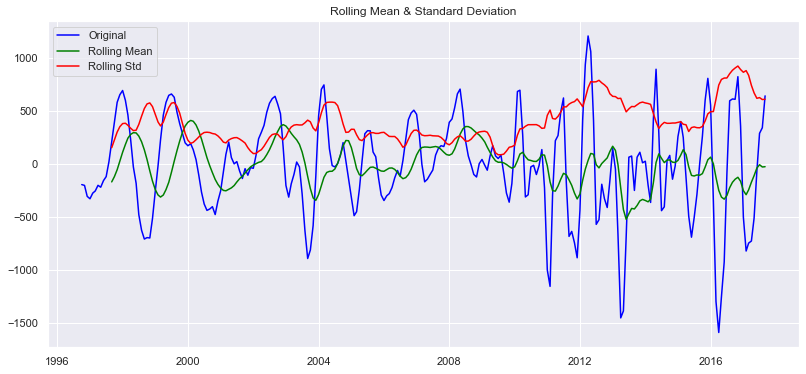

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -4.421265
p-value                          0.000272
# of Lags Used                  12.000000
Number of Observations Used    239.000000
The Critical Value (1%)         -3.458011
The Critical Value (5%)         -2.873710
The Critical Value (10%)        -2.573256
dtype: float64
---------------------------------


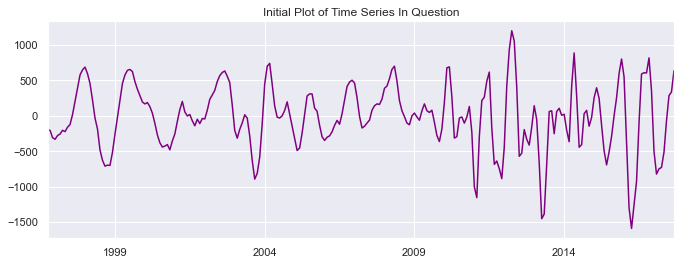

In [166]:
sd_sc(series_28054_full)

### Shorter Series Evaluations:

#### 28203 - Shorter

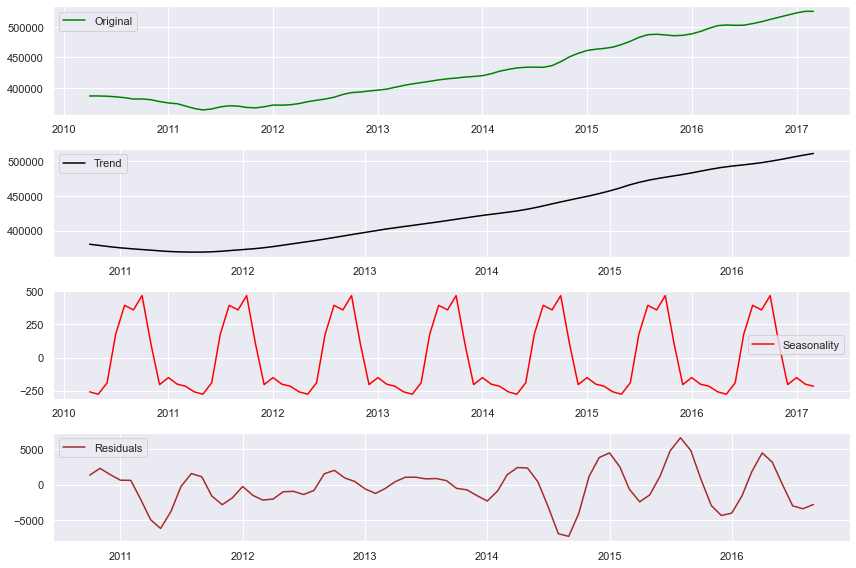

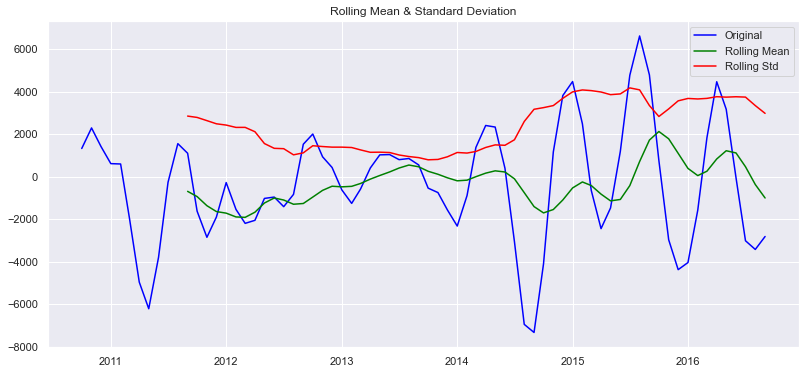

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                 -4.521030
p-value                         0.000180
# of Lags Used                  2.000000
Number of Observations Used    69.000000
The Critical Value (1%)        -3.528890
The Critical Value (5%)        -2.904440
The Critical Value (10%)       -2.589656
dtype: float64
---------------------------------


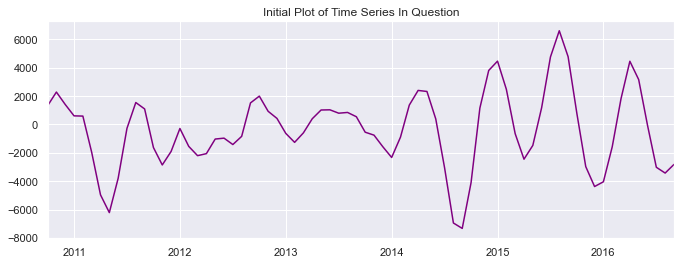

In [167]:
sd_sc(series_28203_shorter)

#### 28205 - Shorter

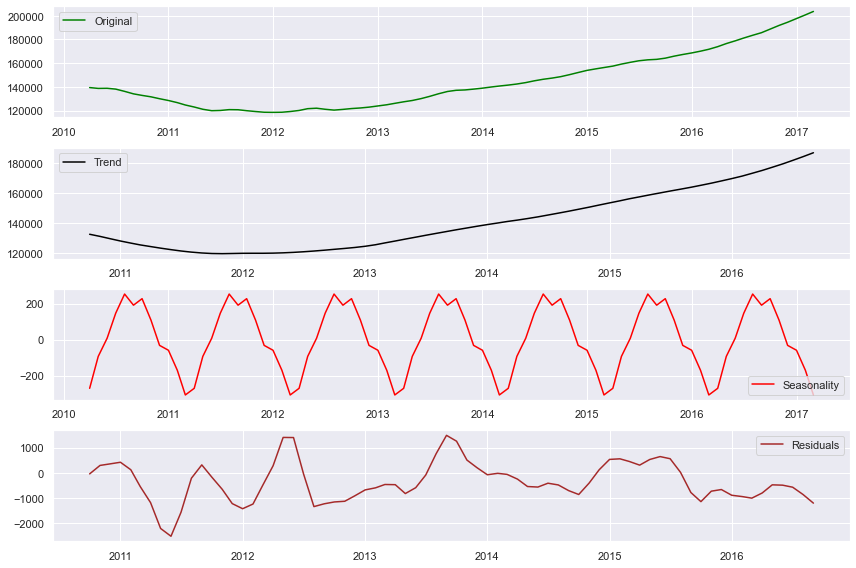

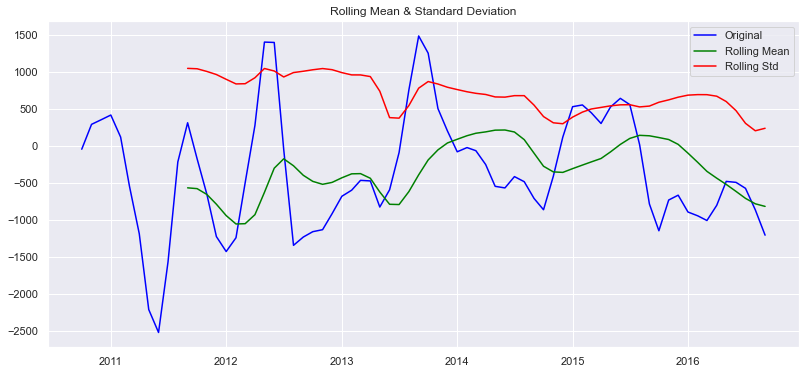

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                 -3.547473
p-value                         0.006848
# of Lags Used                  9.000000
Number of Observations Used    62.000000
The Critical Value (1%)        -3.540523
The Critical Value (5%)        -2.909427
The Critical Value (10%)       -2.592314
dtype: float64
---------------------------------


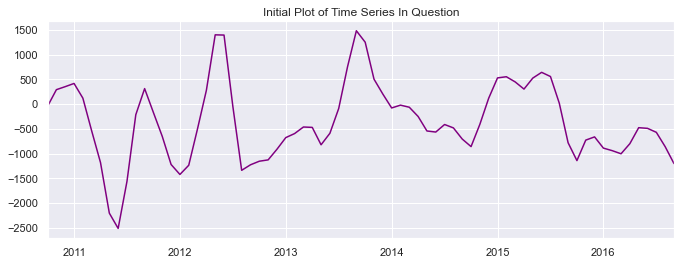

In [168]:
sd_sc(series_28205_shorter)

#### 28012 - Shorter

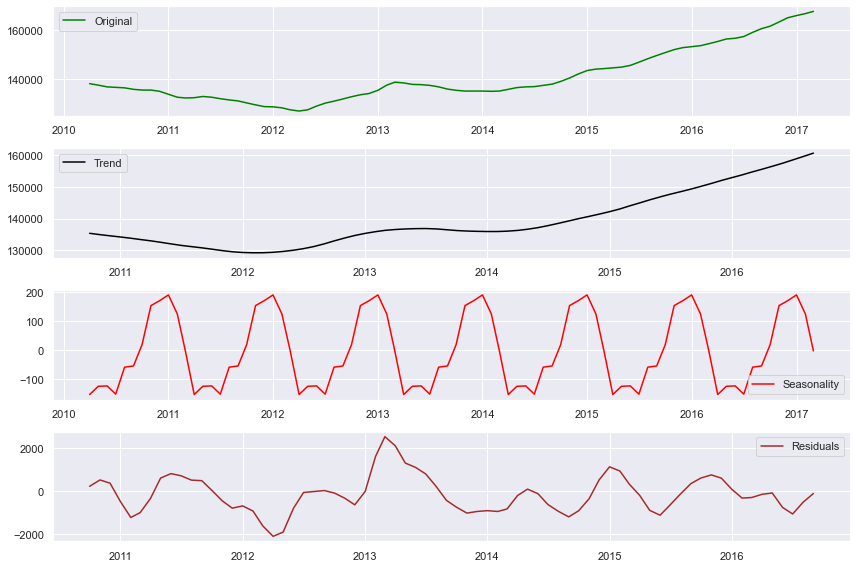

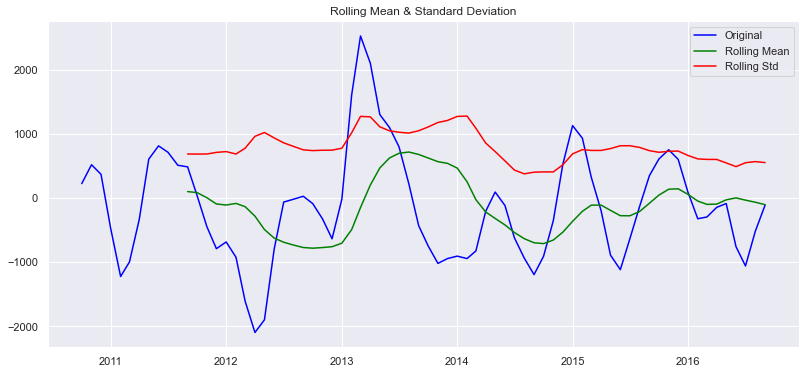

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                 -3.782117
p-value                         0.003096
# of Lags Used                  3.000000
Number of Observations Used    68.000000
The Critical Value (1%)        -3.530399
The Critical Value (5%)        -2.905087
The Critical Value (10%)       -2.590001
dtype: float64
---------------------------------


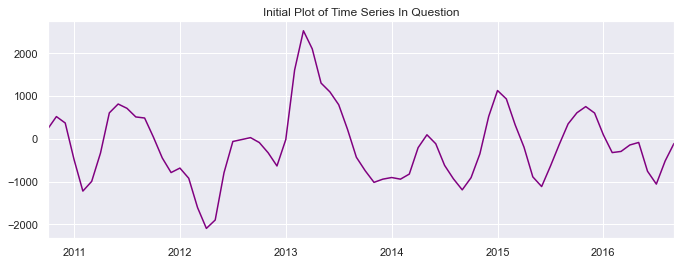

In [169]:
sd_sc(series_28012_shorter)

#### 28054 - Shorter

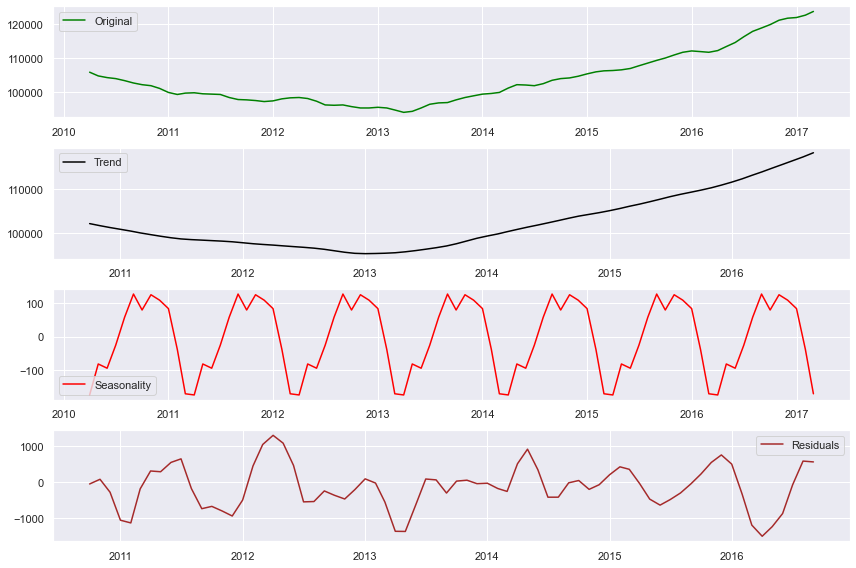

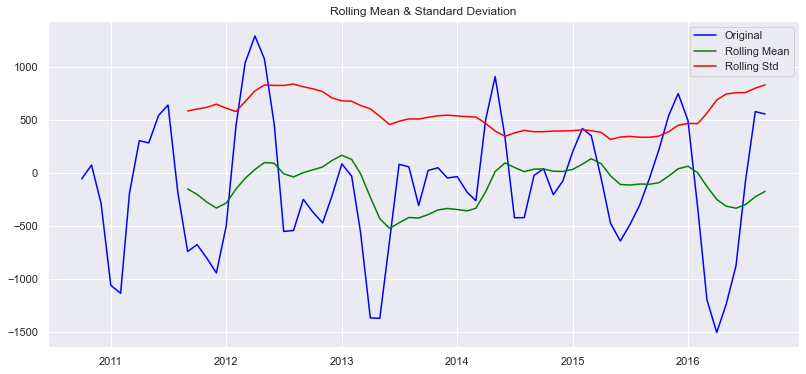

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                 -3.279924
p-value                         0.015800
# of Lags Used                 10.000000
Number of Observations Used    61.000000
The Critical Value (1%)        -3.542413
The Critical Value (5%)        -2.910236
The Critical Value (10%)       -2.592745
dtype: float64
---------------------------------


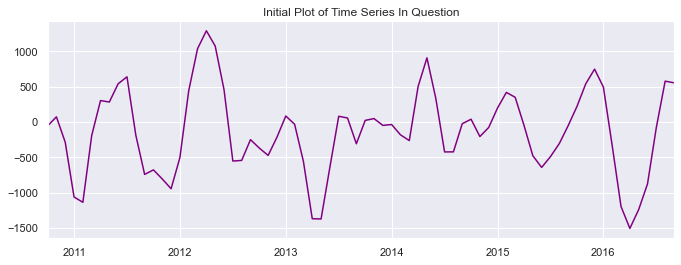

In [170]:
sd_sc(series_28054_shorter)

All Zipcodes Contains Linearity, Seasonality and Their Residuals Pass DF Tests
--
With these commonalities in place, I feel confident to go ahead and model using SARIMAX. In terms of the zip code to model on first, I'll determine which zip code has the lowest AIC score.

### Comparing 28203

FOR SERIES -- 2010- (end)2017
**********
The winner is: an AIC of 1028.3520778139166 with (1, 1, 1) for order terms and (1, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28203   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -509.176
Date:                            Sat, 06 Mar 2021   AIC                           1028.352
Time:                                    11:17:22   BIC                           1038.567
Sample:                                04-01-2010   HQIC                          1032.322
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------

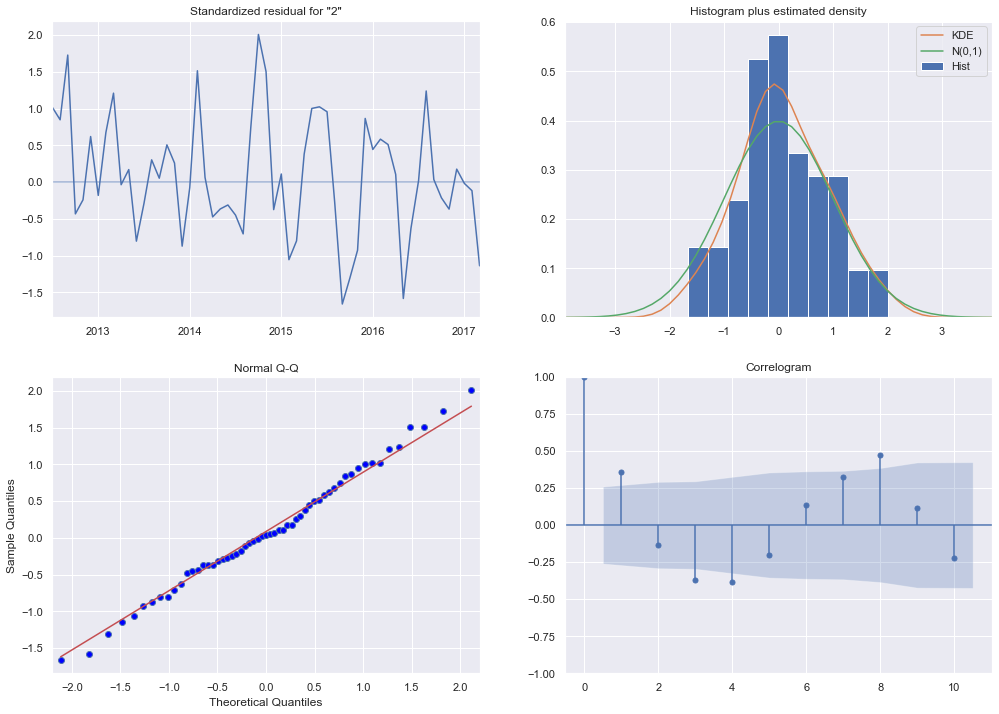

                                   
                                   
                                   
FOR SERIES -- 1996-2018
**********
The winner is: an AIC of 4093.58039155755 with (1, 1, 1) for order terms and (1, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28203   No. Observations:                  264
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2041.790
Date:                            Sat, 06 Mar 2021   AIC                           4093.580
Time:                                    11:17:24   BIC                           4110.921
Sample:                                04-01-1996   HQIC                          4100.570
                                     - 03-01-2018                                         
Covariance Type:                              opg                                         
   

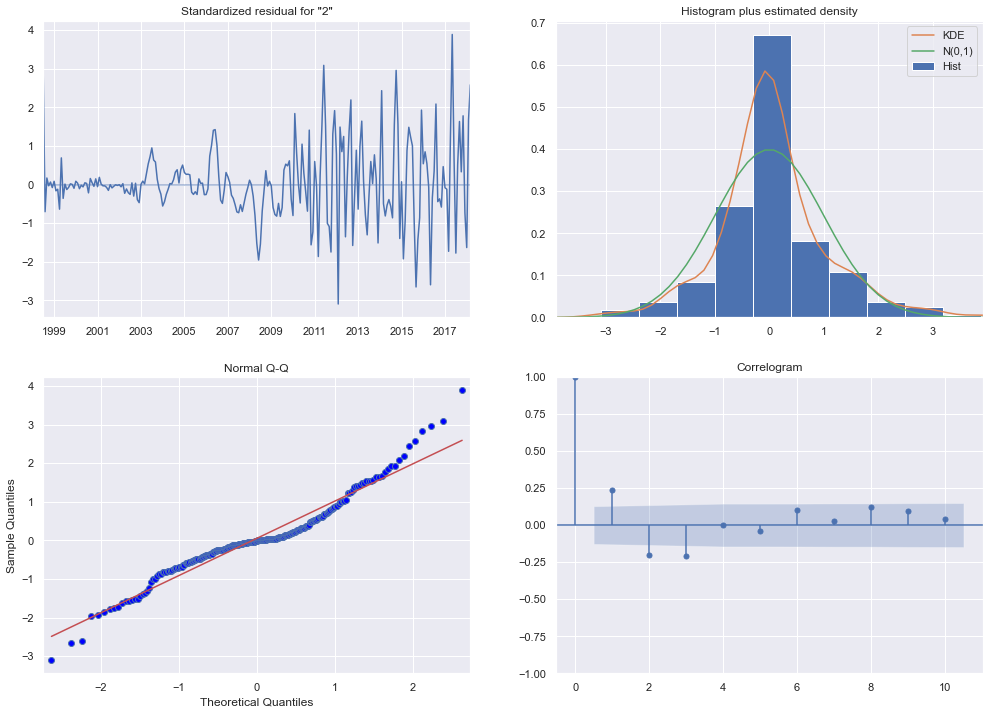

                                   
                                   
                                   
The AIC score for the full Series is 4093.58039155755 and the score is 1028.3520778139166 for the 2010-2018 Series


In [171]:
comparing_series(series_28203_shorter, series_28203_full)

### Comparing 28205

FOR SERIES -- 2010- (end)2017
**********
The winner is: an AIC of 866.6166810120076 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28205   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -429.308
Date:                            Sat, 06 Mar 2021   AIC                            866.617
Time:                                    11:19:22   BIC                            874.789
Sample:                                04-01-2010   HQIC                           869.793
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

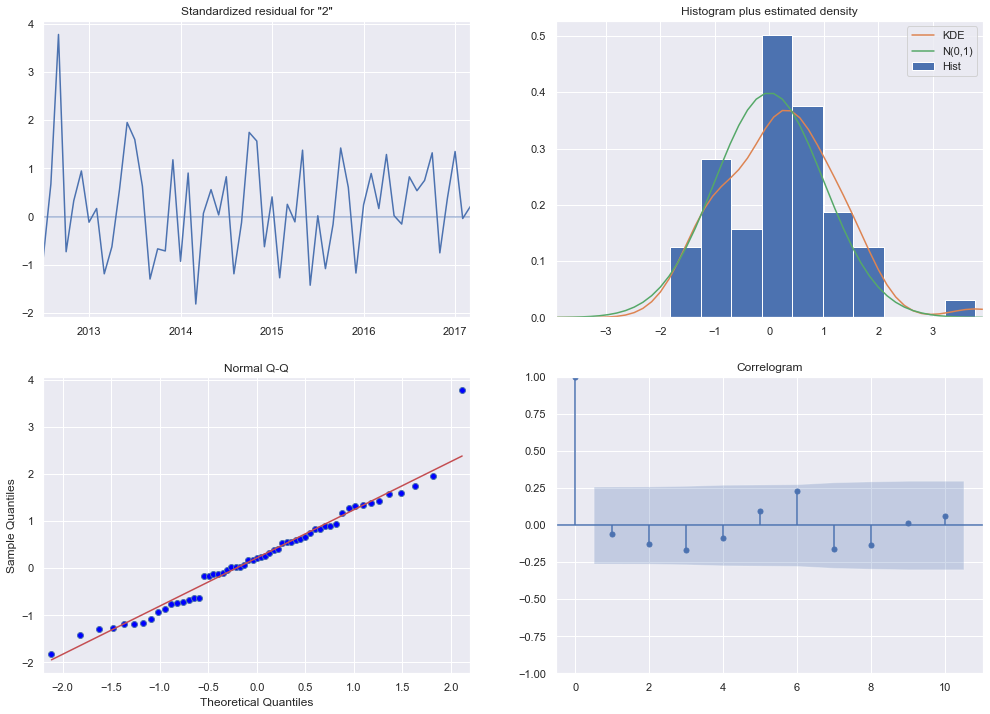

                                   
                                   
                                   
FOR SERIES -- 1996-2018
**********
The winner is: an AIC of 3479.2943438951716 with (1, 1, 1) for order terms and (1, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28205   No. Observations:                  264
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1734.647
Date:                            Sat, 06 Mar 2021   AIC                           3479.294
Time:                                    11:19:25   BIC                           3496.635
Sample:                                04-01-1996   HQIC                          3486.284
                                     - 03-01-2018                                         
Covariance Type:                              opg                                         
 

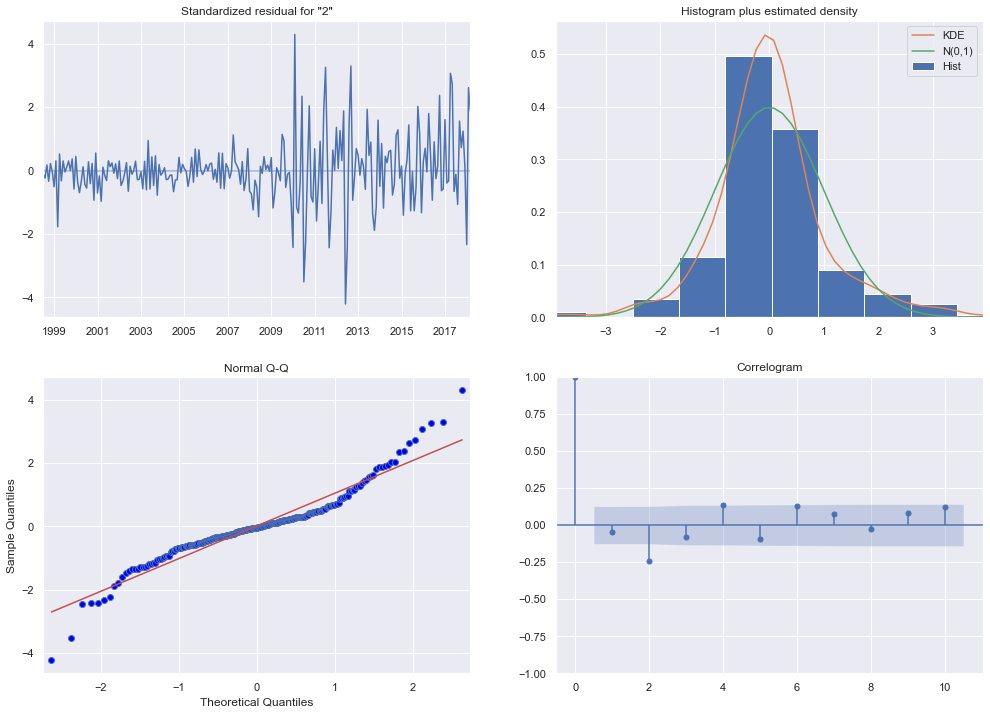

                                   
                                   
                                   
The AIC score for the full Series is 3479.2943438951716 and the score is 866.6166810120076 for the 2010-2018 Series


In [172]:
comparing_series(series_28205_shorter, series_28205_full)

### Comparing 28012

FOR SERIES -- 2010- (end)2017
**********
The winner is: an AIC of 873.1922582342307 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28012   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -432.596
Date:                            Sat, 06 Mar 2021   AIC                            873.192
Time:                                    11:20:52   BIC                            881.364
Sample:                                04-01-2010   HQIC                           876.368
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

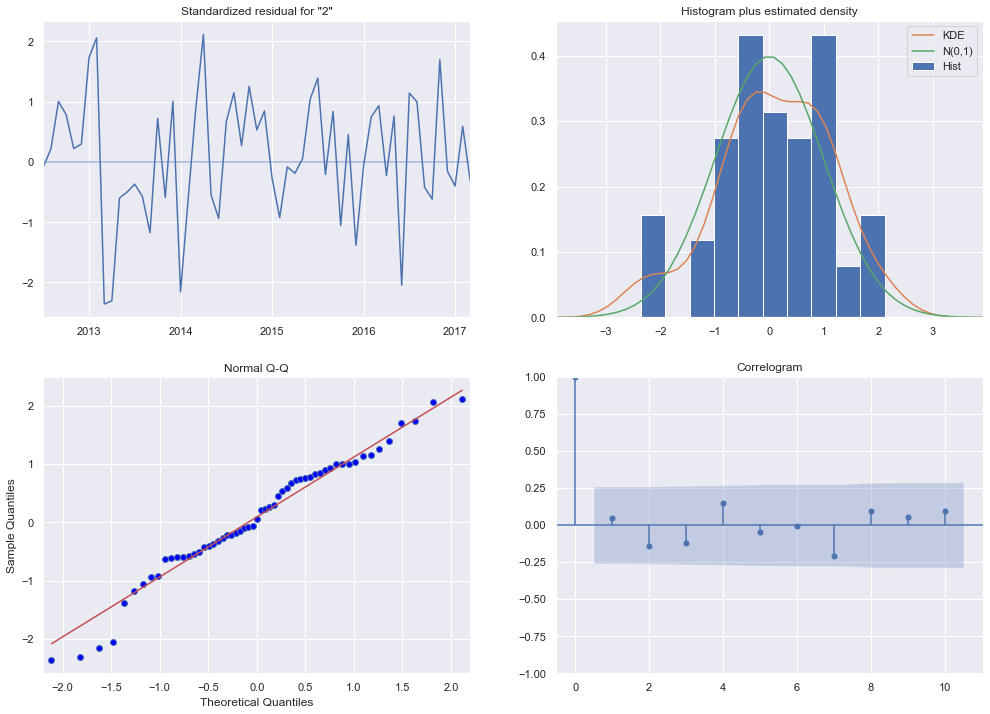

                                   
                                   
                                   
FOR SERIES -- 1996-2018
**********
The winner is: an AIC of 3431.1289644090634 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28012   No. Observations:                  264
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1711.564
Date:                            Sat, 06 Mar 2021   AIC                           3431.129
Time:                                    11:20:53   BIC                           3445.001
Sample:                                04-01-1996   HQIC                          3436.720
                                     - 03-01-2018                                         
Covariance Type:                              opg                                         
 

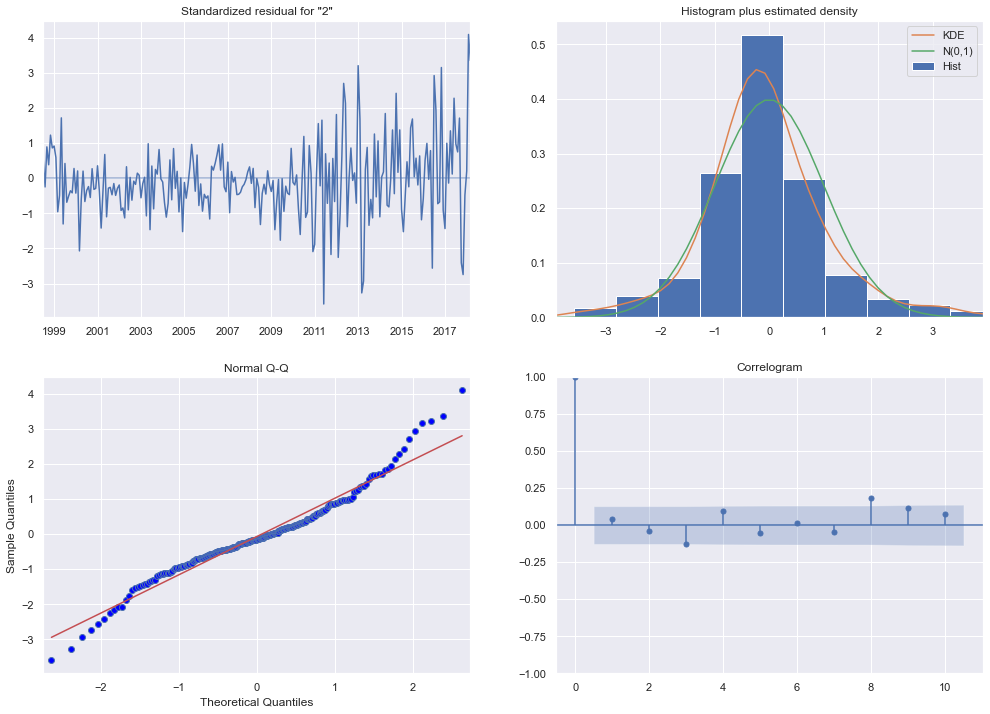

                                   
                                   
                                   
The AIC score for the full Series is 3431.1289644090634 and the score is 873.1922582342307 for the 2010-2018 Series


In [173]:
comparing_series(series_28012_shorter, series_28012_full)

### Comparing 28054

FOR SERIES -- 2010- (end)2017
**********
The winner is: an AIC of 873.5959013516872 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28054   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -432.798
Date:                            Sat, 06 Mar 2021   AIC                            873.596
Time:                                    11:22:21   BIC                            881.768
Sample:                                04-01-2010   HQIC                           876.772
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

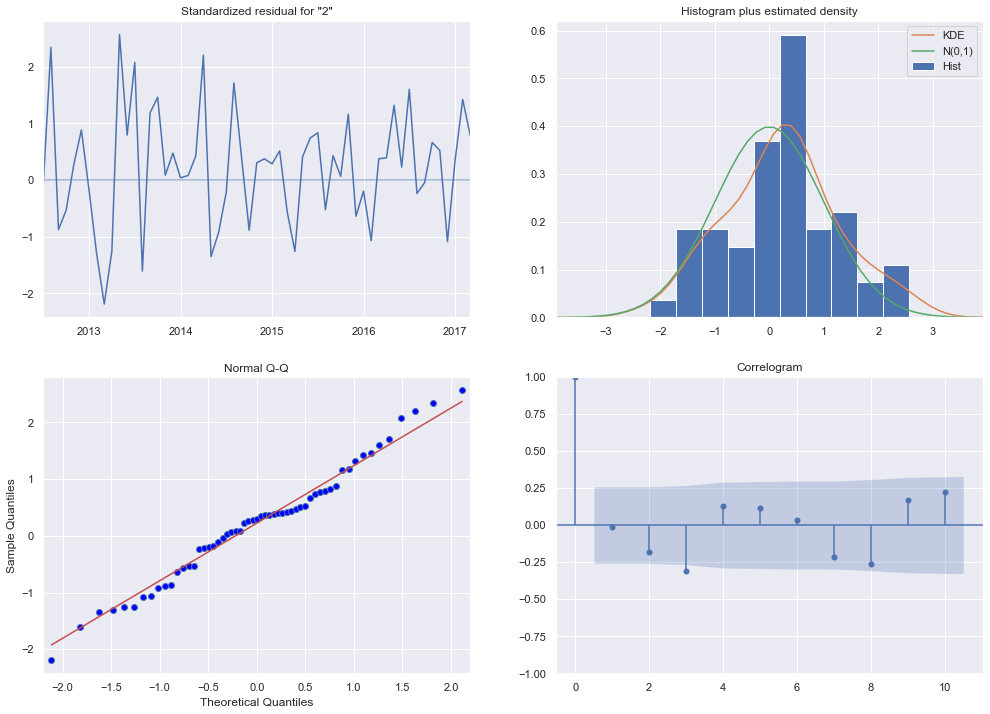

                                   
                                   
                                   
FOR SERIES -- 1996-2018
**********
The winner is: an AIC of 3356.3335083306165 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28054   No. Observations:                  264
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1674.167
Date:                            Sat, 06 Mar 2021   AIC                           3356.334
Time:                                    11:22:23   BIC                           3370.206
Sample:                                04-01-1996   HQIC                          3361.925
                                     - 03-01-2018                                         
Covariance Type:                              opg                                         
 

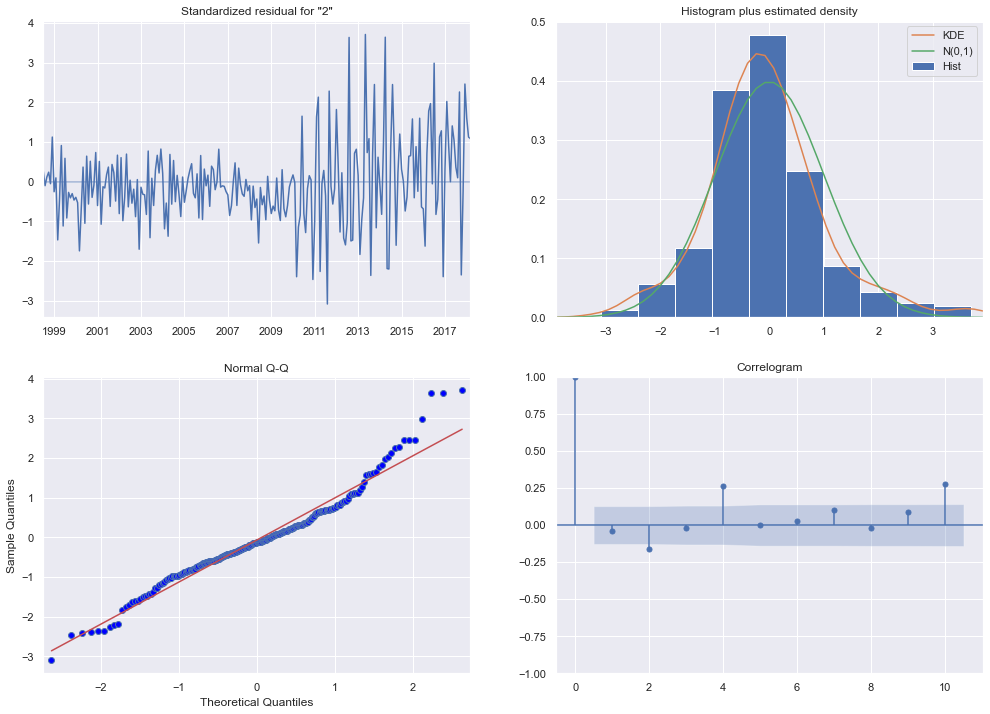

                                   
                                   
                                   
The AIC score for the full Series is 3356.3335083306165 and the score is 873.5959013516872 for the 2010-2018 Series


In [174]:
comparing_series(series_28054_shorter, series_28054_full)

Decision: Perform Predictions & Forecasting On 28012 & 28205
--
After comparing the zip codes from the full & shorter series for each respective zip code, 28012 and 28205 are the ones I'm most confident in focusing on now. 

This is for four reasons:

- These two zip code's AIC scores are the two lowest of the 5, and are quite similar, so it will allow the prediction and forecast results to serve as somewhat of a differentiator
- The location of 28205 is just next to Charlotte, in between the main city and Gastonia, with the two zip codes only 30 minutes apart by car, so either zip code could potentially serve the same buyers
- Zip code 28012 has the median HROI and I see this as a good basis for using it, while 28205 has the 3rd highest HROI
- The plotting of their histograms and KDE's show a fairly normal distribution of values

Given this, I'll focus on leveraging these two to make predictions and do some forecasting.

With the focus being on answering an updated question:

<i>Which is more advisable -- investing and/or building in the heart of Charlotte or on the outskirts in Belmont?</i>

Predicting Using The Last Year Of The Training Series
--
Now, I'd like to make some predictions using the Test Series for both zip codes.

#### Checking For Zip Code 28012

In [170]:
# Running the model for zip code 28012 using the parameters provided from the comparing_series function
# As well as ensuring that the function worked correctly

mod_28012 = sm.tsa.statespace.SARIMAX(series_28012_shorter,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_28012 = mod_28012.fit()

print(results_28012.summary().tables[1])
print(f'The AIC score is: {results_28012.aic}')

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6718      0.115      5.860      0.000       0.447       0.896
ma.L1          0.6214      0.092      6.768      0.000       0.441       0.801
ma.S.L12      -0.2894      0.053     -5.455      0.000      -0.393      -0.185
sigma2       2.14e+05   4.56e+04      4.696      0.000    1.25e+05    3.03e+05
The AIC score is: 873.1922582342307


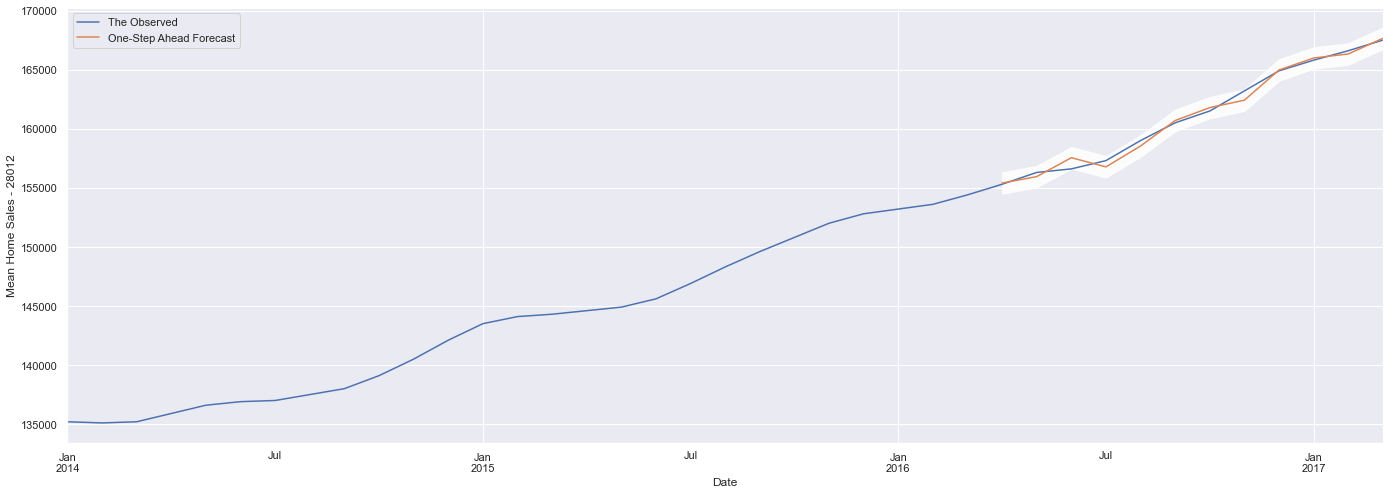

In [174]:
# Getting a prediction for the year 2016-2017 and plotting it
predictor = results_28012.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = predictor.conf_int()
ax = series_28012_shorter['2014':].plot(label='The Observed')
predictor.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=1.0, figsize=(21, 8))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='w', alpha=.9)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Home Sales - 28012')
plt.legend()
plt.show()

In [175]:
# Calculating the MSE & RMSE scores for Zip code 28012
zip_28012_pred = predictor.predicted_mean
zip_28012_true = series_28012_shorter['2016-04-01':]
mse = ((zip_28012_pred - zip_28012_true) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 199570.29
The Root Mean Squared Error is 446.73


---

#### Checking For Zip Code 28205

In [176]:
mod_28205 = sm.tsa.statespace.SARIMAX(series_28205_shorter,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_28205 = mod_28205.fit()

print(results_28205.summary().tables[1])
print(f'The AIC score is: {results_28205.aic}')

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8271      0.092      8.994      0.000       0.647       1.007
ma.L1          0.5141      0.094      5.455      0.000       0.329       0.699
ma.S.L12      -0.3863      0.060     -6.410      0.000      -0.504      -0.268
sigma2      1.844e+05   3.15e+04      5.853      0.000    1.23e+05    2.46e+05
The AIC score is: 866.6166810120076


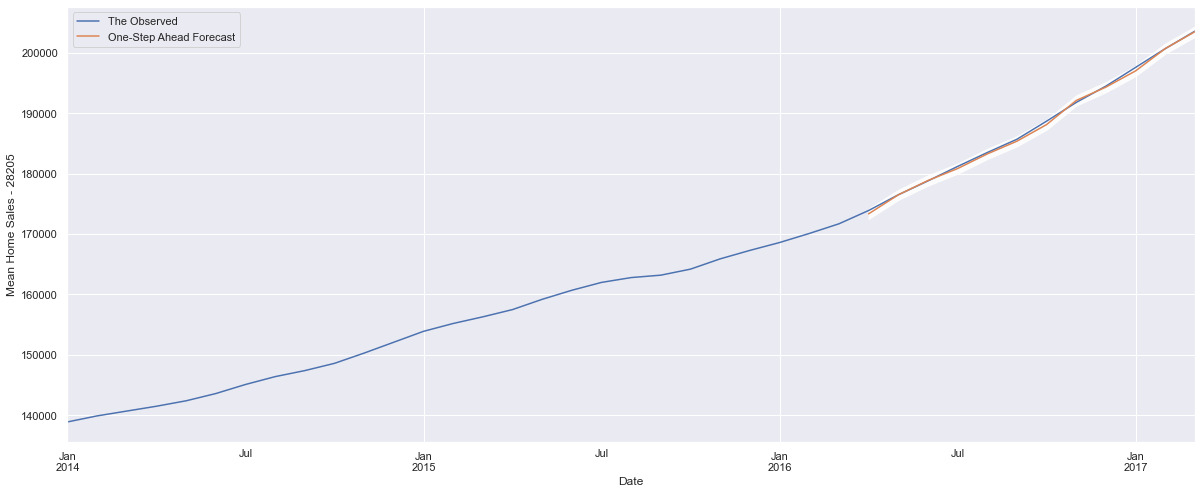

In [178]:
# Getting a prediction for the year 2016-2017 and plotting it
predictor = results_28205.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = predictor.conf_int()
ax = series_28205_shorter['2014':].plot(label='The Observed')
predictor.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=1.0, figsize=(18, 8))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='w', alpha=.9)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Home Sales - 28205')
plt.legend()
plt.show()

In [179]:
# Calculating the MSE & RMSE scores for Zip code 28205
zip_28205_pred = predictor.predicted_mean
zip_28205_true = series_28205_shorter['2016-04-01':]
mse = ((zip_28205_pred - zip_28205_true) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 115999.51
The Root Mean Squared Error is 340.59


The MSE & RMSE for Zip Code 28205 Prove To Be Significantly Better
--
This zip code within the Charlotte center is outperforming the zip code for Belmont. Nevertheless, these two models seem to be doing well so far, as the RMSE tells us that both of these models are predicting the mean home sales prices within less than $500 of the actual mean home sales prices. This is good.

Let's see how they compare with Dynamic Forecasting.

#### Dynamic Forecasting - 28012

In [203]:
dynamic_pred = results_28012.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=True, full_results=True)
dynamic_pred_ci = dynamic_pred.conf_int()

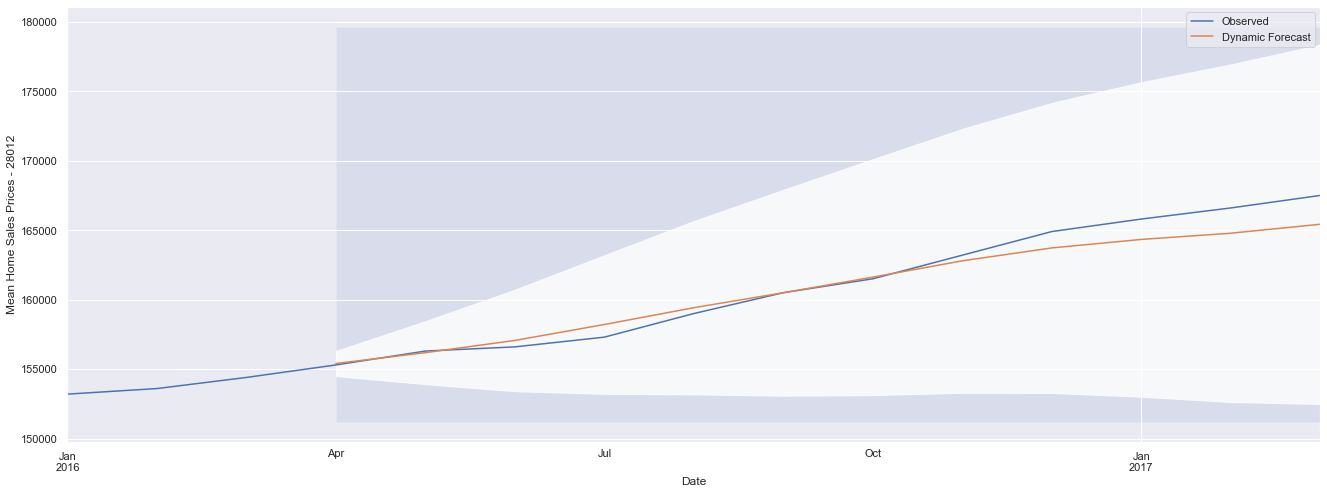

In [204]:
# Performing Forecast for the final year of the Series (Dynamic Forecasting) -- zip code 28012

ax = series_28012_shorter['2016':].plot(label='Observed', figsize=(20, 8))
dynamic_pred.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(dynamic_pred_ci.index,
                dynamic_pred_ci.iloc[:, 0],
                dynamic_pred_ci.iloc[:, 1], color='w', alpha=.8)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-04-01'), series_28012_shorter.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Home Sales Prices - 28012')

plt.legend()
plt.show()

In [205]:
# Extract the predicted and true values of the time series - 28012
forecasted_vals = dynamic_pred.predicted_mean
true_vals = series_28012_shorter['2016-04-01':]

# Determining mean square error
mse = ((forecasted_vals - true_vals) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 1047714.78
The Root Mean Squared Error is 1023.58


#### Dynamic Forecasting - 28205

In [184]:
dynamic_pred = results_28205.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=True, full_results=True)
dynamic_pred_ci = dynamic_pred.conf_int()

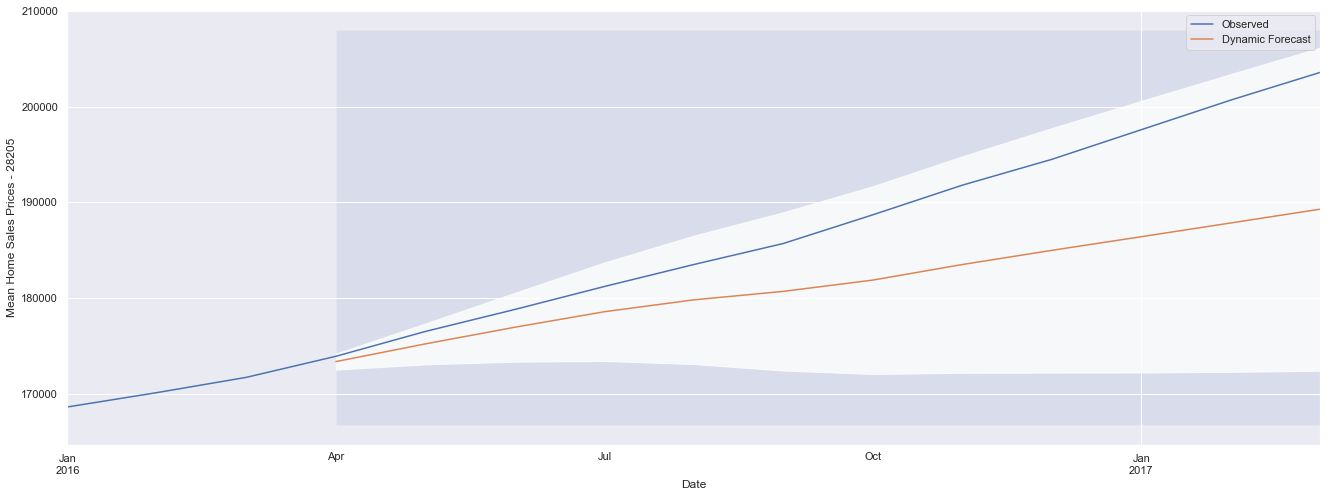

In [186]:
# Performing Forecast for the final year of the Series (Dynamic Forecasting) -- zip code 28205

ax = series_28205_shorter['2016':].plot(label='Observed', figsize=(20, 8))
dynamic_pred.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(dynamic_pred_ci.index,
                dynamic_pred_ci.iloc[:, 0],
                dynamic_pred_ci.iloc[:, 1], color='w', alpha=.8)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-04-01'), series_28205_shorter.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Home Sales Prices - 28205')

plt.legend()
plt.show()

In [201]:
# Extract the predicted and true values of the time series - 28205
forecasted_vals = dynamic_pred.predicted_mean
true_vals = series_28205_shorter['2016-04-01':]

# Determining mean square error
mse = ((forecasted_vals - true_vals) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 62703869.64
The Root Mean Squared Error is 7918.58


Results: Zip Code 28012 Has The Lower RMSE with Dynamic Forecasting 
--
Because zip code 28012 has a significantly lower RMSE when Dynamic Forecasting is evaluated, it's proving to be the better zip code with respect to leveraging SARIMAX for modeling.

The truer test will be when forecasting for the test Series and comparing this with the actual Test Series values.

First, I'll look to create the plot for the Forecast, <b>for the time period</b> 2017-04-01 to 2018-03-01

Forecasting For '17-18: Zip Code 28012
--

In [188]:
# Get forecast 12 steps ahead, or one year
twelve_mo_pred = results_28012.get_forecast(steps=72)

# Get confidence intervals of forecasts
pred_ci = twelve_mo_pred.conf_int()

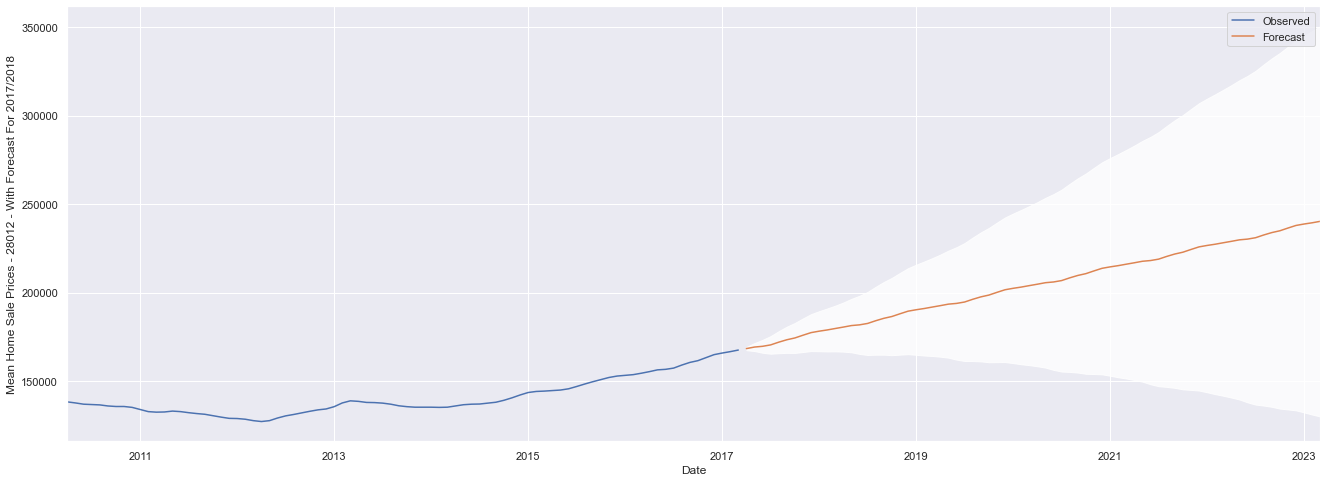

In [190]:
ax = series_28012_shorter.plot(label='Observed', figsize=(20, 8))
twelve_mo_pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='w', alpha=.8)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Home Sale Prices - 28012 - With Forecast For 2017/2018')

plt.legend()
plt.show()

Next: Add In The Test Series Plot And Check For MSE/RMSE
--
Now, I'll look to evaluate the model's forecast by comparing it with the Test Series

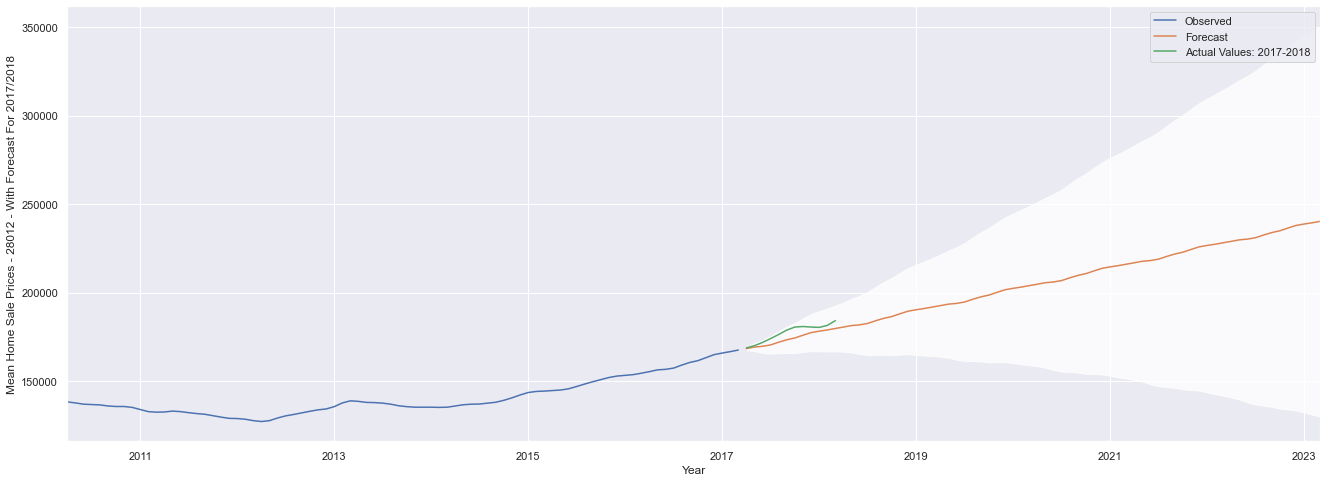

In [192]:
ax = series_28012_shorter.plot(label='Observed', figsize=(20, 8))
twelve_mo_pred.predicted_mean.plot(ax=ax, label='Forecast')
# ploting the test Series
test_s['28012'].plot(ax=ax, label='Actual Values: 2017-2018')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='w', alpha=.8)
ax.set_xlabel('Year')
ax.set_ylabel('Mean Home Sale Prices - 28012 - With Forecast For 2017/2018')

plt.legend()
plt.show()

In [215]:
# MSE and RMSE for forecast+observed from test Series - 28012
forecasted_vals = twelve_mo_pred.predicted_mean
true_vals = test_s['28012']

# Determining mean square error
mse = ((forecasted_vals - true_vals) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 14187340.85
The Root Mean Squared Error is 3766.61


Forecasting For '17-18: Zip Code 28205
--

In [211]:
# Get forecast 12 steps ahead, or one year
twelve_mo_pred2 = results_28205.get_forecast(steps=72)

# Get confidence intervals of forecasts
pred_ci2 = twelve_mo_pred2.conf_int()

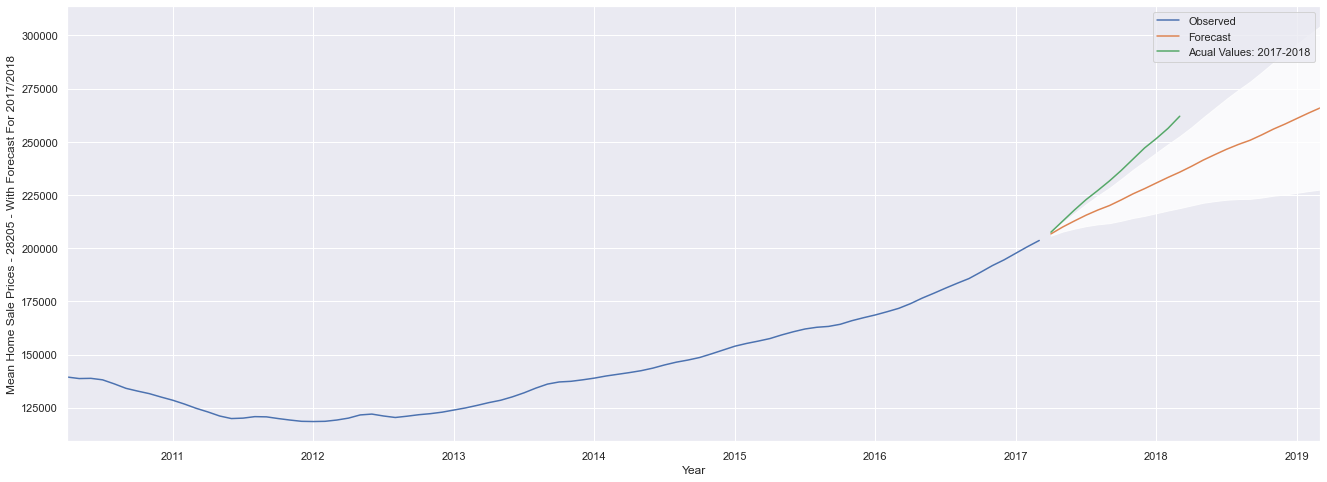

In [196]:
# Combining the Forecast with the Actual values for 2017/18
ax = series_28205_shorter.plot(label='Observed', figsize=(20, 8))
twelve_mo_pred2.predicted_mean.plot(ax=ax, label='Forecast')
test_s['28205'].plot(ax=ax, label='Acual Values: 2017-2018')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='w', alpha=.8)
ax.set_xlabel('Year')
ax.set_ylabel('Mean Home Sale Prices - 28205 - With Forecast For 2017/2018')

plt.legend()
plt.show()

In [197]:
# MSE and RMSE for forecast+observed from test Series - 28205
forecasted_vals2 = twelve_mo_pred2.predicted_mean
true_vals2 = test_s['28205']

# Determining mean square error
mse = ((forecasted_vals2 - true_vals2) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 232384293.02
The Root Mean Squared Error is 15244.16


For Modeling, Zip Code 28012 Is The Clear Best Choice. However...
--
With respect to all metrics, zip code 28012 is proving to be the clear winner. However, the question still remains: 

<i>Which of the two zip codes is preferred with respect to investment?</i>

Given the modeling & forecasting, it's important now to consider the following:

- How will these models perform when forecasting beyond the entire Series, and into the current time (2021)
- Both zip codes' forecasted values prove to be conservative, so they could both represent a solid opportunity, one inside of Charlotte proper and one on the outskirts
- The nature of the real estate market changes so quickly, it's of course challenging to forecast without considering other variables such as current events, prices for materials, etc.
- After all of the modeling & forecasting, the key question perhaps circles back to one metric: HROI. It may be beneficial to re-calculate the HROI with the addition of the foreacsted year, to see which zip code is best, or rather, to calculate ROI given a starting point near or at the end of the Series and evaluating the zip codes based on this.

The Winner: Belmont, NC (Zip Code 28012)
--
Given the modeling & forecasting, current market dynamic of Charlotte as well as the business/investment specialization of the firm, <b>Belmont</b> (zip code 28012) is recommended for Build-to-Rent real estate investment & development. We believe that as Charlotte becomes more congested and the immediate suburbs are connected to the city by lightrail, more and more families will want to take advantage of living outside the city while working in the city, and given a 10-year window, Belmont could prove to provide a substantial return to investors willing to invest in a suburb that contains just around 20,000 residents at the moment.

- The average home price for 28012 at the moment is: $268,653

- The average home price for 28205 at the moment is: $343,340

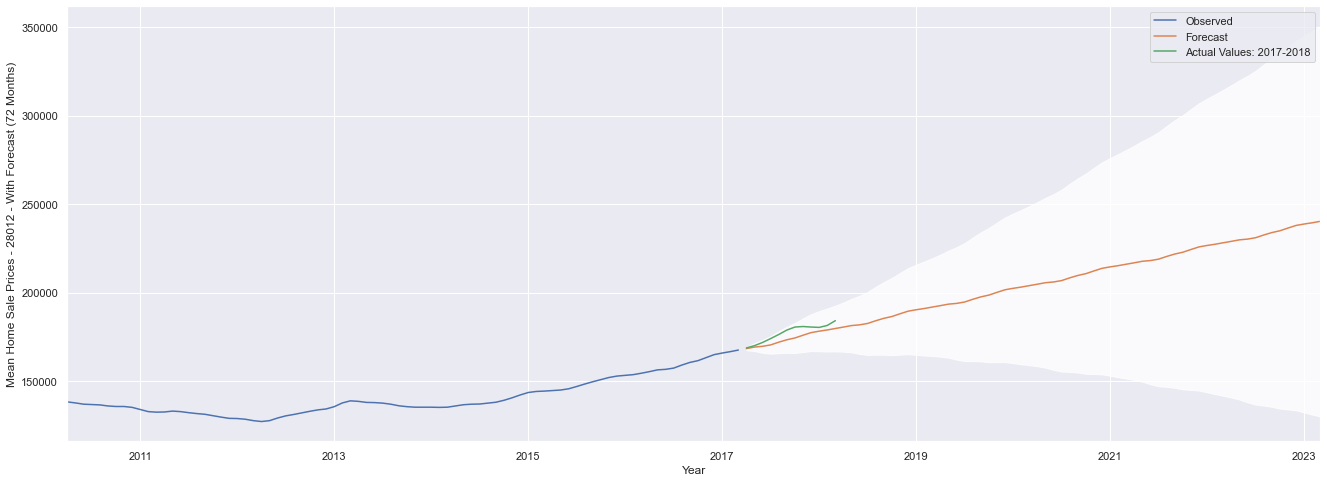

In [208]:
ax = series_28012_shorter.plot(label='Observed', figsize=(20, 8))
twelve_mo_pred.predicted_mean.plot(ax=ax, label='Forecast')
# ploting the test Series
test_s['28012'].plot(ax=ax, label='Actual Values: 2017-2018')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='w', alpha=.8)
ax.set_xlabel('Year')
ax.set_ylabel('Mean Home Sale Prices - 28012 - With Forecast (72 Months)')

plt.legend()
plt.show()

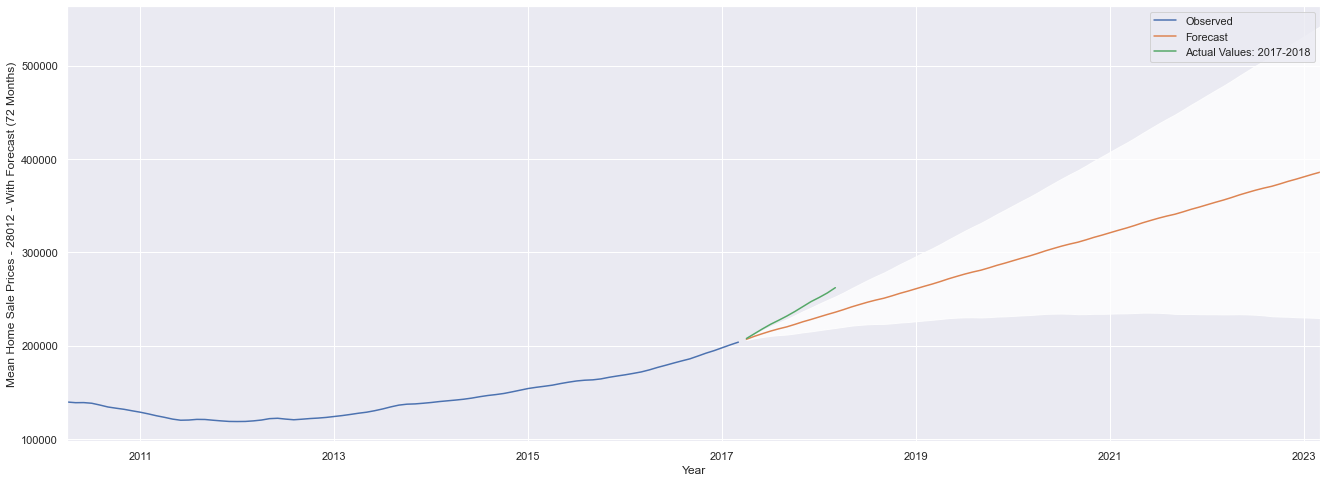

In [214]:
ax = series_28205_shorter.plot(label='Observed', figsize=(20, 8))
twelve_mo_pred2.predicted_mean.plot(ax=ax, label='Forecast')
# ploting the test Series
test_s['28205'].plot(ax=ax, label='Actual Values: 2017-2018')
ax.fill_between(pred_ci2.index,
                pred_ci2.iloc[:, 0],
                pred_ci2.iloc[:, 1], color='w', alpha=.8)
ax.set_xlabel('Year')
ax.set_ylabel('Mean Home Sale Prices - 28012 - With Forecast (72 Months)')

plt.legend()
plt.show()

Conclusion: Invest in Belmont (28012)
--
For the following reasons:

- Lower RMSE of ~3766; lower RMSE score for the fuller Series as well

- Median hROI (potential for growth, in comparison to Charlotte)
- Forecasted home prices lower than current home prices
- 1.0 Month supply in Charlotte
- The zip code best able to predict & forecast (from those with sample from top hROI)
- around 30 minutes to Charlotte center

Recommendations For Future Analysis
--
Here is where we would like to take this next, and some other thoughts for future:

- Incorporate 2019-2021 housing data (vitally important) with a focus on the top 21 hROI zip codes
- Consider migration trends for Charlotte and surrounding areas
- Productionize model that analyzes ROI for individual home given the zip code, purchase price and purchase date
- Investigate renter's market in Charlotte and surrounding
- Investigate the cost of land itself in Charlotte and surrounding areas